# Thesis Plotter

## Imports and Methods

In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as cuts
import my_library.constants as constants
import my_library.gluex_style as gxs
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/04


In [2]:
def title_hists(hist: list, xtitle, ytitle, yoffset=None):
    for hist in hist:
        hist.GetXaxis().SetTitle(xtitle)
        hist.GetYaxis().SetTitle(ytitle)
        if yoffset:
            hist.GetYaxis().SetTitleOffset(yoffset)

    

# Make Plots for My Thesis 

## Luminosity table in latex form

In [3]:
for e in range(7, 12):
    e_lumi = tools.get_luminosity_gluex_1(e-0.5, e+0.5)
    print("{} & {:0.2f} \\\ \hline".format(e, e_lumi))

7 & 42.73 \\ \hline
8 & 141.07 \\ \hline
9 & 112.30 \\ \hline
10 & 70.81 \\ \hline
11 & 60.14 \\ \hline


## $\Delta t$ table in latex form

In [4]:
for tbin in range(1, 8):
    t_low, t_high = constants.T_CUT_DICT[tbin]
    t_bin_middle = (t_low + t_high) / 2
    t_bin_width = t_high - t_low
    print('{:0.3f} & {:0.3f} \\\ \hline'.format(t_bin_middle, t_bin_width))

0.150 & 0.100 \\ \hline
0.250 & 0.100 \\ \hline
0.350 & 0.100 \\ \hline
0.525 & 0.250 \\ \hline
0.775 & 0.250 \\ \hline
1.150 & 0.500 \\ \hline
1.650 & 0.500 \\ \hline


## PID Timing Table

In [5]:
timing_dict = {
    '$pi^+$': (1.0, 0.5, 2.0, 2.5),
    '$pi^-$': (1.0, 0.5, 2.0, 2.5),
    '$K^+$': (0.75, 0.3, 2.5, 2.5),
    '$K^-$': (0.75, 0.3, 2.5, 2.5),
    '$p$': (1.0, 0.6, 2.0, 2.5)
}

for particle in timing_dict:
    timing = timing_dict[particle]
    print('{} & $\pm {:0.2f}$ & $\pm {:0.2f}$ & $\pm {:0.2f}$ & $\pm {:0.2f}$ \\\ \hline'.format(particle, *timing))

$pi^+$ & $\pm 1.00$ & $\pm 0.50$ & $\pm 2.00$ & $\pm 2.50$ \\ \hline
$pi^-$ & $\pm 1.00$ & $\pm 0.50$ & $\pm 2.00$ & $\pm 2.50$ \\ \hline
$K^+$ & $\pm 0.75$ & $\pm 0.30$ & $\pm 2.50$ & $\pm 2.50$ \\ \hline
$K^-$ & $\pm 0.75$ & $\pm 0.30$ & $\pm 2.50$ & $\pm 2.50$ \\ \hline
$p$ & $\pm 1.00$ & $\pm 0.60$ & $\pm 2.00$ & $\pm 2.50$ \\ \hline


## Fit Variation Max Impact Table

In [6]:
var_names = {'pol1': "1st-Order Polynomial", 'pol3': "3rd-Order Polynomial", 'floatgausmeanleft': "Fix Value of Gaussian Width at $-1\sigma$ Relative to Nominal", 
            "floatvoigtwidth": "Allow Gaus Width to Float", 'wideleft': "Wider Fit Range (Low Side)", 'wideright': "Wider Fit Range (High Side)",
            'nogaus': "No Gaussian Component", "wideboth": "Wider Fit Range on Both Sides"}
channel_names = {'pipkmks': '$\pi^+K^-K_s$', 'pimkpks': '$\pi^-K^+K_s$' }

fit_sys_df = pd.read_csv('/work/halld/home/viducic/systematic_errors/max_changes.csv')
fit_sys_df['mag_percent_change'] = np.abs(fit_sys_df['max_percent_change'])
fit_sys_grouped = fit_sys_df.groupby('channel')
for channel, group in fit_sys_grouped:
    # print(f'{channel_names[channel]} & {group["mag_percent_change"].mean():0.3f} & {group["mag_percent_change"].std():0.3f} \\\ \hline')
    # table_str = '$E_\gamma & -t & Variation & |(Varied - Nominal)|/Nominal \\\ \hline'
    # print(table_str)
    # table_start = '\\begin{table} \n \
    print("\\begin{table}\n\
\centering \n\
\\begin{tabular}{| c | c | c | c |} \n\
\hline						\n\
\\boldmath$E_\gamma$ \\textbf{[GeV]} & \\boldmath$-t ~\\textbf{[GeV}^2]\\textbf{]}$ & \\textbf{Variation} & \\textbf{|(Varied - Nominal)|/Nominal} \\\ \hline")
    for index, row in group.iterrows():
        if row['e'] == 12:
            continue
        t_middle = constants.T_CUT_DICT[row['t']][0] + constants.T_WIDTH_DICT[row['t']] / 2
        table_str = '{} & {:0.3f} & {} & {:0.3f} \\\ \hline'.format(row['e'], t_middle, var_names[row['max_var']], np.abs(row['max_percent_change']))
        print(table_str)
    print("\end{tabular} \n\
\caption{Fit systematic for each $E_\gamma$ and $-t$ bin for " + channel_names[channel] + "  decay mode}\label{table:" + channel + "_fit_sys}  \n\
\end{table} ")
    print('\n')

\begin{table}
\centering 
\begin{tabular}{| c | c | c | c |} 
\hline						
\boldmath$E_\gamma$ \textbf{[GeV]} & \boldmath$-t ~\textbf{[GeV}^2]\textbf{]}$ & \textbf{Variation} & \textbf{|(Varied - Nominal)|/Nominal} \\ \hline
8 & 0.150 & 1st-Order Polynomial & 0.152 \\ \hline
8 & 0.250 & No Gaussian Component & 0.060 \\ \hline
8 & 0.350 & No Gaussian Component & 0.071 \\ \hline
8 & 0.525 & No Gaussian Component & 0.039 \\ \hline
8 & 0.775 & No Gaussian Component & 0.057 \\ \hline
8 & 1.150 & 1st-Order Polynomial & 0.097 \\ \hline
8 & 1.650 & 1st-Order Polynomial & 0.101 \\ \hline
9 & 0.150 & 1st-Order Polynomial & 0.201 \\ \hline
9 & 0.250 & 1st-Order Polynomial & 0.097 \\ \hline
9 & 0.350 & No Gaussian Component & 0.055 \\ \hline
9 & 0.525 & No Gaussian Component & 0.043 \\ \hline
9 & 0.775 & 1st-Order Polynomial & 0.070 \\ \hline
9 & 1.150 & 1st-Order Polynomial & 0.081 \\ \hline
9 & 1.650 & 1st-Order Polynomial & 0.117 \\ \hline
10 & 0.150 & 1st-Order Polynomial & 0.423 \\ \hline
10 

## Fit Variation Statistical Description Table

In [7]:
# \begin{table}
# \centering
# \begin{tabular}{| c | c | c |} 
# \hline						
# \textbf{Channel} & \textbf{Mean} & \textbf{Std. Dev.} \\ \hline
# $\pi^-K^+K_s$ & 0.026 & 0.017 \\ \hline
# $\pi^+K^-K_s$ & 0.027 & 0.017 \\ \hline
# \end{tabular}
# \caption{Statistical description of the systematic uncertainty from the fitting procedure}\label{table:fit_sys_stats}
# \end{table}

print("\\begin{table}\n\
\centering \n\
\\begin{tabular}{| c | c | c |} \n\
\\hline \n\
\\textbf{Channel} & \\textbf{Mean} & \\textbf{Std. Dev.} \\\ \hline")

for channel, group in fit_sys_grouped:
    print(f'{channel_names[channel]} & {group["mag_percent_change"].mean():0.3f} & {group["mag_percent_change"].std():0.3f} \\\ \hline')

print("\end{tabular}\n\
\caption{Statistical description of the systematic uncertainty from the fitting procedure}\label{table:fit_sys_stats}\n\
\end{table}")


\begin{table}
\centering 
\begin{tabular}{| c | c | c |} 
\hline 
\textbf{Channel} & \textbf{Mean} & \textbf{Std. Dev.} \\ \hline
$\pi^-K^+K_s$ & 0.137 & 0.109 \\ \hline
$\pi^+K^-K_s$ & 0.158 & 0.099 \\ \hline
\end{tabular}
\caption{Statistical description of the systematic uncertainty from the fitting procedure}\label{table:fit_sys_stats}
\end{table}


## Cut Systematic Errors Table

In [8]:
df_sys_error = pd.read_csv('/work/halld/home/viducic/systematic_errors/cs_total_error.csv')
df_sys_error_pipkmks = df_sys_error[df_sys_error['channel'] == 'pipkmks']
df_sys_error_pimkpks = df_sys_error[df_sys_error['channel'] == 'pimkpks']

cut_sys_table_str = "\\begin{table}\n\
    \centering\n\
    \\begin{tabular}{|c|c|c|c|}\n\
        \hline\n\
        \\boldmath$E_\gamma$ [GeV] & \\boldmath$-t$ [GeV$^2$] & \\boldmath$\delta_{\\textrm{cuts}}(K^-K_s\pi^+)$ &  \\boldmath$\delta_{\\textrm{cuts}}(K^+K_s\pi^-)$ \\\ \hline\n"

df_sys_grouped = df_sys_error.groupby(['e', 't'])
for (e, t), group in df_sys_grouped:
    t_middle = t
    pipkmks_err = group[group['channel'] == 'pipkmks']['cut_error'].values[0]
    pimkpks_err = group[group['channel'] == 'pimkpks']['cut_error'].values[0]
    cut_sys_table_str+=f'{e} & {t_middle:0.2f} & {pipkmks_err:0.3f} & {pimkpks_err:0.3f}  \\\ \hline \n'

cut_sys_table_str+='\end{tabular}\n\
    \caption{Values for the relative systematic uncertainty from event selection criteria $\delta_{\\textrm{cuts}}$ for each $E_\gamma$ and $-t$ bin for both charge conjugated decay modes of the $f_1(1285)\\rightarrow K^\mp K_s \pi^\pm$ as described in Eqn.[\\ref{eqn:cut_sys}]}\n\
    \label{table:sys_cut_values}\n\
\end{table}'

print(cut_sys_table_str)

\begin{table}
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline
        \boldmath$E_\gamma$ [GeV] & \boldmath$-t$ [GeV$^2$] & \boldmath$\delta_{\textrm{cuts}}(K^-K_s\pi^+)$ &  \boldmath$\delta_{\textrm{cuts}}(K^+K_s\pi^-)$ \\ \hline
8 & 0.15 & 0.125 & 0.129  \\ \hline 
8 & 0.25 & 0.137 & 0.139  \\ \hline 
8 & 0.35 & 0.083 & 0.151  \\ \hline 
8 & 0.53 & 0.139 & 0.126  \\ \hline 
8 & 0.78 & 0.083 & 0.109  \\ \hline 
8 & 1.15 & 0.074 & 0.096  \\ \hline 
8 & 1.65 & 0.137 & 0.082  \\ \hline 
9 & 0.15 & 0.106 & 0.112  \\ \hline 
9 & 0.25 & 0.131 & 0.128  \\ \hline 
9 & 0.35 & 0.071 & 0.107  \\ \hline 
9 & 0.53 & 0.092 & 0.105  \\ \hline 
9 & 0.78 & 0.089 & 0.139  \\ \hline 
9 & 1.15 & 0.065 & 0.167  \\ \hline 
9 & 1.65 & 0.151 & 0.112  \\ \hline 
10 & 0.15 & 0.167 & 0.105  \\ \hline 
10 & 0.25 & 0.076 & 0.150  \\ \hline 
10 & 0.35 & 0.052 & 0.094  \\ \hline 
10 & 0.53 & 0.066 & 0.142  \\ \hline 
10 & 0.78 & 0.052 & 0.151  \\ \hline 
10 & 1.15 & 0.086 & 0.097  \\ \hline 
10 & 1.65 

## Fit Variation Value Tables

In [9]:
fit_vars = ['pol1', 'pol3', 'nogaus',
            'wideleft', 'wideright', 'wideboth', 'narrowleft', 'narrowright', 'narrowboth',
            'floatvoigtwidthleft', 'floatvoigtwidthright',
            'floatgausmeanleft', 'floatgausmeanright', 'floatgauswidthleft', 'floatgauswidthright']

fit_var_descriptions = {'pol1': 'using a 1st-order polynomial for phasespace background', 'pol3': 'using a 3rd-order polynomial for phasespace background',
                        'nogaus': 'removing gaussian component that descrives resonant tails from full model', 'wideleft': 'fitting the model over a wider range on low $M(KK\pi)$ side',
                        'wideright': 'fitting the model over a wider range on the high $M(KK\pi)$ side', 'wideboth': 'fitting the model over a wider range on both sides of $M(KK\pi)$',
                        'narrowleft': 'fitting the model over a narrower range on the low $M(KK\pi)$ side', 'narrowright': 'fitting the model over a narrower range on the high $M(KK\pi)$ side',
                        'narrowboth': 'fitting the model over a narrower range on both sides of $M(KK\pi)$', 'floatvoigtwidthleft': 'fixing the voigtian width to be $1\sigma$ smaller than the nominal value, as given in Table [\\ref{table:fit_results}],',
                        'floatvoigtwidthright': 'fixing the voigtian width to be $1\sigma$ larger than the nominal value, as given in Table [\\ref{table:fit_results}],',
                        'floatgausmeanleft': 'fixing the gaussian mean to be $1\sigma$ smaller than the nominal value, as given in Table [\\ref{table:gaus_values}],',
                        'floatgausmeanright': 'fixing the gaussian mean to be $1\sigma$ larger than the nominal value, as given in Table [\\ref{table:gaus_values}],',
                        'floatgauswidthleft': 'fixing the gaussian width to be $1\sigma$ smaller than the nominal value, as given in Table [\\ref{table:gaus_values}],',
                        'floatgauswidthright': 'fixing the gaussian width to be $1\sigma$ larger than the nominal value, as given in Table [\\ref{table:gaus_values}],'}

df_fit_errors = pd.read_csv('/work/halld/home/viducic/systematic_errors/fit_variation_data_with_percent_change.csv')

table_start = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c |} \n \
\hline						\n \
\\boldmath$E_\gamma \left[\\textbf{GeV}\\right] $ &\\boldmath$-t \left[\\textbf{GeV}^2\\right]$ & \\boldmath$|\delta_{i} (K^-K_s\pi^+)|$ & \\boldmath$|\delta_{i} (K^-K_s\pi^+)|$ \\\ \hline'


fits_grouped = df_fit_errors.groupby(['e', 't'])

for var in fit_vars:
    print(table_start)
    for (e, t), group in fits_grouped:
        if e == 12:
            continue
        table_end = '\end{tabular} \n \
        \caption{Relative difference from nominal for ' + fit_var_descriptions[var] + ' for each $E_\gamma$ and $-t$ bin for $\pi^+K^-K_s$ and $\pi^-K^+K_s$ decay modes}\label{table:fit_sys_' + var + '} \n \
        \end{table}'

        pipkmks_rel_error = group[(group['channel'] == 'pipkmks')][f'{var}_percent_change'].values[0]
        pimkpks_rel_error = group[(group['channel'] == 'pimkpks')][f'{var}_percent_change'].values[0]
        t_middle = constants.T_CUT_DICT[t][0] + constants.T_WIDTH_DICT[t] / 2
        table_str = '{} & {:0.2f} & {:0.3f} & {:0.3f} \\\ \hline'.format(e, t_middle, abs(pipkmks_rel_error), abs(pimkpks_rel_error))
        print(table_str)
    print(table_end)
    print("%=== " + var + " ===")
    print("\n")

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c |} 
 \hline						
 \boldmath$E_\gamma \left[\textbf{GeV}\right] $ &\boldmath$-t \left[\textbf{GeV}^2\right]$ & \boldmath$|\delta_{i} (K^-K_s\pi^+)|$ & \boldmath$|\delta_{i} (K^-K_s\pi^+)|$ \\ \hline
8 & 0.15 & 0.023 & 0.152 \\ \hline
8 & 0.25 & 0.019 & 0.035 \\ \hline
8 & 0.35 & 0.065 & 0.036 \\ \hline
8 & 0.53 & 0.037 & 0.023 \\ \hline
8 & 0.78 & 0.063 & 0.040 \\ \hline
8 & 1.15 & 0.105 & 0.097 \\ \hline
8 & 1.65 & 0.189 & 0.101 \\ \hline
9 & 0.15 & 0.196 & 0.201 \\ \hline
9 & 0.25 & 0.009 & 0.097 \\ \hline
9 & 0.35 & 0.007 & 0.033 \\ \hline
9 & 0.53 & 0.065 & 0.030 \\ \hline
9 & 0.78 & 0.090 & 0.070 \\ \hline
9 & 1.15 & 0.096 & 0.081 \\ \hline
9 & 1.65 & 0.129 & 0.117 \\ \hline
10 & 0.15 & 0.306 & 0.423 \\ \hline
10 & 0.25 & 0.196 & 0.178 \\ \hline
10 & 0.35 & 0.054 & 0.091 \\ \hline
10 & 0.53 & 0.043 & 0.066 \\ \hline
10 & 0.78 & 0.199 & 0.002 \\ \hline
10 & 1.15 & 0.142 & 0.071 \\ \hline
10 & 1.65 & 0.145 & 0.207 \\ \hlin

9 & 0.53 & 0.010 & 0.008 \\ \hline
9 & 0.78 & 0.009 & 0.026 \\ \hline
9 & 1.15 & 0.037 & 0.007 \\ \hline
9 & 1.65 & 0.024 & 0.021 \\ \hline
10 & 0.15 & 0.059 & 0.013 \\ \hline
10 & 0.25 & 0.093 & 0.040 \\ \hline
10 & 0.35 & 0.126 & 0.055 \\ \hline
10 & 0.53 & 0.028 & 0.008 \\ \hline
10 & 0.78 & 0.069 & 0.034 \\ \hline
10 & 1.15 & 0.012 & 0.013 \\ \hline
10 & 1.65 & 0.048 & 0.022 \\ \hline
11 & 0.15 & 0.132 & 0.086 \\ \hline
11 & 0.25 & 0.095 & 0.007 \\ \hline
11 & 0.35 & 0.123 & 0.001 \\ \hline
11 & 0.53 & 0.011 & 0.012 \\ \hline
11 & 0.78 & 0.023 & 0.002 \\ \hline
11 & 1.15 & 0.026 & 0.053 \\ \hline
11 & 1.65 & 0.058 & 0.061 \\ \hline
\end{tabular} 
         \caption{Relative difference from nominal for fitting the model over a wider range on both sides of $M(KK\pi)$ for each $E_\gamma$ and $-t$ bin for $\pi^+K^-K_s$ and $\pi^-K^+K_s$ decay modes}\label{table:fit_sys_wideboth} 
         \end{table}
%=== wideboth ===


\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c |} 
 \

## Gaussian Mean/Width Table

In [10]:
gaus_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c |} \n \
\hline						\n \
\\textbf{Channel} & \\textbf{Mean [MeV]} & \\textbf{Width [MeV]} \\\ \hline \n'

gaus_table += f'\\boldmath$K^-K_s\pi^+$ & ${1000*constants.F1_PIPKMKS_GAUS_MEAN:0.2f} \pm {1000*constants.F1_PIPKMKS_GAUS_MEAN_ERROR:0.2f}$  & ${1000*constants.F1_PIPKMKS_GAUS_WIDTH:0.2f} \pm {1000*constants.F1_PIPKMKS_GAUS_WIDTH_ERROR:0.2f}$ \\\ \hline \n'
gaus_table += f'\\boldmath$K^+K_s\pi^-$ & ${1000*constants.F1_PIMKPKS_GAUS_MEAN:0.2f} \pm {1000*constants.F1_PIMKPKS_GAUS_MEAN_ERROR:0.2f}$  & ${1000*constants.F1_PIMKPKS_GAUS_WIDTH:0.2f} \pm {1000*constants.F1_PIMKPKS_GAUS_WIDTH_ERROR:0.2f}$ \\\ \hline\n'


gaus_table += '\end{tabular} \n \
\caption{Mean and width for gaussian component in fit to integrated $M(KK\pi)$ distributions for both $\pi^+K^-K_s$ and $\pi^-K^+K_s$ decay modes}\label{table:gaus_values} \n \
\end{table}'

print(gaus_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c |} 
 \hline						
 \textbf{Channel} & \textbf{Mean [MeV]} & \textbf{Width [MeV]} \\ \hline 
\boldmath$K^-K_s\pi^+$ & $1371.80 \pm 4.05$  & $34.56 \pm 4.62$ \\ \hline 
\boldmath$K^+K_s\pi^-$ & $1362.60 \pm 4.15$  & $42.85 \pm 3.93$ \\ \hline
\end{tabular} 
 \caption{Mean and width for gaussian component in fit to integrated $M(KK\pi)$ distributions for both $\pi^+K^-K_s$ and $\pi^-K^+K_s$ decay modes}\label{table:gaus_values} 
 \end{table}


## Binned Fit Table

In [11]:
pipkmks_binned_fit_df = pd.read_csv("/work/halld/home/viducic/data/fit_params/pipkmks/tf1_gaus_yield_values.csv")

yield_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c | c |} \n \
\hline						\n \
\\boldmath$E_\\gamma$ & \\textbf{-t} & \\textbf{Yield} & \\textbf{Yield Uncertainty} &  \\boldmath$\chi^2/ndf$ \\\ \hline \n'
for row in pipkmks_binned_fit_df.iterrows():
    row = row[1]
    e = row['e']
    t = row['t']
    t_middle = constants.T_CUT_DICT[t][0] + constants.T_WIDTH_DICT[t] / 2
    f1_yield = row['yield']
    yield_error = row['yield_err']
    chi2ndf = row['chi2ndf']
    yield_table += f'{int(e)} & {t_middle:0.3f} & {f1_yield:0.2f}  & {yield_error:0.2f}  & {chi2ndf:0.2f} \\\ \hline \n'
    

yield_table += '\end{tabular} \n \
\caption{Yield, uncertainty, and fit quality for $ f_1(1285) \\rightarrow K^-K_s\pi^+$ decay mode for each $E_\\gamma$ and $-t$ bin}\label{table:yield_values} \n \
\end{table}'
print(yield_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c | c |} 
 \hline						
 \boldmath$E_\gamma$ & \textbf{-t} & \textbf{Yield} & \textbf{Yield Uncertainty} &  \boldmath$\chi^2/ndf$ \\ \hline 
8 & 0.150 & 502.89  & 76.10  & 1.68 \\ \hline 
8 & 0.250 & 952.87  & 88.38  & 1.15 \\ \hline 
8 & 0.350 & 868.92  & 78.86  & 1.86 \\ \hline 
8 & 0.525 & 1467.27  & 92.77  & 1.25 \\ \hline 
8 & 0.775 & 844.71  & 64.18  & 1.28 \\ \hline 
8 & 1.150 & 747.94  & 68.07  & 1.21 \\ \hline 
8 & 1.650 & 167.04  & 33.80  & 0.90 \\ \hline 
9 & 0.150 & 392.25  & 60.61  & 0.99 \\ \hline 
9 & 0.250 & 733.27  & 82.12  & 1.50 \\ \hline 
9 & 0.350 & 573.36  & 71.87  & 0.87 \\ \hline 
9 & 0.525 & 1271.70  & 83.99  & 0.96 \\ \hline 
9 & 0.775 & 764.26  & 64.18  & 1.20 \\ \hline 
9 & 1.150 & 430.54  & 57.38  & 1.03 \\ \hline 
9 & 1.650 & 137.79  & 29.86  & 0.74 \\ \hline 
10 & 0.150 & 208.61  & 57.61  & 1.01 \\ \hline 
10 & 0.250 & 504.94  & 63.41  & 0.79 \\ \hline 
10 & 0.350 & 395.70  & 67.60  & 1.48 \\ \hli

In [12]:
pimkpks_binned_fit_df = pd.read_csv("/work/halld/home/viducic/data/fit_params/pimkpks/tf1_gaus_yield_values.csv")

yield_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c | c |} \n \
\hline						\n \
\\boldmath$E_\\gamma$ & \\textbf{-t} & \\textbf{Yield} & \\textbf{Yield Uncertainty} &  \\boldmath$\chi^2/ndf$ \\\ \hline \n'
for row in pimkpks_binned_fit_df.iterrows():
    row = row[1]
    e = row['e']
    t = row['t']
    t_middle = constants.T_CUT_DICT[t][0] + constants.T_WIDTH_DICT[t] / 2
    f1_yield = row['yield']
    yield_error = row['yield_err']
    chi2ndf = row['chi2ndf']
    yield_table += f'{int(e)} & {t_middle:0.3f} & {f1_yield:0.2f}  & {yield_error:0.2f}  & {chi2ndf:0.2f} \\\ \hline \n'
    

yield_table += '\end{tabular} \n \
\caption{Yield, uncertainty, and fit quality for $f_1(1285) \\rightarrow K^+K_s\pi^-$ decay mode for each $E_\\gamma$ and $-t$ bin}\label{table:yield_values} \n \
\end{table}'
print(yield_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c | c |} 
 \hline						
 \boldmath$E_\gamma$ & \textbf{-t} & \textbf{Yield} & \textbf{Yield Uncertainty} &  \boldmath$\chi^2/ndf$ \\ \hline 
8 & 0.150 & 663.89  & 64.07  & 0.81 \\ \hline 
8 & 0.250 & 1482.50  & 78.22  & 1.01 \\ \hline 
8 & 0.350 & 1487.59  & 74.67  & 1.06 \\ \hline 
8 & 0.525 & 2768.31  & 96.11  & 2.09 \\ \hline 
8 & 0.775 & 1218.01  & 67.35  & 0.77 \\ \hline 
8 & 1.150 & 746.63  & 57.88  & 1.29 \\ \hline 
8 & 1.650 & 141.74  & 30.16  & 0.83 \\ \hline 
9 & 0.150 & 511.03  & 56.34  & 1.29 \\ \hline 
9 & 0.250 & 1143.89  & 75.83  & 1.30 \\ \hline 
9 & 0.350 & 1248.80  & 72.31  & 1.13 \\ \hline 
9 & 0.525 & 2185.86  & 84.63  & 1.01 \\ \hline 
9 & 0.775 & 1023.70  & 66.37  & 1.03 \\ \hline 
9 & 1.150 & 571.53  & 65.97  & 1.74 \\ \hline 
9 & 1.650 & 126.09  & 29.15  & 0.71 \\ \hline 
10 & 0.150 & 257.14  & 44.20  & 1.17 \\ \hline 
10 & 0.250 & 585.52  & 55.71  & 1.19 \\ \hline 
10 & 0.350 & 577.22  & 63.40  & 1.49 \

## Scaling Factors Uncertainty Table

In [13]:
scale_dict={
    'Pion Tracking': 0.0658,
    'Proton Tracking': 0.05,
    'Overall Tracking': 0.1158,
    'Luminosity': 0.05,
    'Branching Fraction': 0.044,
    'Total': 0.1336
}

scaling_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c |} \n \
\hline						\n \
\\textbf{Source} & \\textbf{Relative Uncertainty} \\boldmath$\delta$ \\\ \hline \n'
for source in scale_dict:
    if source != 'Total':
        scaling_table+= f'{source} & {scale_dict[source]:0.3f} \\\ \hline \n'
    else:
        scaling_table+='\\textbf{' + source + '} & \\textbf{' + str(scale_dict[source]) + '} \\\ \hline \n'
scaling_table += '\end{tabular} \n \
\caption{Source and values for various normalization uncertainties.}\label{table:scale_factor} \n \
\end{table}'

print(scaling_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c |} 
 \hline						
 \textbf{Source} & \textbf{Relative Uncertainty} \boldmath$\delta$ \\ \hline 
Pion Tracking & 0.066 \\ \hline 
Proton Tracking & 0.050 \\ \hline 
Overall Tracking & 0.116 \\ \hline 
Luminosity & 0.050 \\ \hline 
Branching Fraction & 0.044 \\ \hline 
\textbf{Total} & \textbf{0.1336} \\ \hline 
\end{tabular} 
 \caption{Source and values for various normalization uncertainties.}\label{table:scale_factor} 
 \end{table}


## Total Uncertainty Table

In [14]:
# df_sys_error_pipkmks = df_sys_error[df_sys_error['channel'] == 'pipkmks']
# df_sys_error_pimkpks = df_sys_error[df_sys_error['channel'] == 'pimkpks']

total_error_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c | c | c | c |} \n \
\hline						\n \
\\boldmath$E_\gamma ~[\\textbf{GeV}]$ & \\boldmath$-t ~[\\textbf{GeV}^2]$ & \\boldmath$\delta_\\textbf{stat}$ & \\boldmath$\delta_\\textbf{fit}$ & \\boldmath$\delta_\\textbf{cut}$ & \\boldmath$\delta_\\textbf{sys}$ & \\boldmath$\delta_\\textbf{total}$ \\\ \hline \n'
for row_pip in df_sys_error_pipkmks.iterrows():
    row_pip = row_pip[1]
    e = row_pip['e']
    t = row_pip['t']
    stat_error = row_pip['stat_error']
    fit_error = abs(row_pip['fit_error'])
    cut_error = row_pip['cut_error']
    sys_error = row_pip['sys_error']
    total_error = row_pip['total_percent_error']
    total_error_table += f'{e} & {t:0.3f} & {stat_error:0.3f} & {fit_error:0.3f} & {cut_error:0.3f} & {sys_error:0.3f} & \\textbf{{{total_error:0.3f}}} \\\ \hline \n'
total_error_table+= '\end{tabular} \n \
\caption{Individual contributions and total uncertaintainty for the bin-by-bin cross-section measurement of $f_1(1285)\\rightarrow KK\pi$ from the $f_1(1285)\\rightarrow K^-K_s\pi^+$ decay channel.}\label{table:pipkmks_total_error} \n \
\end{table}'

print(total_error_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c | c | c | c |} 
 \hline						
 \boldmath$E_\gamma ~[\textbf{GeV}]$ & \boldmath$-t ~[\textbf{GeV}^2]$ & \boldmath$\delta_\textbf{stat}$ & \boldmath$\delta_\textbf{fit}$ & \boldmath$\delta_\textbf{cut}$ & \boldmath$\delta_\textbf{sys}$ & \boldmath$\delta_\textbf{total}$ \\ \hline 
8 & 0.150 & 0.151 & 0.117 & 0.125 & 0.171 & \textbf{0.228} \\ \hline 
8 & 0.250 & 0.093 & 0.133 & 0.137 & 0.192 & \textbf{0.213} \\ \hline 
8 & 0.350 & 0.091 & 0.074 & 0.083 & 0.111 & \textbf{0.143} \\ \hline 
8 & 0.525 & 0.063 & 0.063 & 0.139 & 0.152 & \textbf{0.165} \\ \hline 
8 & 0.775 & 0.076 & 0.116 & 0.083 & 0.143 & \textbf{0.162} \\ \hline 
8 & 1.150 & 0.091 & 0.105 & 0.074 & 0.128 & \textbf{0.157} \\ \hline 
8 & 1.650 & 0.202 & 0.189 & 0.137 & 0.234 & \textbf{0.309} \\ \hline 
9 & 0.150 & 0.155 & 0.196 & 0.106 & 0.222 & \textbf{0.271} \\ \hline 
9 & 0.250 & 0.112 & 0.101 & 0.131 & 0.166 & \textbf{0.200} \\ \hline 
9 & 0.350 & 0.125 & 0.103 & 0

In [15]:
total_error_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c | c | c | c |} \n \
\hline						\n \
\\boldmath$E_\gamma ~[\\textbf{GeV}]$ & \\boldmath$-t ~[\\textbf{GeV}^2]$ & \\boldmath$\delta_\\textbf{stat}$ & \\boldmath$\delta_\\textbf{fit}$ & \\boldmath$\delta_\\textbf{cut}$ & \\boldmath$\delta_\\textbf{sys}$ & \\boldmath$\delta_\\textbf{total}$ \\\ \hline \n'
for row_pip in df_sys_error_pimkpks.iterrows():
    row_pip = row_pip[1]
    e = row_pip['e']
    t = row_pip['t']
    stat_error = row_pip['stat_error']
    fit_error = abs(row_pip['fit_error'])
    cut_error = row_pip['cut_error']
    sys_error = row_pip['sys_error']
    total_error = row_pip['total_percent_error']
    total_error_table += f'{e} & {t:0.3f} & {stat_error:0.3f} & {fit_error:0.3f} & {cut_error:0.3f} & {sys_error:0.3f} & \\textbf{{{total_error:0.3f}}} \\\ \hline \n'
total_error_table+= '\end{tabular} \n \
\caption{Individual contributions and total uncertaintainty for the bin-by-bin cross-section measurement of $f_1(1285)\\rightarrow KK\pi$ from the $f_1(1285)\\rightarrow K^+K_s\pi^-$ decay channel.}\label{table:pimkpks_total_error} \n \
\end{table}'

print(total_error_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c | c | c | c |} 
 \hline						
 \boldmath$E_\gamma ~[\textbf{GeV}]$ & \boldmath$-t ~[\textbf{GeV}^2]$ & \boldmath$\delta_\textbf{stat}$ & \boldmath$\delta_\textbf{fit}$ & \boldmath$\delta_\textbf{cut}$ & \boldmath$\delta_\textbf{sys}$ & \boldmath$\delta_\textbf{total}$ \\ \hline 
8 & 0.150 & 0.097 & 0.152 & 0.129 & 0.200 & \textbf{0.222} \\ \hline 
8 & 0.250 & 0.053 & 0.060 & 0.139 & 0.152 & \textbf{0.161} \\ \hline 
8 & 0.350 & 0.050 & 0.071 & 0.151 & 0.167 & \textbf{0.174} \\ \hline 
8 & 0.525 & 0.035 & 0.039 & 0.126 & 0.132 & \textbf{0.137} \\ \hline 
8 & 0.775 & 0.055 & 0.057 & 0.109 & 0.124 & \textbf{0.135} \\ \hline 
8 & 1.150 & 0.078 & 0.097 & 0.096 & 0.136 & \textbf{0.157} \\ \hline 
8 & 1.650 & 0.213 & 0.101 & 0.082 & 0.130 & \textbf{0.249} \\ \hline 
9 & 0.150 & 0.110 & 0.201 & 0.112 & 0.230 & \textbf{0.255} \\ \hline 
9 & 0.250 & 0.066 & 0.097 & 0.128 & 0.161 & \textbf{0.174} \\ \hline 
9 & 0.350 & 0.058 & 0.055 & 0

## Cross section table

In [16]:
df_cs_final_pipkmks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pipkmks/cs_final.csv')
df_cs_final_pimkpks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pimkpks/cs_final.csv')

df_cs_final_pipkmks['cs_err'] = np.where(True, df_cs_final_pipkmks['cross_section'] * df_cs_final_pipkmks['total_percent_error'], 0)
df_cs_final_pimkpks['cs_err'] = np.where(True, df_cs_final_pimkpks['cross_section'] * df_cs_final_pipkmks['total_percent_error'], 0)

## Cross-section stat error table

In [17]:
cs_table_stat = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c |} \n \
\hline	\n \
\\boldmath$E_\gamma ~\left[ \\textbf{GeV} \\right]$ & \\boldmath$-t ~\left[ \\textbf{GeV}^2 \\right]$ & \\boldmath$d\sigma/dt \pm \delta_\\textbf{stat} ~\left[ \\textbf{nb}/\\textbf{GeV}^2 \\right]$ & \\boldmath$d\sigma/dt \pm \delta_\\textbf{stat} ~\left[ \\textbf{nb}/\\textbf{GeV}^2 \\right]$ \\\ '
cs_table_stat+= '& & \\boldmath$(K^-K_s\pi^+)$ & \\boldmath$(K^+K_s\pi^-)$ \\\ \hline'
for row_pip, row_pim in zip(df_cs_final_pipkmks.iterrows(), df_cs_final_pimkpks.iterrows()):
    row_pip = row_pip[1]
    row_pim = row_pim[1]
    e = row_pip['beam_energy']
    t = row_pip['t_bin_middle']
    cs_pip = row_pip['cross_section']
    cs_pim = row_pim['cross_section']
    stat_error_pip = cs_pip*row_pip['stat_error']
    stat_error_pim = cs_pim*row_pim['stat_error']
    cs_table_stat+= f'{e} & {t:0.3f} & {cs_pip:0.3f} $\pm${stat_error_pip:0.3f} & {cs_pim:0.3f}$\pm${stat_error_pim:0.3f} \\\ \hline \n'
cs_table_stat+= '\end{tabular} \n \
\caption{Differential cross-section and statistical uncertainties for each bin of $E_\gamma$ and $-t$ for $f_1(1285)$ from both of the $f_1(1285)\\rightarrow K^\mp K_s \pi^\pm$ decay channels.}\label{table:cs_stat_table} \n \
\end{table}'

print(cs_table_stat)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c |} 
 \hline	
 \boldmath$E_\gamma ~\left[ \textbf{GeV} \right]$ & \boldmath$-t ~\left[ \textbf{GeV}^2 \right]$ & \boldmath$d\sigma/dt \pm \delta_\textbf{stat} ~\left[ \textbf{nb}/\textbf{GeV}^2 \right]$ & \boldmath$d\sigma/dt \pm \delta_\textbf{stat} ~\left[ \textbf{nb}/\textbf{GeV}^2 \right]$ \\ & & \boldmath$(K^-K_s\pi^+)$ & \boldmath$(K^+K_s\pi^-)$ \\ \hline8.0 & 0.150 & 149.884 $\pm$22.681 & 194.717$\pm$18.791 \\ \hline 
8.0 & 0.250 & 111.925 $\pm$10.381 & 171.365$\pm$9.042 \\ \hline 
8.0 & 0.350 & 97.733 $\pm$8.870 & 164.112$\pm$8.238 \\ \hline 
8.0 & 0.525 & 67.285 $\pm$4.254 & 124.204$\pm$4.312 \\ \hline 
8.0 & 0.775 & 41.807 $\pm$3.177 & 59.015$\pm$3.263 \\ \hline 
8.0 & 1.150 & 21.782 $\pm$1.982 & 21.098$\pm$1.635 \\ \hline 
8.0 & 1.650 & 6.379 $\pm$1.291 & 5.334$\pm$1.135 \\ \hline 
9.0 & 0.150 & 140.823 $\pm$21.760 & 180.408$\pm$19.890 \\ \hline 
9.0 & 0.250 & 102.394 $\pm$11.468 & 157.281$\pm$10.426 \\ \hline 
9.0 

In [18]:
cs_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c | c | c |} \n \
\hline	\n \
\\boldmath$E_\gamma ~\left[ \\textbf{GeV} \\right]$ & \\boldmath$-t ~\left[ \\textbf{GeV}^2 \\right]$ & \\boldmath$d\sigma/dt ~\left[ \\textbf{nb}/\\textbf{GeV}^2 \\right]$ & \\boldmath$\delta_\\textbf{stat}$ & \\boldmath$\delta_\\textbf{sys}$ & \\boldmath$\delta_\\textbf{total}$ \\\ \hline'
for row_pip in df_cs_final_pipkmks.iterrows():
    row_pip = row_pip[1]
    e = row_pip['beam_energy']
    t = row_pip['t_bin_middle']
    cs = row_pip['cross_section']
    stat_error = cs*row_pip['stat_error']
    sys_error = cs*row_pip['sys_error']
    total_error = cs*row_pip['total_percent_error']
    cs_table += f'{e} & {t:0.3f} & {cs:0.3f} & {stat_error:0.3f} & {sys_error:0.3f} & {total_error:0.3f} \\\ \hline \n'
cs_table+= '\end{tabular} \n \
\caption{Differential cross-section and uncertainties for each bin of $E_\gamma$ and $-t$ for $f_1(1285)$ from the $f_1(1285)\\rightarrow K^+K_s\pi^-$ decay channel.}\label{table:cs_final_pipkmks} \n \
\end{table}'

print(cs_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c | c | c |} 
 \hline	
 \boldmath$E_\gamma ~\left[ \textbf{GeV} \right]$ & \boldmath$-t ~\left[ \textbf{GeV}^2 \right]$ & \boldmath$d\sigma/dt ~\left[ \textbf{nb}/\textbf{GeV}^2 \right]$ & \boldmath$\delta_\textbf{stat}$ & \boldmath$\delta_\textbf{sys}$ & \boldmath$\delta_\textbf{total}$ \\ \hline8.0 & 0.150 & 149.884 & 22.681 & 25.661 & 34.247 \\ \hline 
8.0 & 0.250 & 111.925 & 10.381 & 21.434 & 23.815 \\ \hline 
8.0 & 0.350 & 97.733 & 8.870 & 10.830 & 13.999 \\ \hline 
8.0 & 0.525 & 67.285 & 4.254 & 10.241 & 11.090 \\ \hline 
8.0 & 0.775 & 41.807 & 3.177 & 5.974 & 6.766 \\ \hline 
8.0 & 1.150 & 21.782 & 1.982 & 2.790 & 3.423 \\ \hline 
8.0 & 1.650 & 6.379 & 1.291 & 1.490 & 1.972 \\ \hline 
9.0 & 0.150 & 140.823 & 21.760 & 31.328 & 38.144 \\ \hline 
9.0 & 0.250 & 102.394 & 11.468 & 16.959 & 20.473 \\ \hline 
9.0 & 0.350 & 75.034 & 9.406 & 9.429 & 13.318 \\ \hline 
9.0 & 0.525 & 66.978 & 4.424 & 10.203 & 11.121 \\ \hline 
9.0 &

In [19]:
cs_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c | c | c |} \n \
\hline	\n \
\\boldmath$E_\gamma ~\left[ \\textbf{GeV} \\right]$ & \\boldmath$-t ~\left[ \\textbf{GeV}^2 \\right]$ & \\boldmath$d\sigma/dt ~\left[ \\textbf{nb}/\\textbf{GeV}^2 \\right]$ & \\boldmath$\delta_\\textbf{stat}$ & \\boldmath$\delta_\\textbf{sys}$ & \\boldmath$\delta_\\textbf{total}$ \\\ \hline'
for row_pim in df_cs_final_pimkpks.iterrows():
    row_pim = row_pim[1]
    e = row_pim['beam_energy']
    t = row_pim['t_bin_middle']
    cs = row_pim['cross_section']
    stat_error = cs*row_pim['stat_error']
    sys_error = cs*row_pim['sys_error']
    total_error = cs*row_pim['total_percent_error']
    cs_table += f'{e} & {t:0.3f} & {cs:0.3f} & {stat_error:0.3f} & {sys_error:0.3f} & {total_error:0.3f} \\\ \hline \n'
cs_table+= '\end{tabular} \n \
\caption{Differential cross-section and uncertainties for each bin of $E_\gamma$ and $-t$ for $f_1(1285)$ from the $f_1(1285)\\rightarrow K^-K_s\pi^+$ decay channel.}\label{table:cs_final_pimkpks} \n \
\end{table}'

print(cs_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c | c | c |} 
 \hline	
 \boldmath$E_\gamma ~\left[ \textbf{GeV} \right]$ & \boldmath$-t ~\left[ \textbf{GeV}^2 \right]$ & \boldmath$d\sigma/dt ~\left[ \textbf{nb}/\textbf{GeV}^2 \right]$ & \boldmath$\delta_\textbf{stat}$ & \boldmath$\delta_\textbf{sys}$ & \boldmath$\delta_\textbf{total}$ \\ \hline8.0 & 0.150 & 194.717 & 18.791 & 38.907 & 43.208 \\ \hline 
8.0 & 0.250 & 171.365 & 9.042 & 26.007 & 27.534 \\ \hline 
8.0 & 0.350 & 164.112 & 8.238 & 27.426 & 28.637 \\ \hline 
8.0 & 0.525 & 124.204 & 4.312 & 16.436 & 16.992 \\ \hline 
8.0 & 0.775 & 59.015 & 3.263 & 7.293 & 7.990 \\ \hline 
8.0 & 1.150 & 21.098 & 1.635 & 2.879 & 3.311 \\ \hline 
8.0 & 1.650 & 5.334 & 1.135 & 0.694 & 1.330 \\ \hline 
9.0 & 0.150 & 180.408 & 19.890 & 41.541 & 46.057 \\ \hline 
9.0 & 0.250 & 157.281 & 10.426 & 25.351 & 27.411 \\ \hline 
9.0 & 0.350 & 161.169 & 9.332 & 19.298 & 21.436 \\ \hline 
9.0 & 0.525 & 113.034 & 4.376 & 12.783 & 13.511 \\ \hline 
9

## Avg err table

In [93]:
avg_stat_err = df_cs_final_pipkmks['stat_error'].mean()
avg_sys_err = df_cs_final_pipkmks['sys_error'].mean()
avg_total_err = df_cs_final_pipkmks['total_percent_error'].mean()
avg_fit_err = df_cs_final_pipkmks['fit_error'].mean()
avg_cut_err = df_cs_final_pipkmks['cut_error'].mean()
std_stat_err = df_cs_final_pipkmks['stat_error'].std()
std_sys_err = df_cs_final_pipkmks['sys_error'].std()
std_total_err = df_cs_final_pipkmks['total_percent_error'].std()
std_fit_err = df_cs_final_pipkmks['fit_error'].std()
std_cut_err = df_cs_final_pipkmks['cut_error'].std()

print(f'Average stat error: {avg_stat_err:0.3f} +/- {std_stat_err:0.3f}')
print(f'Average fit error: {avg_fit_err:0.3f} +/- {std_fit_err:0.3f}')
print(f'Average cut error: {avg_cut_err:0.3f} +/- {std_cut_err:0.3f}')
print(f'Average sys error: {avg_sys_err:0.3f} +/- {std_sys_err:0.3f}')
print(f'Average total error: {avg_total_err:0.3f} +/- {std_total_err:0.3f}')

Average stat error: 0.166 +/- 0.091
Average fit error: 0.166 +/- 0.107
Average cut error: 0.102 +/- 0.032
Average sys error: 0.199 +/- 0.102
Average total error: 0.266 +/- 0.124


In [94]:
avg_stat_err = df_cs_final_pimkpks['stat_error'].mean()
avg_sys_err = df_cs_final_pimkpks['sys_error'].mean()
avg_total_err = df_cs_final_pimkpks['total_percent_error'].mean()
avg_fit_err = df_cs_final_pimkpks['fit_error'].mean()
avg_cut_err = df_cs_final_pimkpks['cut_error'].mean()
std_stat_err = df_cs_final_pimkpks['stat_error'].std()
std_sys_err = df_cs_final_pimkpks['sys_error'].std()
std_total_err = df_cs_final_pimkpks['total_percent_error'].std()
std_fit_err = df_cs_final_pimkpks['fit_error'].std()
std_cut_err = df_cs_final_pimkpks['cut_error'].std()

print(f'Average stat error: {avg_stat_err:0.3f} +/- {std_stat_err:0.3f}')
print(f'Average fit error: {avg_fit_err:0.3f} +/- {std_fit_err:0.3f}')
print(f'Average cut error: {avg_cut_err:0.3f} +/- {std_cut_err:0.3f}')
print(f'Average sys error: {avg_sys_err:0.3f} +/- {std_sys_err:0.3f}')
print(f'Average total error: {avg_total_err:0.3f} +/- {std_total_err:0.3f}')

Average stat error: 0.132 +/- 0.112
Average fit error: 0.145 +/- 0.117
Average cut error: 0.127 +/- 0.027
Average sys error: 0.202 +/- 0.103
Average total error: 0.249 +/- 0.139


In [20]:
ROOT.EnableImplicitMT()
os.nice(18)
ROOT.TGaxis.SetMaxDigits(4)

# Draw Plots

In [21]:
path_to_plots = '/work/halld/home/viducic/plots/thesis/'

In [22]:
c = ROOT.TCanvas('c', 'c', 800, 800)

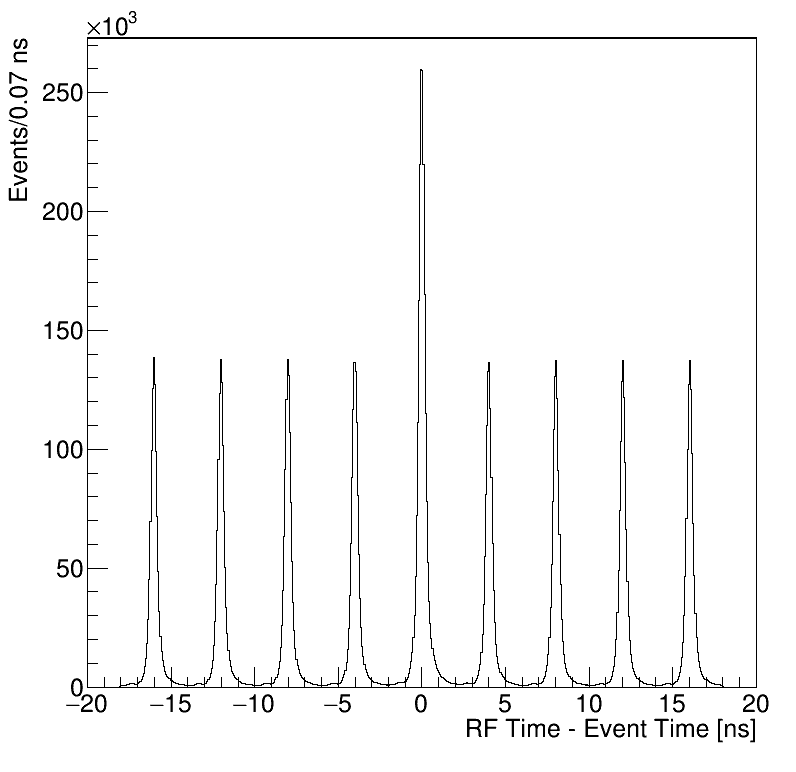

In [23]:
rf_timing_file = ROOT.TFile.Open('/work/halld/home/viducic/scripts/plotting/plot_delta_t.root')
hist_rf_timing = rf_timing_file.Get('RFTime')
hist_rf_timing_cut = rf_timing_file.Get('RFTimeCut')
hist_rf_timing_chi2_cut = rf_timing_file.Get('RFTimeChi2Cut')

hist_rf_timing.SetDirectory(0)
hist_rf_timing_cut.SetDirectory(0)
hist_rf_timing_chi2_cut.SetDirectory(0)

rf_timing_file.Close()

hist_rf_timing.SetLineColor(ROOT.kBlack)
hist_rf_timing_chi2_cut.SetLineColor(ROOT.kBlack)
hist_rf_timing_cut.SetFillColor(ROOT.kGray)
hist_rf_timing_cut.SetLineColor(ROOT.kBlack)

hist_rf_timing.GetYaxis().SetTitle(f'Events/{hist_rf_timing.GetBinWidth(1):0.2f} ns')

c.Clear()
hist_rf_timing.Draw()
# hist_rf_timing_chi2_cut.Draw('same')
# hist_rf_timing_cut.Draw('same')
c.Draw()


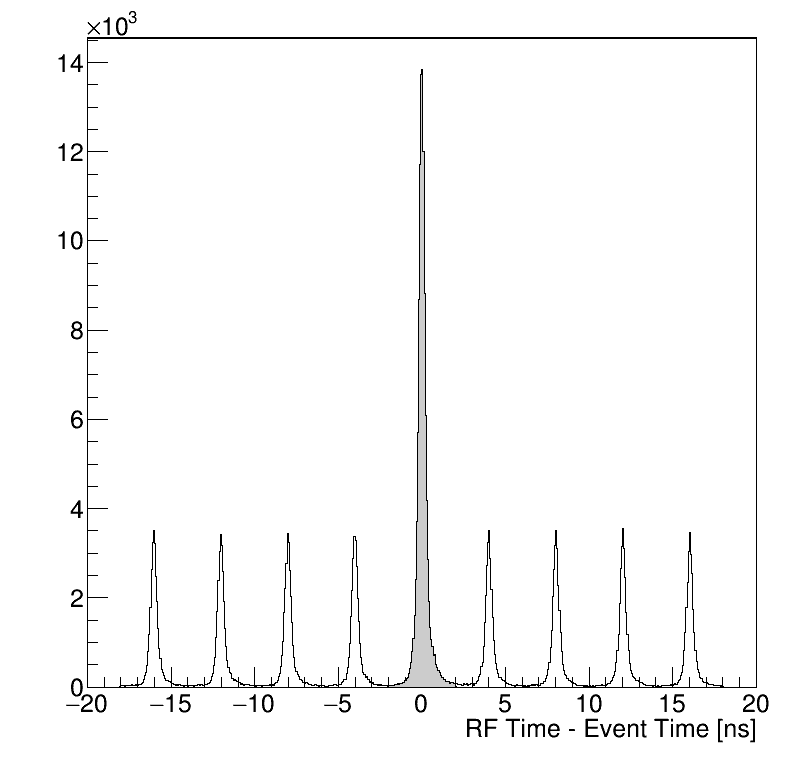

In [24]:
c.Clear()

hist_rf_timing_chi2_cut.Draw()
hist_rf_timing_cut.Draw('same')

c.Draw()

## Phasespace efficiency for $K^*$ Rejection 

In [25]:
# code found at: /work/halld/home/viducic/scripts/crosssection/kstar_rejection_dalitz_efficiency.ipynb

## $f_1$ Resolution Extraction

 FCN=153.897 FROM MIGRAD    STATUS=CONVERGED     115 CALLS         116 TOTAL
                     EDM=4.99287e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.56965e+02   7.06648e-01   4.29430e-03   2.95620e-06
   2  p1           1.28500e+00     fixed    
   3  p2           1.12668e-02   1.38380e-04   8.40938e-07  -1.71775e-02
   4  p3           2.20000e-02     fixed    


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


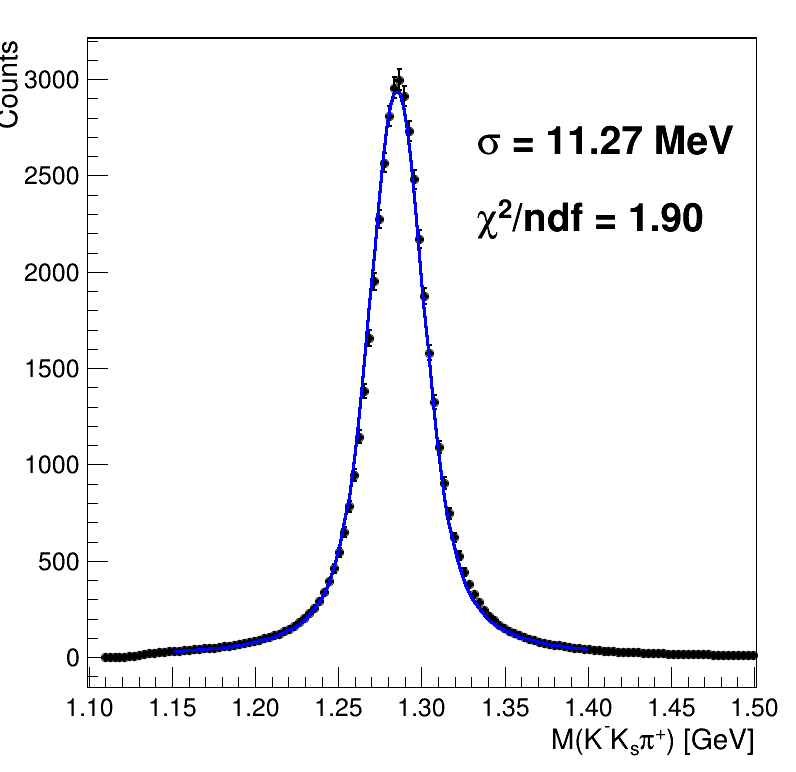

In [26]:
res_signal_mc = tools.get_integrated_gluex1_signal_mc_hist_for_resolution_fitting('pipkmks', scale_factor=50, nbins = 500)
tools.set_sqrtN_error(res_signal_mc)
res_signal_mc.GetXaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
res_signal_mc.GetYaxis().SetTitle('Counts')
res_signal_mc.GetYaxis().SetTitleOffset(1.6)
res_signal_mc.GetXaxis().SetRangeUser(1.1, 1.5)
res_signal_mc.SetMarkerStyle(20)

res_func = ROOT.TF1('func', '[0]*TMath::Voigt(x-[1], [2], [3])', 1.15, 1.4)
res_func.FixParameter(1, 1.285)
res_func.FixParameter(3, 0.022)

res_result = res_signal_mc.Fit(res_func, 'SR0')
res_func.SetLineColor(ROOT.kBlue)


chi2_per_ndf = res_func.GetChisquare() / res_func.GetNDF()

c.Clear()
res_signal_mc.Draw("E1")
res_func.Draw('same')

res_fit_latex = ROOT.TLatex()
res_fit_latex.SetTextSize(0.055)
res_fit_latex.DrawLatexNDC(0.6, 0.7, '#chi^{2}/ndf = ' + '{:.2f}'.format(chi2_per_ndf))
res_fit_latex.DrawLatexNDC(0.6, 0.8, '#sigma = ' + '{:.2f}'.format(res_func.GetParameter(2) * 1000) + ' MeV')
c.Draw()


## Selected Binned Fit Examples

In [27]:
print("fuck you idiot.")

fuck you idiot.


## Systematic Variations

In [28]:
sys_hist_filename = '/work/halld/home/viducic/systematic_errors/hists_to_show_variations_{}.root'
variations = ['kinfit_cl', 'pathlength', 'ks_m', 'ppi', 'kp', 'ksp', 'pp', 'neutral_kstar', 'charged_kstar', 'mx2_all']
root_file_pipkmks = ROOT.TFile.Open(sys_hist_filename.format('pipkmks'))
root_file_pimkpks = ROOT.TFile.Open(sys_hist_filename.format('pimkpks'))
sys_hist_dict_pipkmks = {}
sys_hist_dict_pimkpks = {}
for var in variations:
    hist_pipkmks = root_file_pipkmks.Get(var)
    hist_pimkpks = root_file_pimkpks.Get(var)
    hist_pipkmks.SetDirectory(0)
    hist_pipkmks.SetFillColor(ROOT.kGray)
    hist_pimkpks.SetDirectory(0)
    hist_pimkpks.SetFillColor(ROOT.kGray)
    hist_pimkpks.SetLineColor(ROOT.kRed)
    sys_hist_dict_pipkmks[var] = hist_pipkmks
    sys_hist_dict_pimkpks[var] = hist_pimkpks
root_file_pipkmks.Close()
root_file_pimkpks.Close()


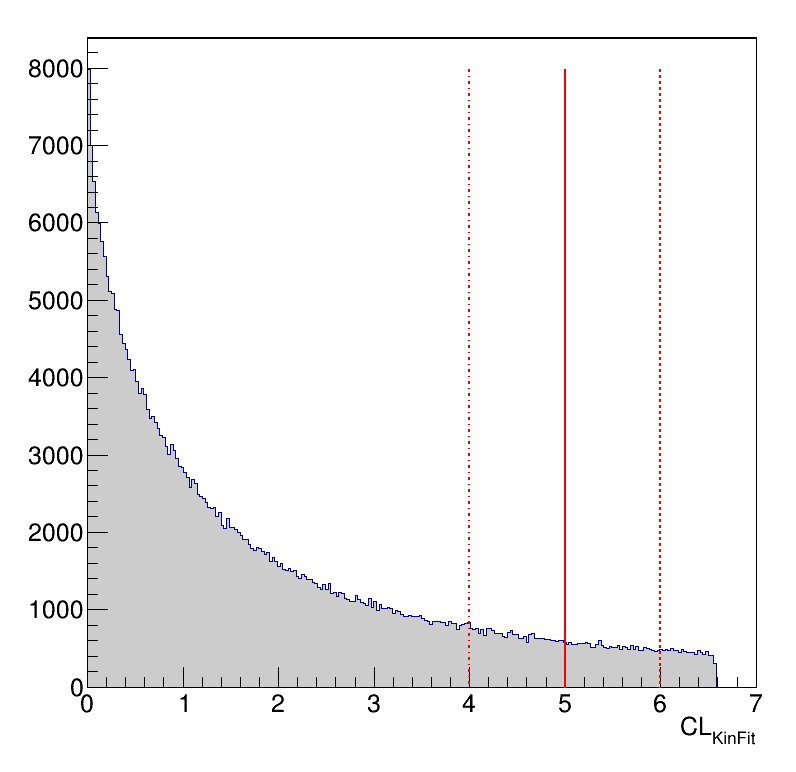

In [29]:
c.Clear()

var_cut = 'kinfit_cl'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 5, 6, 4
line_nominal = ROOT.TLine(nominal, sys_hist_dict_pipkmks[var_cut].GetMinimum(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, sys_hist_dict_pipkmks[var_cut].GetMinimum(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, sys_hist_dict_pipkmks[var_cut].GetMinimum(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

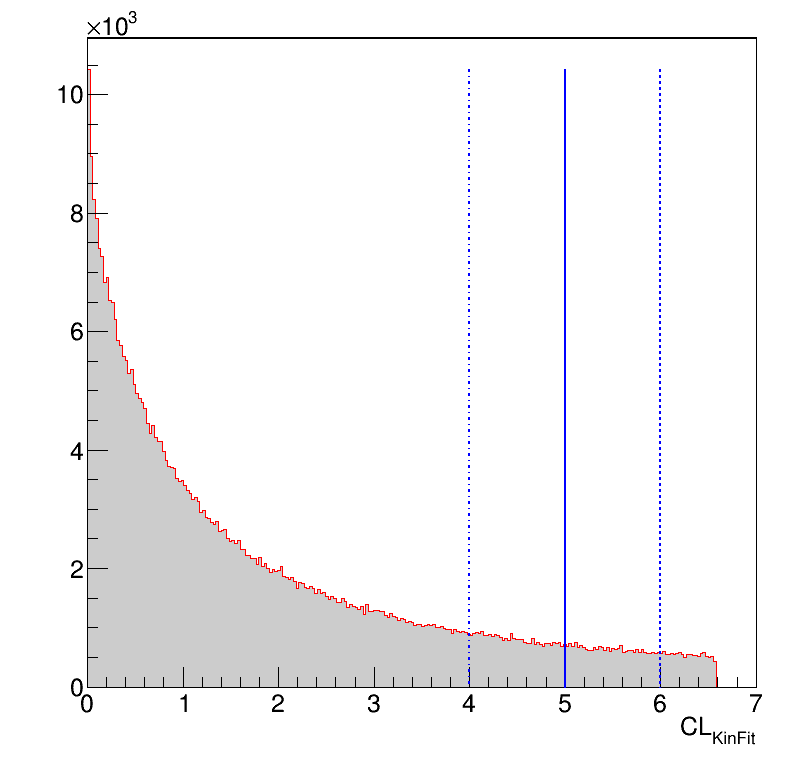

In [30]:
c.Clear()

var_cut = 'kinfit_cl'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 5, 6, 4
line_nominal = ROOT.TLine(nominal, sys_hist_dict_pimkpks[var_cut].GetMinimum(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, sys_hist_dict_pimkpks[var_cut].GetMinimum(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, sys_hist_dict_pimkpks[var_cut].GetMinimum(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

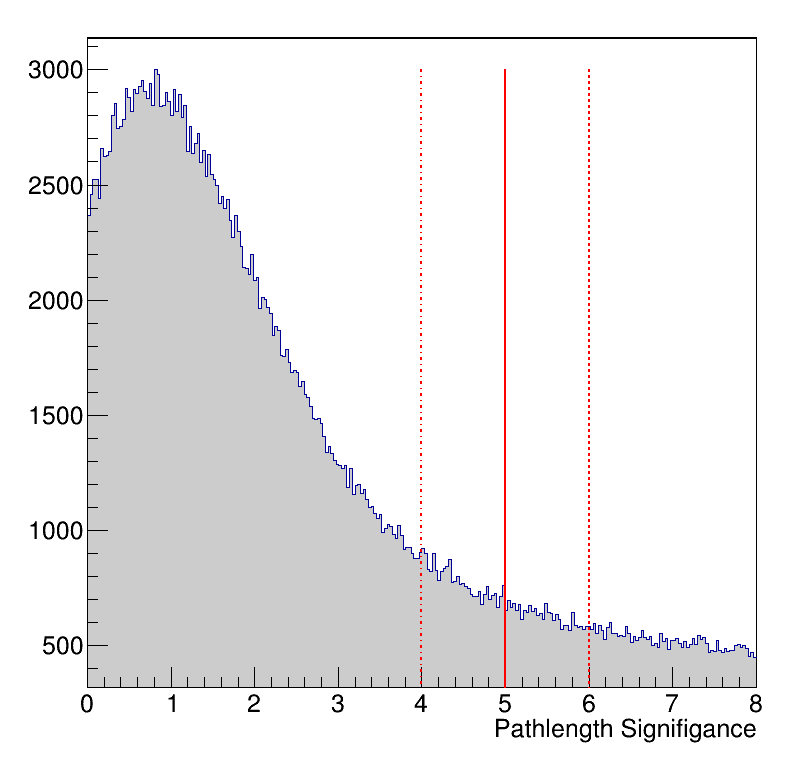

In [31]:
c.Clear()

var_cut = 'pathlength'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 5, 6, 4
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

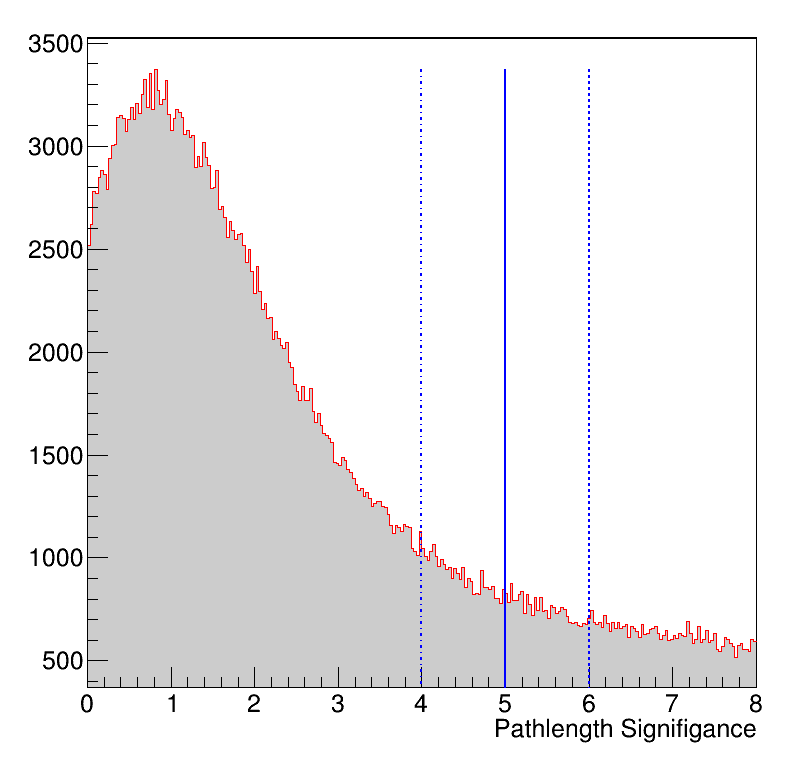

In [32]:
c.Clear()

var_cut = 'pathlength'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 5, 6, 4
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

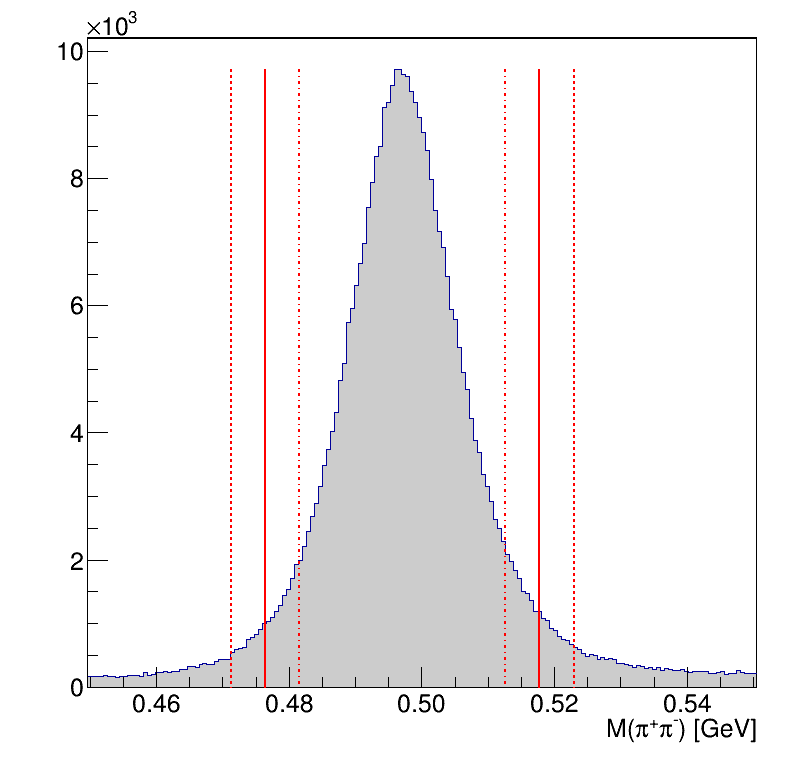

In [33]:
c.Clear()

var_cut = 'ks_m'
sys_hist_dict_pipkmks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = constants.KSHORT_FIT_MEAN + 2*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN + 2.5*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN + 1.5*constants.KSHORT_FIT_WIDTH
nominal_left, loose_left, tight_left = constants.KSHORT_FIT_MEAN - 2*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN - 2.5*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN - 1.5*constants.KSHORT_FIT_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kRed)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kRed)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kRed)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

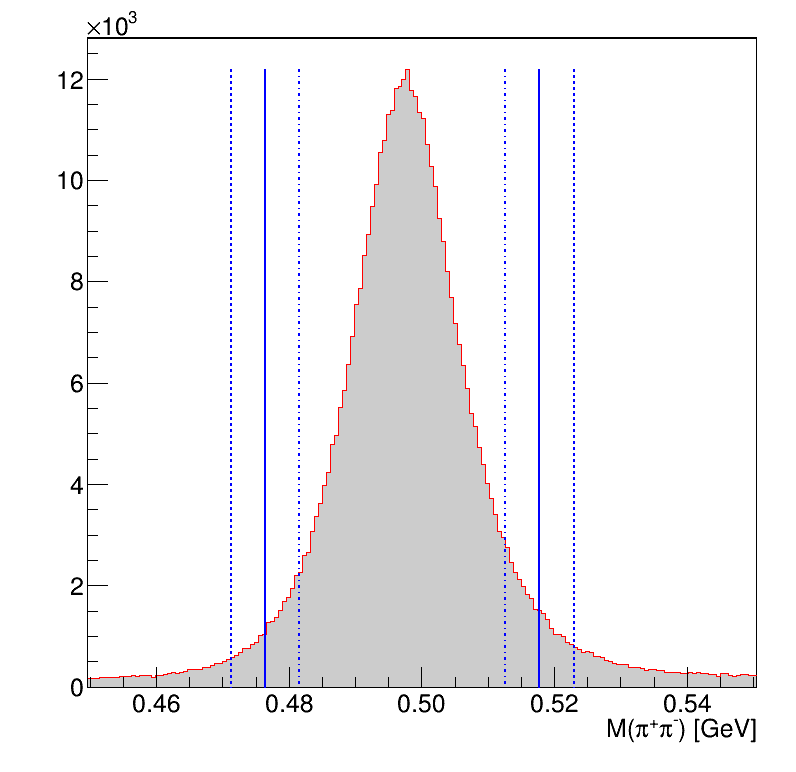

In [34]:
var_cut = 'ks_m'
sys_hist_dict_pimkpks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = constants.KSHORT_FIT_MEAN + 2*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN + 2.5*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN + 1.5*constants.KSHORT_FIT_WIDTH
nominal_left, loose_left, tight_left = constants.KSHORT_FIT_MEAN - 2*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN - 2.5*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN - 1.5*constants.KSHORT_FIT_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kBlue)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kBlue)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kBlue)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

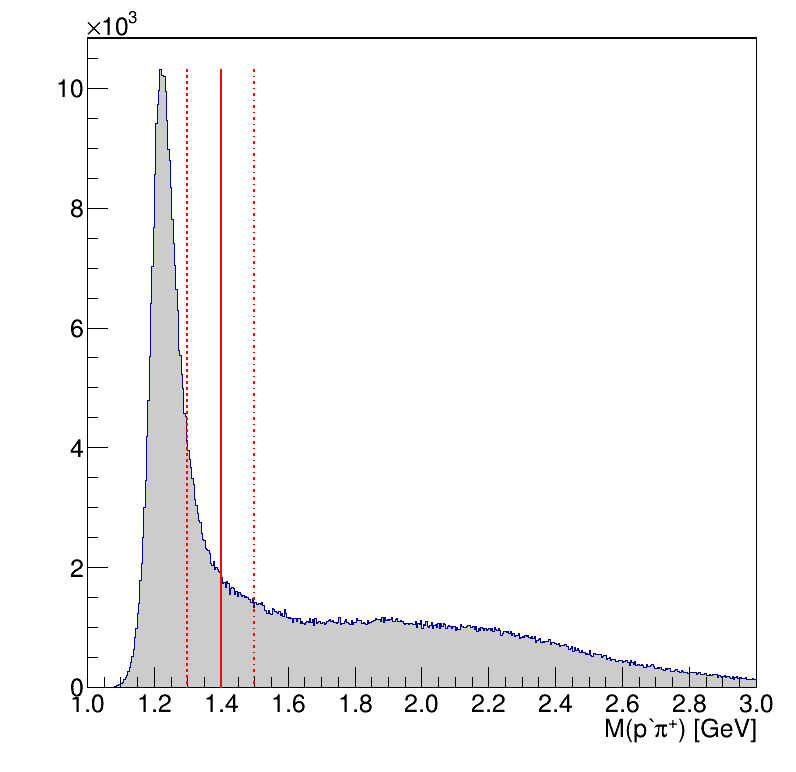

In [35]:
c.Clear()

var_cut = 'ppi'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 1.4, 1.3, 1.5
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

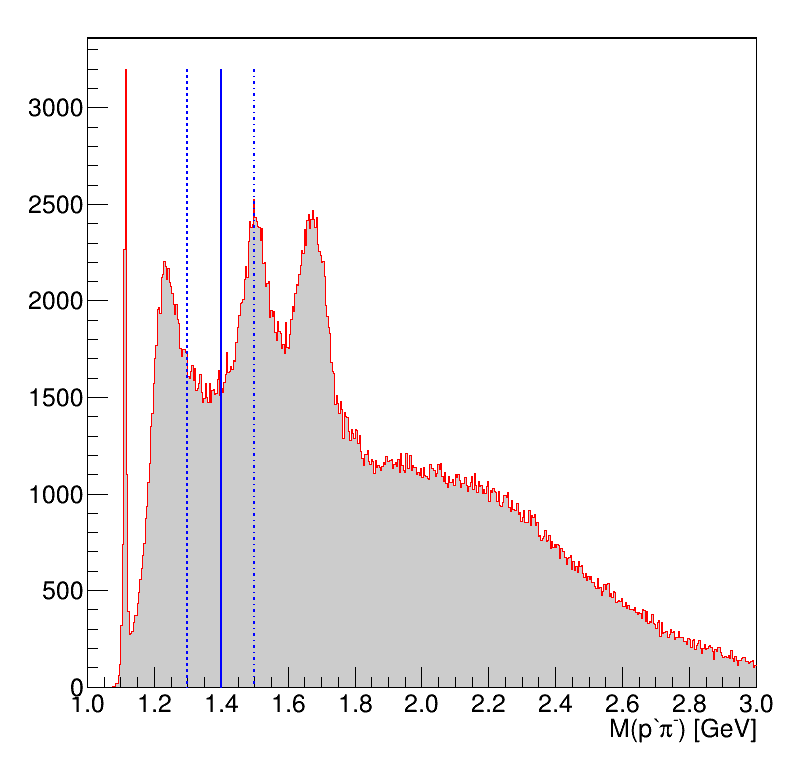

In [36]:
c.Clear()

var_cut = 'ppi'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 1.4, 1.3, 1.5
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

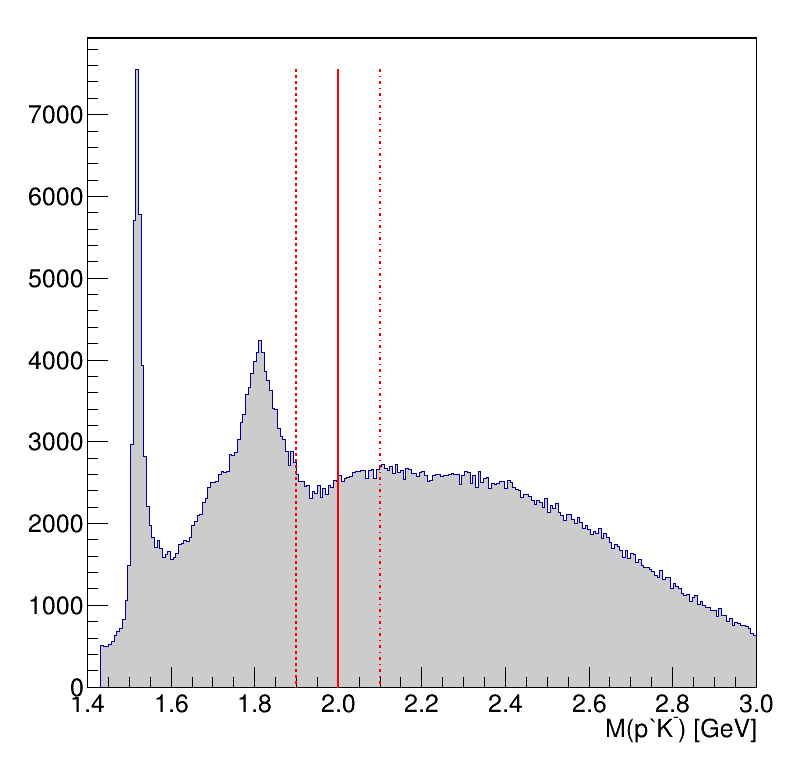

In [37]:
c.Clear()

var_cut = 'kp'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 2.0, 1.9, 2.1
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

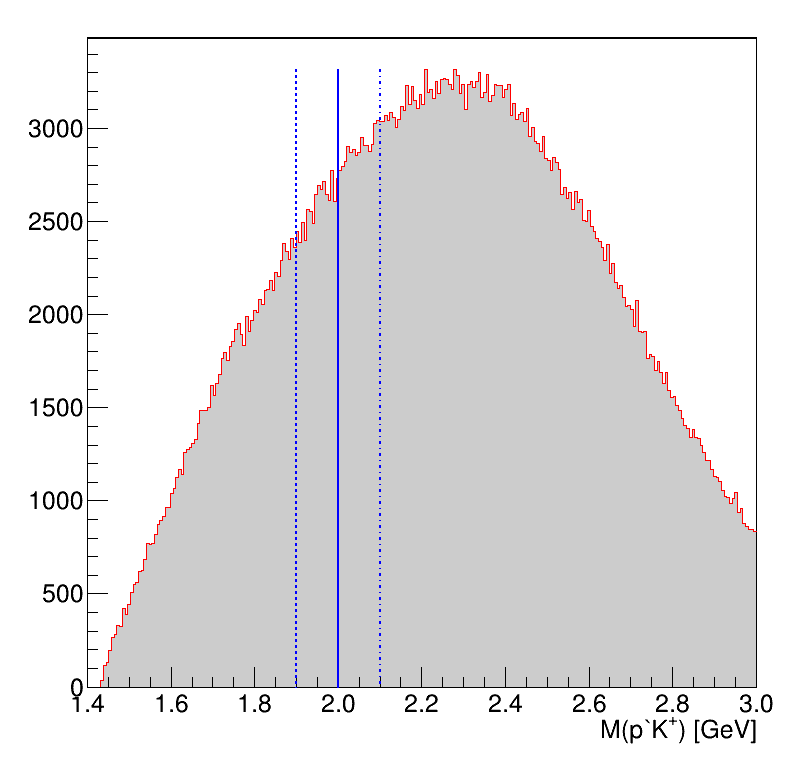

In [38]:
c.Clear()

var_cut = 'kp'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 2.0, 1.9, 2.1
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

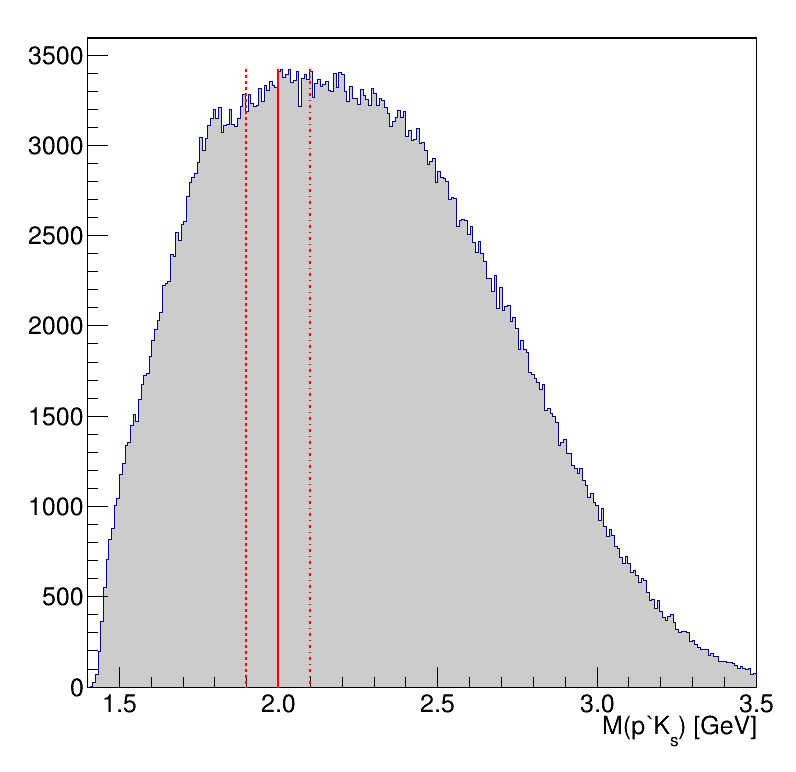

In [39]:
c.Clear()

var_cut = 'ksp'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 2.0, 1.9, 2.1
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

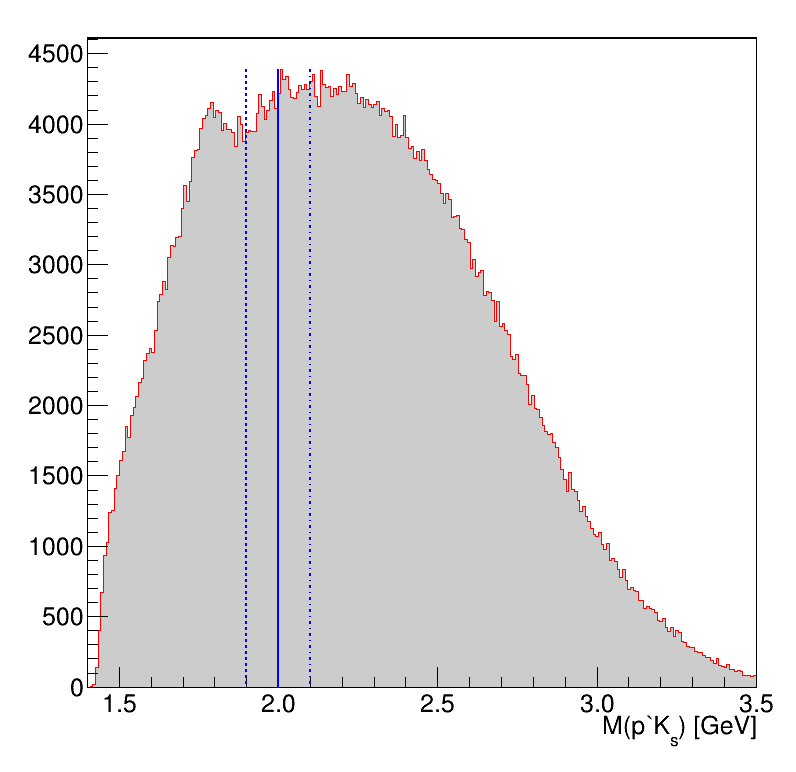

In [40]:
c.Clear()

var_cut = 'ksp'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 2.0, 1.9, 2.1
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

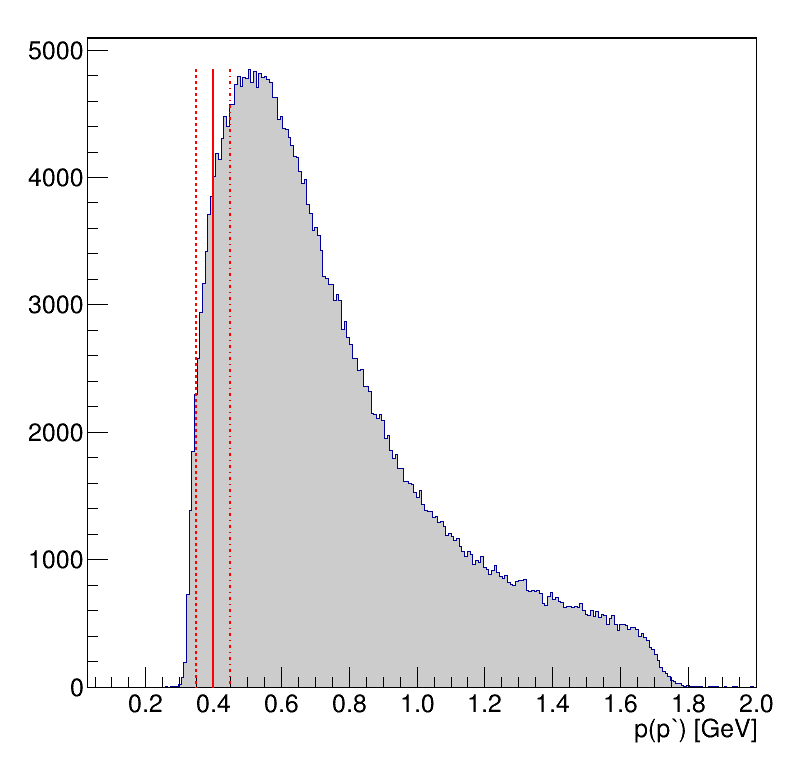

In [41]:
c.Clear()

var_cut = 'pp'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 0.4, 0.35, 0.45
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

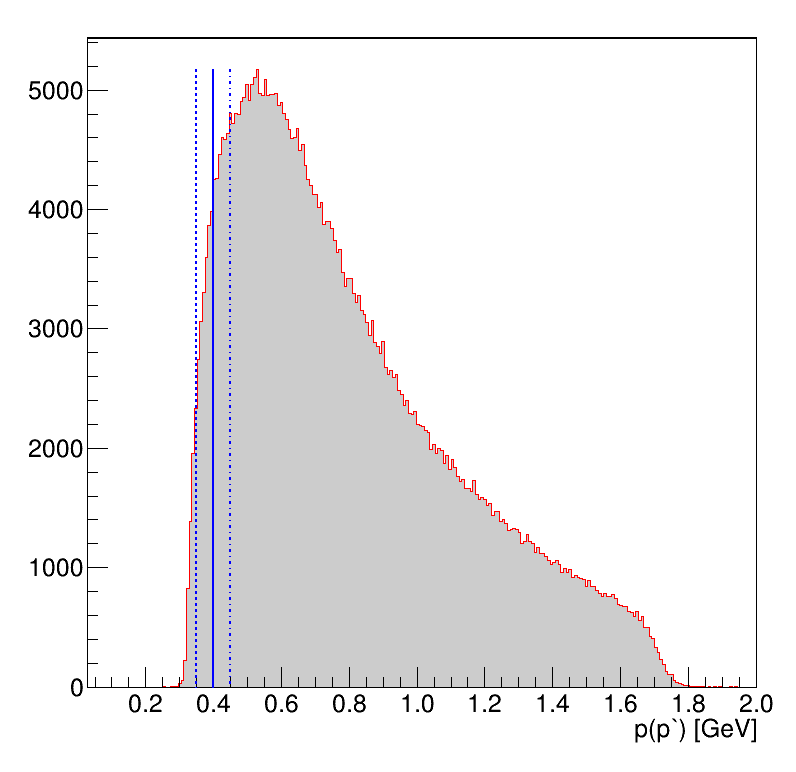

In [42]:
c.Clear()

var_cut = 'pp'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 0.4, 0.35, 0.45
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

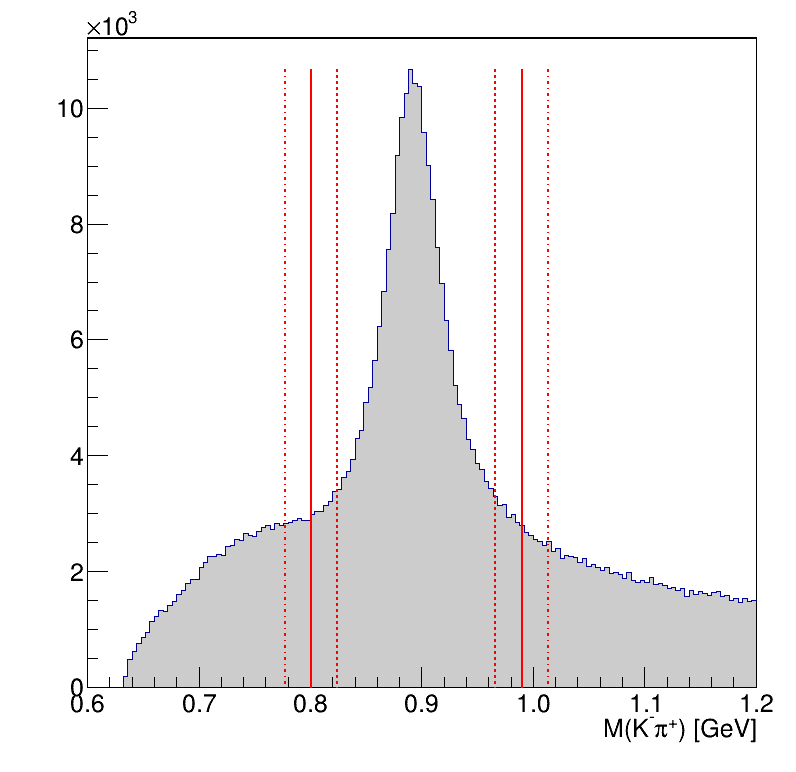

In [43]:
c.Clear()

var_cut = 'neutral_kstar'
# sys_hist_dict_pipkmks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = cuts.NEUTRAL_KSTAR_MASS + 2*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS + 1.5*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS + 2.5*cuts.NEUTRAL_KSTAR_WIDTH
nominal_left, loose_left, tight_left = cuts.NEUTRAL_KSTAR_MASS - 2*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS - 1.5*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS - 2.5*cuts.NEUTRAL_KSTAR_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kRed)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kRed)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kRed)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

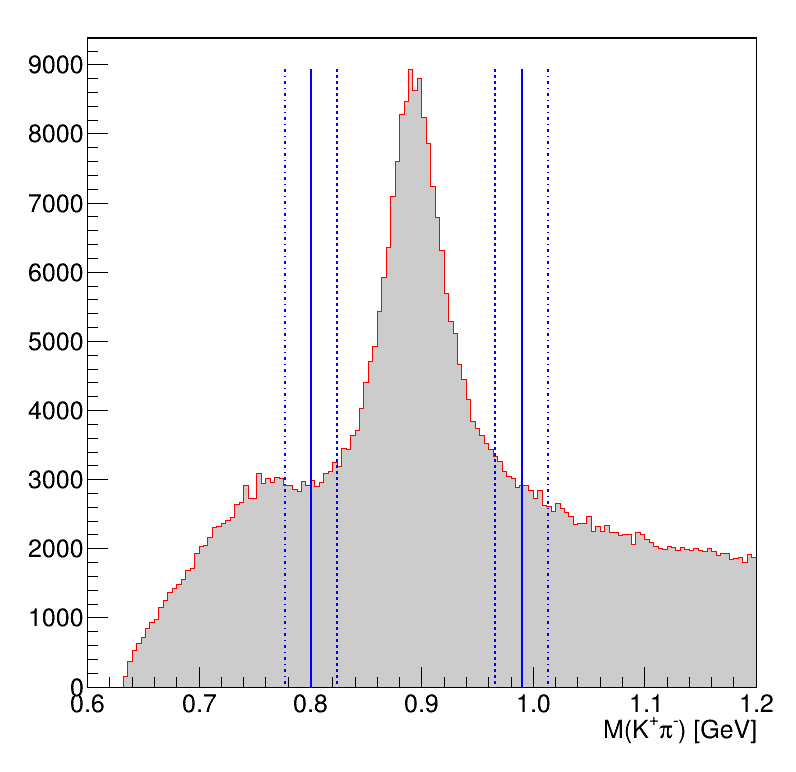

In [44]:
c.Clear()

var_cut = 'neutral_kstar'
# sys_hist_dict_pimkpks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = cuts.NEUTRAL_KSTAR_MASS + 2*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS + 1.5*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS + 2.5*cuts.NEUTRAL_KSTAR_WIDTH
nominal_left, loose_left, tight_left = cuts.NEUTRAL_KSTAR_MASS - 2*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS - 1.5*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS - 2.5*cuts.NEUTRAL_KSTAR_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kBlue)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kBlue)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kBlue)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

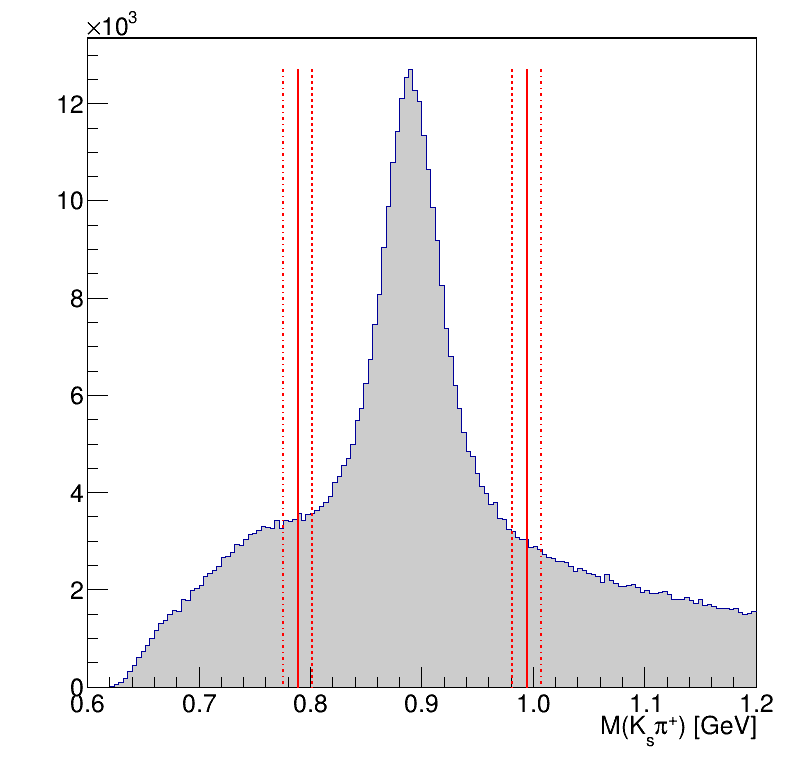

In [45]:
c.Clear()

var_cut = 'charged_kstar'
# sys_hist_dict_pipkmks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = cuts.CHARGED_KSTAR_MASS + 2*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS + 1.75*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS + 2.25*cuts.CHARGED_KSTAR_WIDTH
nominal_left, loose_left, tight_left = cuts.CHARGED_KSTAR_MASS - 2*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS - 1.75*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS - 2.25*cuts.CHARGED_KSTAR_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kRed)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kRed)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kRed)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

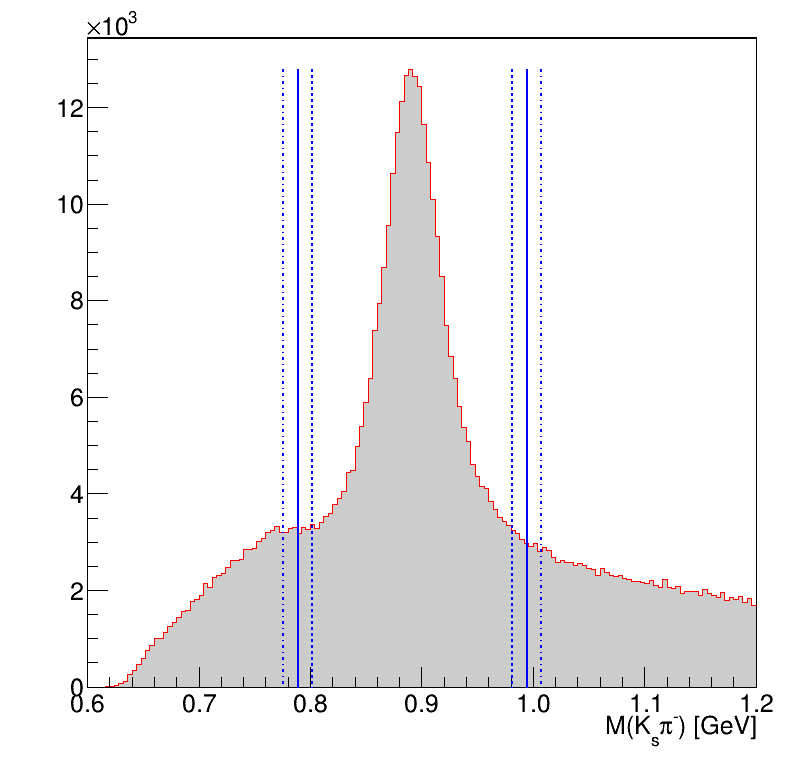

In [46]:
c.Clear()

var_cut = 'charged_kstar'
# sys_hist_dict_pimkpks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = cuts.CHARGED_KSTAR_MASS + 2*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS + 1.75*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS + 2.25*cuts.CHARGED_KSTAR_WIDTH
nominal_left, loose_left, tight_left = cuts.CHARGED_KSTAR_MASS - 2*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS - 1.75*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS - 2.25*cuts.CHARGED_KSTAR_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kBlue)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kBlue)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kBlue)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

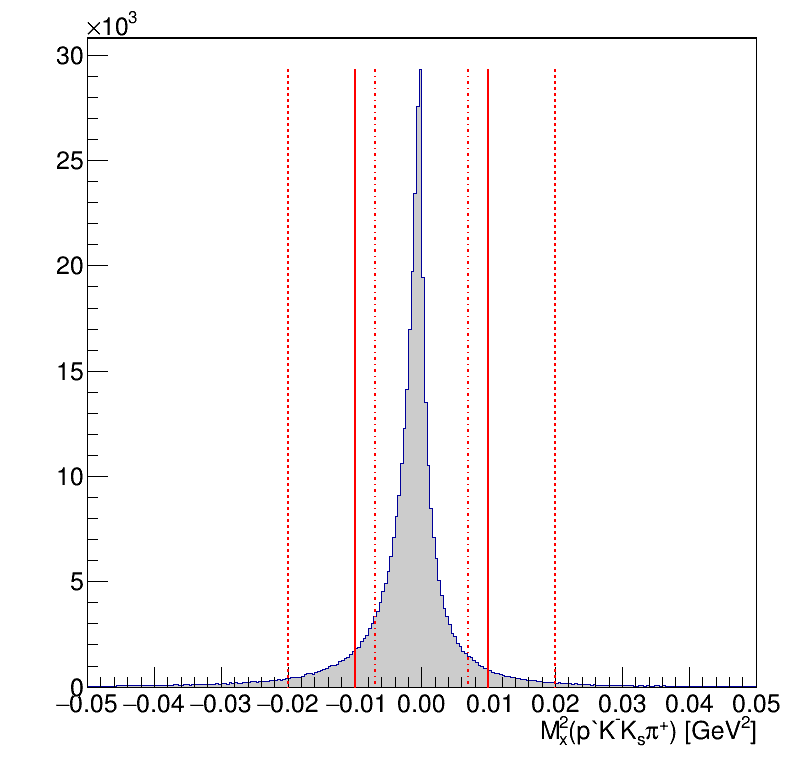

In [47]:
c.Clear()

var_cut = 'mx2_all'
# sys_hist_dict_pipkmks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 0.01, 0.02, 0.007
nominal_left, loose_left, tight_left = -0.01, -0.02, -0.007
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kRed)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kRed)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kRed)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

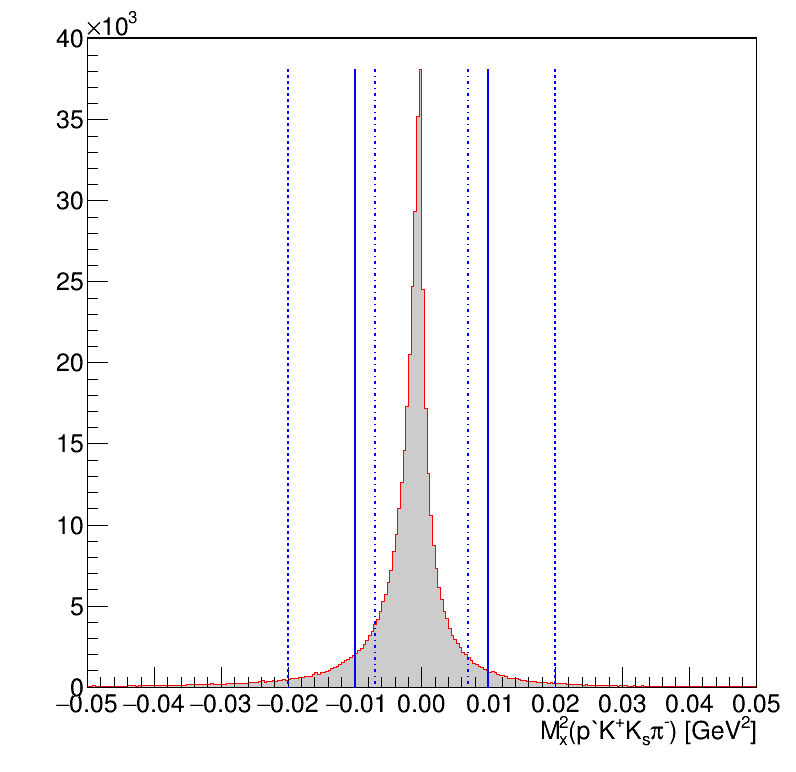

In [48]:
c.Clear()

var_cut = 'mx2_all'
# sys_hist_dict_pimkpks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 0.01, 0.02, 0.007
nominal_left, loose_left, tight_left = -0.01, -0.02, -0.007
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kBlue)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kBlue)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kBlue)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

## Sample Binned Fits

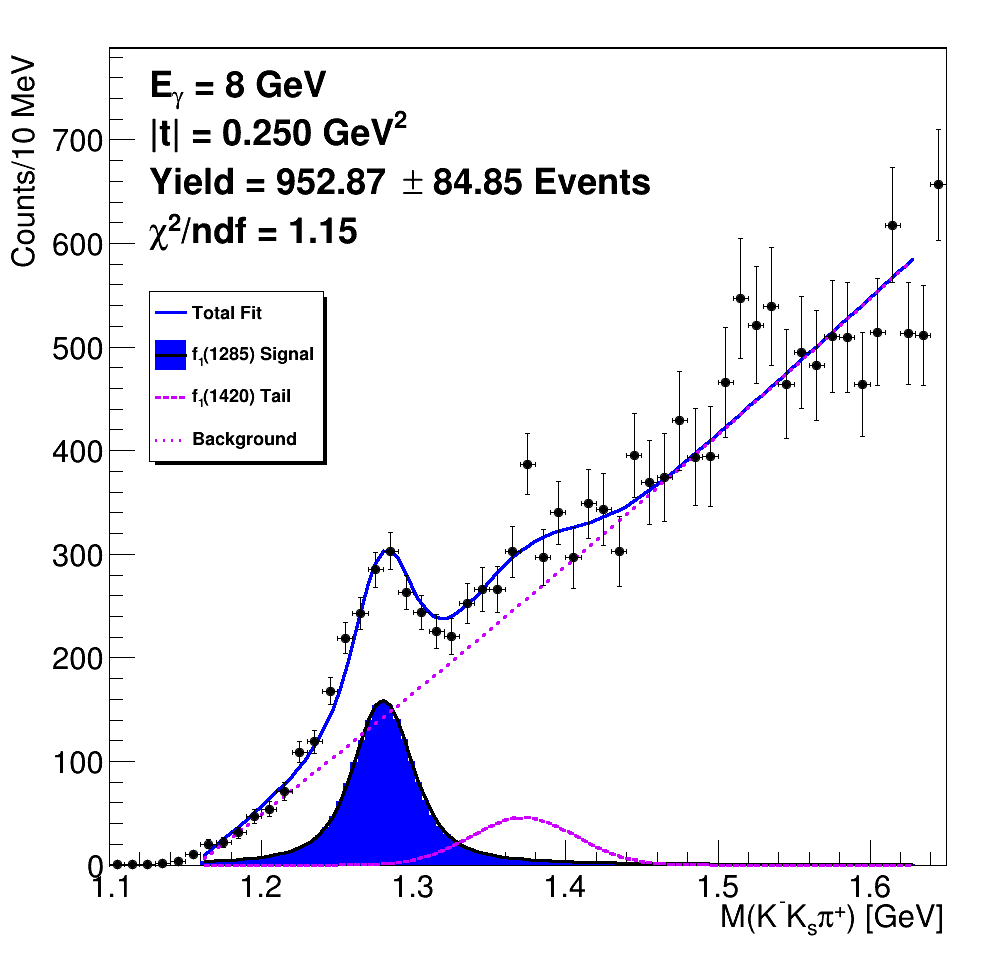

In [49]:
from IPython.display import Image, display

# Define the path to the image file
image_path = '/work/halld/home/viducic/scripts/crosssection/plots/pol2_gaus_pipkmks_e8_t2_fit.png'

# Create an instance of the image using the Image class
image = Image(filename=image_path)

# Display the image
display(image)

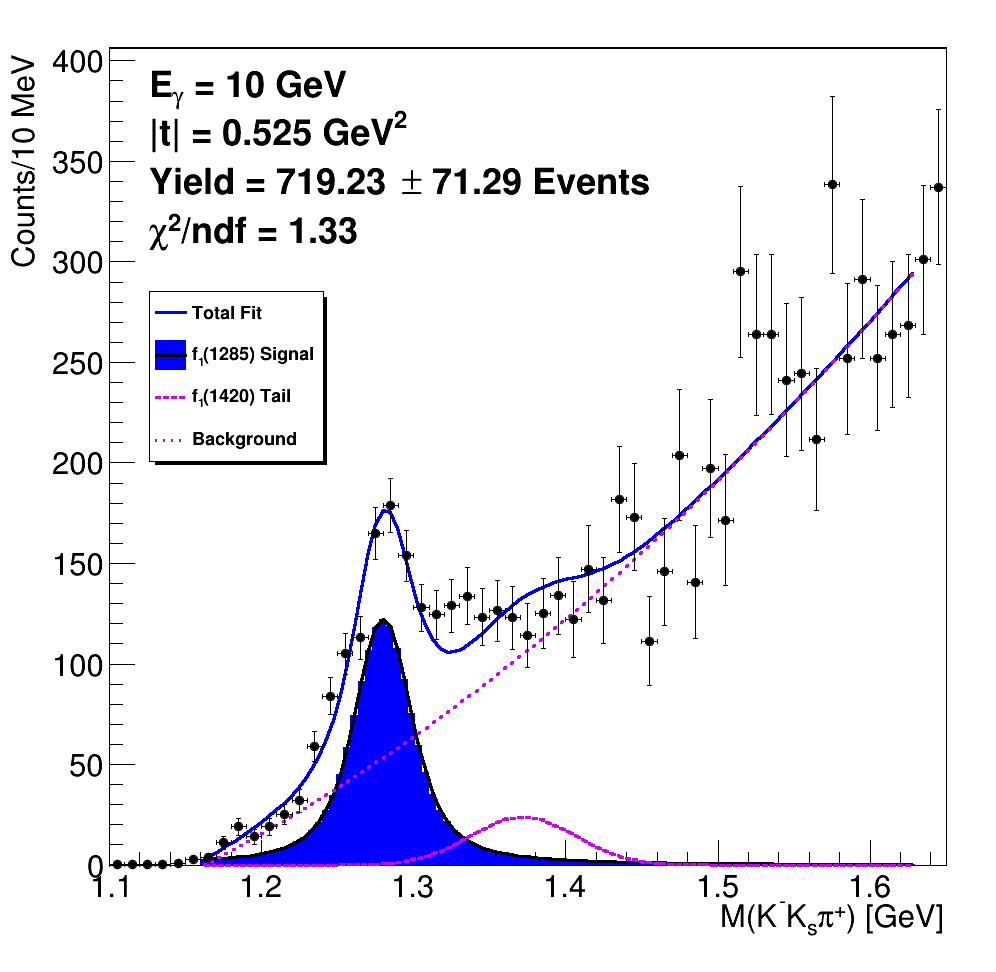

In [50]:
image_path = '/work/halld/home/viducic/scripts/crosssection/plots/pol2_gaus_pipkmks_e10_t4_fit.png'
image = Image(filename=image_path)
display(image)

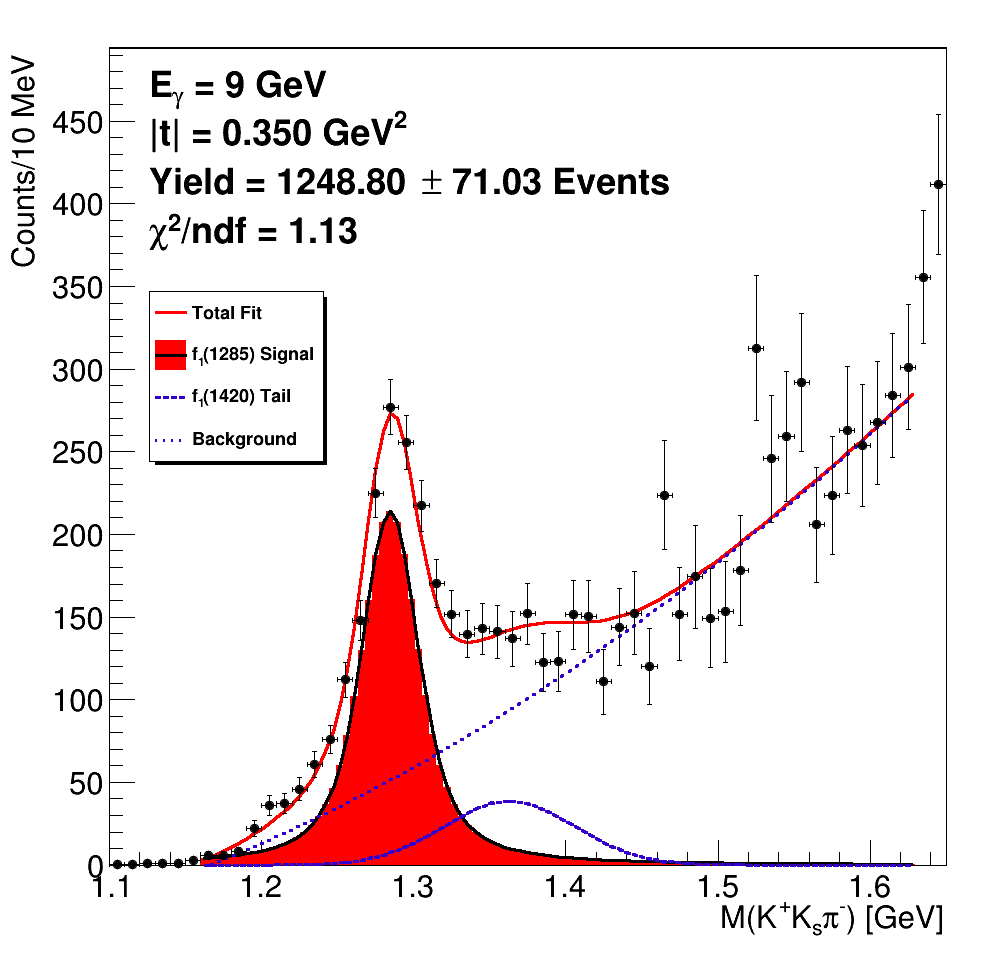

In [51]:
image_path = '/work/halld/home/viducic/scripts/crosssection/plots/pol2_gaus_pimkpks_e9_t3_fit.png'
image = Image(filename=image_path)
display(image)

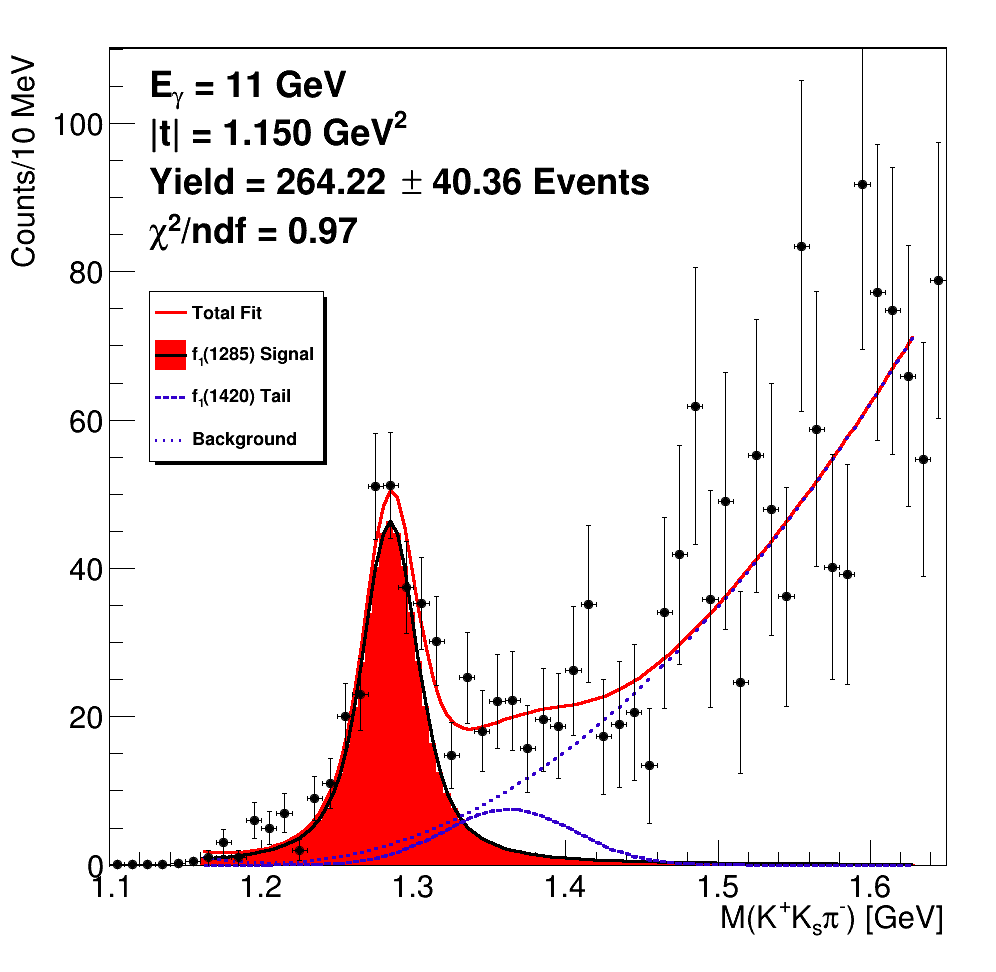

In [52]:
image_path = '/work/halld/home/viducic/scripts/crosssection/plots/pol2_gaus_pimkpks_e11_t6_fit.png'
image = Image(filename=image_path)
display(image)

## Cross Section Plot with Stat Errors Only

In [53]:
gluex_markers = {
    8: ROOT.kFullCircle,
    9: ROOT.kFullSquare,
    10: ROOT.kFullTriangleUp,
    11: ROOT.kFullDiamond
}

pipkmks_colors = {
    8: ROOT.kBlue,
    9: ROOT.kBlue+1,
    10: ROOT.kBlue+2,
    11: ROOT.kBlue+3
}

pimkpks_colors = {
    8: ROOT.kRed,
    9: ROOT.kRed+1,
    10: ROOT.kRed+2,
    11: ROOT.kRed+3
}

df_cs_results_stat_err_pipkmks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pipkmks/tf1_gaus_cross_section_values.csv')
df_cs_results_stat_err_pimkpks = pd.read_csv('/work/halld/home/viducic/data/fit_params/pimkpks/tf1_gaus_cross_section_values.csv')

cs_stat_grouped_pipkmks = df_cs_results_stat_err_pipkmks.groupby('beam_energy')
cs_stat_grouped_pimkpks = df_cs_results_stat_err_pimkpks.groupby('beam_energy')


In [54]:
cs_stat_err_pipkmks_graphs = []
cs_stat_err_pimkpks_graphs = []
for beam_energy, group in cs_stat_grouped_pipkmks:
    group_pim = cs_stat_grouped_pimkpks.get_group(beam_energy)
    graph_pip = ROOT.TGraphErrors(len(group.t_bin_middle.to_numpy()), group.t_bin_middle.to_numpy(dtype='d'), group.cross_section.to_numpy(), group.t_bin_width.to_numpy(), group.cross_section_error.to_numpy())
    graph_pim = ROOT.TGraphErrors(len(group_pim.t_bin_middle.to_numpy()), group_pim.t_bin_middle.to_numpy(dtype='d'), group_pim.cross_section.to_numpy(), group_pim.t_bin_width.to_numpy(), group_pim.cross_section_error.to_numpy())
    graph_pip.SetName(f'pipkmks_{beam_energy}')
    graph_pim.SetName(f'pimkpks_{beam_energy}')
    graph_pip.SetMarkerColor(pipkmks_colors[beam_energy])
    graph_pim.SetMarkerColor(pimkpks_colors[beam_energy])
    graph_pip.SetMarkerStyle(gluex_markers[beam_energy])
    graph_pim.SetMarkerStyle(gluex_markers[beam_energy])
    graph_pip.SetLineColor(pipkmks_colors[beam_energy])
    graph_pim.SetLineColor(pimkpks_colors[beam_energy])
    graph_pip.SetLineWidth(2)
    graph_pim.SetLineWidth(2)
    graph_pip.GetXaxis().SetTitle('-t [GeV^{2}]')
    graph_pim.GetXaxis().SetTitle('-t [GeV^{2}]')
    graph_pip.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    graph_pim.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    graph_pip.GetYaxis().SetTitleOffset(1.6)
    graph_pim.GetYaxis().SetTitleOffset(1.6)
    graph_pip.SetTitle(' E_{#gamma} = ' + str(beam_energy) + ' GeV')
    graph_pim.SetTitle(' E_{#gamma} = ' + str(beam_energy) + ' GeV')
    cs_stat_err_pipkmks_graphs.append(graph_pip)
    cs_stat_err_pimkpks_graphs.append(graph_pim)

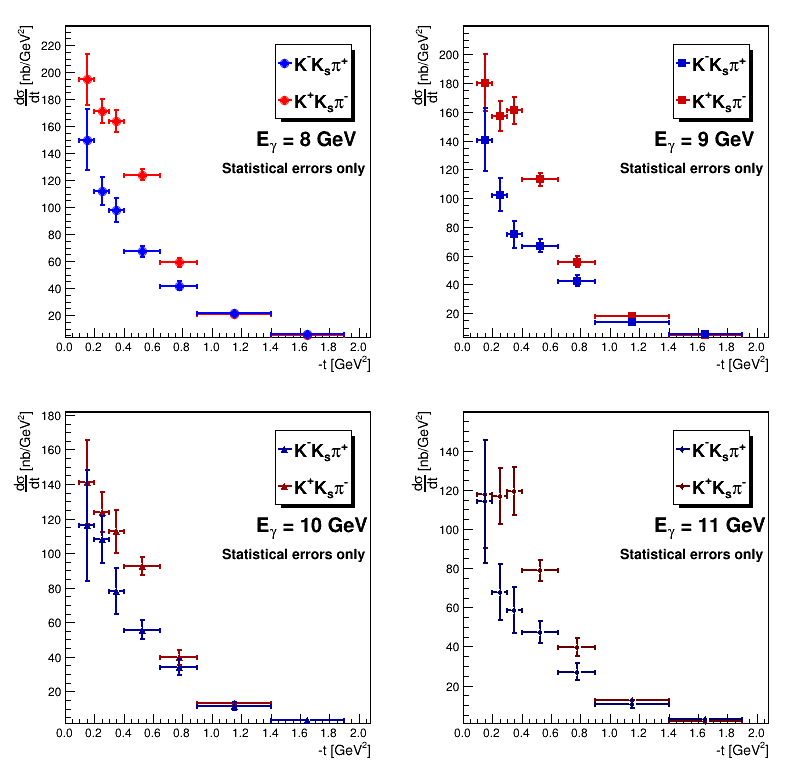

In [55]:
c.Clear()
c.Divide(2,2)

all_four_energies_legends = []

stat_err_notice = ROOT.TPaveText(0.65, 0.575, 0.85, 0.55, "brNDC")
stat_err_notice.SetFillColorAlpha(0, 0)
stat_err_notice.SetBorderSize(0)
stat_err_notice.SetTextSize(0.04)
stat_err_notice.SetTextAlign(22)
stat_err_notice.AddText('Statistical errors only')
notices = [stat_err_notice]


for i in range(4):
    legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
    legend.AddEntry(cs_stat_err_pipkmks_graphs[i], 'K^{-}K_{s}#pi^{+}', 'lpf')
    legend.AddEntry(cs_stat_err_pimkpks_graphs[i], 'K^{+}K_{s}#pi^{-}', 'lpf')
    all_four_energies_legends.append(legend)

    c.cd(i+1)
    pad = c.GetPad(i+1)
    pad.SetLeftMargin(0.15) 
    cs_stat_err_pimkpks_graphs[i].Draw('AP')
    cs_stat_err_pipkmks_graphs[i].Draw('P')
    all_four_energies_legends[i].Draw()

    cs_stat_err_latex = ROOT.TLatex()
    cs_stat_err_latex.SetTextSize(0.06)
    cs_stat_err_latex.DrawLatexNDC(0.65, 0.625, 'E_{#gamma} = ' + str(i+8) + ' GeV')
    
    notices[0].Draw()


c.Draw()

## Barlow Plots for Systematic Variations in ROOT

In [56]:
# barlow_df = ROOT.RDF.MakeCsvDataFrame('/work/halld/home/viducic/systematic_errors/barlow_results_signifigant_cuts.csv')
barlow_df = ROOT.RDF.MakeCsvDataFrame('/work/halld/home/viducic/systematic_errors/barlow_results.csv')
graphs_pipkmks = []
graphs_pimkpks = []
nop_variations = ['kinfit_cl', 'pathlength', 'ks_m', 'ppi', 'kp', 'ksp', 'neutral_kstar', 'charged_kstar', 'mx2_all']
for var in nop_variations:
    # I know this is bad code but I don't have the time. 
    graph_pipkmks_8 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 8').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graph_pipkmks_9 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 9').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graph_pipkmks_10 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 10').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graph_pipkmks_11 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 11').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graphs_pipkmks.append((graph_pipkmks_8, graph_pipkmks_9, graph_pipkmks_10, graph_pipkmks_11))

    graph_pimkpks_8 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 8').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graph_pimkpks_9 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 9').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graph_pimkpks_10 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 10').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graph_pimkpks_11 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 11').Filter(f'cut == "{var}"').Graph('t', 'sigma_barlow')
    graphs_pimkpks.append((graph_pimkpks_8, graph_pimkpks_9, graph_pimkpks_10, graph_pimkpks_11))

barlow_df.Count().GetValue()
        

700

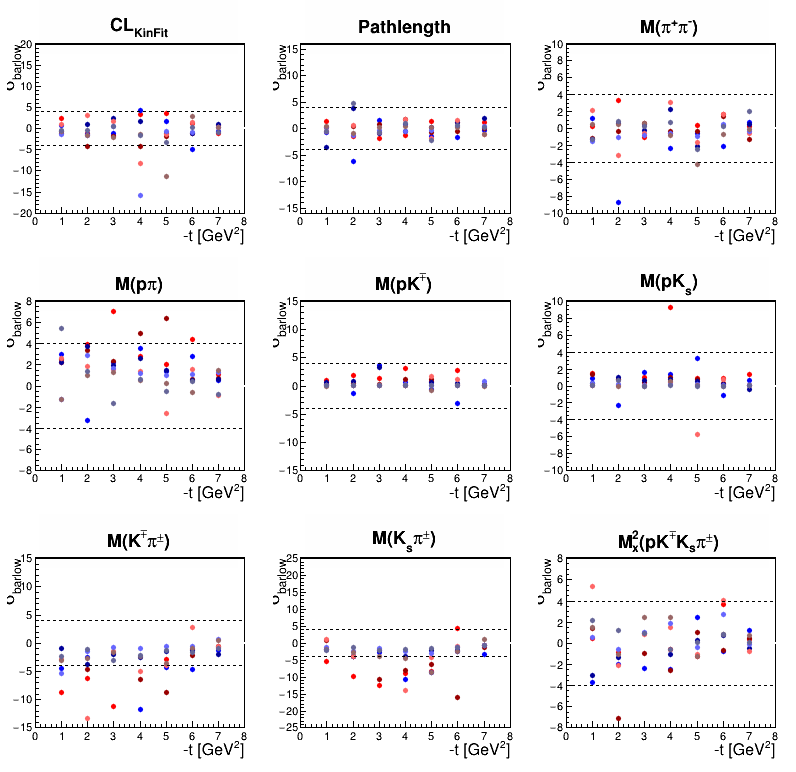

In [57]:
c.Clear()
c.Divide(3, 3)

# ROOT.gROOT.SetStyle("Plain")

variation_titles = ('CL_{KinFit}', 'Pathlength', 'M(#pi^{+}#pi^{-})', 'M(p#pi)', 'M(pK^{#mp})', 'M(pK_{s})', 'M(K^{#mp}#pi^{#pm})', 'M(K_{s}#pi^{#pm})', 'M_{x}^{2}(pK^{#mp}K_{s}#pi^{#pm})')
titles = []
y_lims = [20, 16, 10, 8, 15, 10, 15, 25, 8]
# y_lims = [100, 100, 100, 100, 100, 100, 100, 100, 100]

line_upper = ROOT.TLine(0, 4, 8, 4)
line_upper.SetLineColor(ROOT.kBlack)
line_upper.SetLineWidth(1)
line_upper.SetLineStyle(2)
line_lower = ROOT.TLine(0, -4, 8, -4)
line_lower.SetLineColor(ROOT.kBlack)
line_lower.SetLineWidth(1)
line_lower.SetLineStyle(2)
lines = [line_upper, line_lower]
hlist = []

for i, (gpip, gpim) in enumerate(zip(graphs_pipkmks, graphs_pimkpks)):
    pad = c.cd(i+1)
    pad.SetTopMargin(0.15)
    pad.SetBottomMargin(0.15)

    gpip[0].SetMarkerColor(ROOT.kBlue)
    gpip[1].SetMarkerColor(ROOT.kBlue+2)
    gpip[2].SetMarkerColor(ROOT.kBlue-7)
    gpip[3].SetMarkerColor(ROOT.kBlue-5)
    gpim[0].SetMarkerColor(ROOT.kRed)
    gpim[1].SetMarkerColor(ROOT.kRed+2)
    gpim[2].SetMarkerColor(ROOT.kRed-7)
    gpim[3].SetMarkerColor(ROOT.kRed-5)

    h = ROOT.TH1F(f"h{i}", "", 1, 0, 8)
    h.GetYaxis().SetRangeUser(-y_lims[i], y_lims[i])
    h.GetYaxis().SetTitle("#sigma_{barlow}")
    h.GetYaxis().SetTitleSize(0.08)
    h.GetYaxis().SetTitleOffset(0.7)
    h.GetYaxis().SetLabelSize(0.05)
    h.GetXaxis().SetLabelSize(0.05)
    h.GetXaxis().SetTitle("-t [GeV^{2}]")
    h.GetXaxis().SetTitleSize(0.06)
    h.GetXaxis().SetTitleOffset(0.8)

    h.GetXaxis().SetTitleSize(0.07)
    h.SetLineColor(0)
    hlist.append(h)
    hlist[i].Draw()

    # gpip[0].GetXaxis().SetRangeUser(0, 8)
    # gpip[0].GetYaxis().SetRangeUser(-y_lims[i], y_lims[i])
    # gpip[0].Draw("AP")
    for j in range(4):
        gpip[j].SetMarkerSize(0.5)
        # gpip[j].GetXaxis().SetRangeUser(-1, 10)
        gpip[j].GetYaxis().SetTitle("#sigma_{barlow}")
        gpip[j].GetXaxis().SetTitle("-t [GeV^{2}]")
        # gpip[i].SetOptTitle(1)
        gpip[j].SetMarkerStyle(20)
        gpim[j].SetMarkerSize(0.5)
        # gpim[j].GetXaxis().SetRangeUser(-1, 10)
        gpim[j].GetYaxis().SetTitle("#sigma_{barlow}")
        gpim[j].GetXaxis().SetTitle("-t [GeV^{2}]")
        # gpim[i].SetOptTitle(1)
        gpim[j].SetMarkerStyle(20)

        gpim[j].Draw("SAME P")
        gpip[j].Draw("SAME P")

    lines[0].Draw()
    lines[1].Draw()

    title = ROOT.TPaveText(0.05 + (i % 3) / 3.0, 0.93 - (i // 3) / 3.0, 0.3 + (i % 3) / 3.0, 1.0 - (i // 3) / 3.0, "brNDC")
    title.SetFillColorAlpha(0, 0)
    title.SetBorderSize(0)
    title.SetTextSize(0.025)
    title.SetTextAlign(22)
    title.AddText(variation_titles[i])
    titles.append(title)

c.cd()
for title in titles:
    title.Draw()

# x_label = ROOT.TPaveText(0.5, 0.01, 0.95, 0.05, "brNDC")
# x_label.SetFillColorAlpha(0, 0)
# x_label.SetBorderSize(0)
# x_label.SetTextSize(0.025)
# x_label.SetTextAlign(22)
# x_label.AddText("-t [GeV^{2}]")

# y_label = ROOT.TPaveText(0.0, 0.04, 0.1, 0.08, "brNDC")
# y_label.SetFillColorAlpha(0, 0)
# y_label.SetBorderSize(0)
# y_label.SetTextSize(0.025)
# y_label.SetTextAlign(22)
# y_label.AddText("#sigma_{barlow}")

# x_label.Draw()
# y_label.Draw()

c.Draw()

# ROOT.gStyle.SetOptTitle(0)


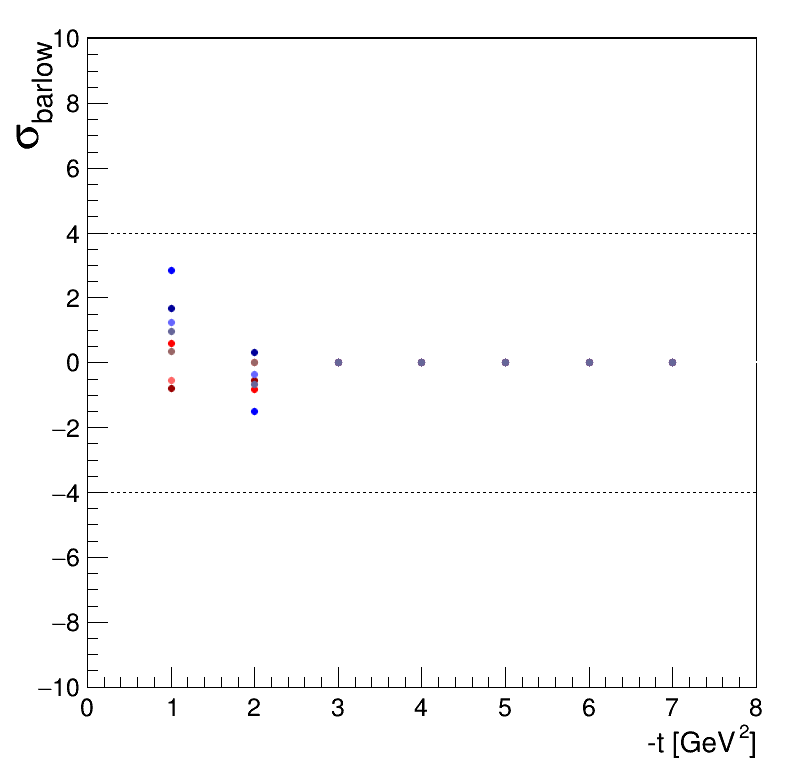

In [58]:
c.Clear()

pp_barlow_graphs_pipkmks = []
pp_barlow_graphs_pimkpks = []
pp_graph_pipkmks_8 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 8').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_graph_pipkmks_9 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 9').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_graph_pipkmks_10 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 10').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_graph_pipkmks_11 = barlow_df.Filter('channel == "pipkmks"').Filter(f'e == 11').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_barlow_graphs_pipkmks.append((pp_graph_pipkmks_8, pp_graph_pipkmks_9, pp_graph_pipkmks_10, pp_graph_pipkmks_11))
pp_graph_pimkpks_8 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 8').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_graph_pimkpks_9 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 9').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_graph_pimkpks_10 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 10').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_graph_pimkpks_11 = barlow_df.Filter('channel == "pimkpks"').Filter(f'e == 11').Filter(f'cut == "pp"').Graph('t', 'sigma_barlow')
pp_barlow_graphs_pimkpks.append((pp_graph_pimkpks_8, pp_graph_pimkpks_9, pp_graph_pimkpks_10, pp_graph_pimkpks_11))

h = ROOT.TH1F(f"h", "", 1, 0, 8)
h.GetYaxis().SetRangeUser(-10, 10)
h.GetYaxis().SetTitle("#sigma_{barlow}")
h.GetYaxis().SetTitleSize(0.06)
h.GetYaxis().SetTitleOffset(0.7)
# h.GetYaxis().SetLabelSize(0.05)
# h.GetXaxis().SetLabelSize(0.05)
h.GetXaxis().SetTitle("-t [GeV^{2}]")
# h.GetXaxis().SetTitleSize(0.04)
# h.GetXaxis().SetTitleOffset(0.8)

# h.GetXaxis().SetTitleSize(0.07)
h.SetLineColor(0)

h.Draw()

pp_graph_pipkmks_8.SetMarkerColor(ROOT.kBlue)
pp_graph_pipkmks_9.SetMarkerColor(ROOT.kBlue+2)
pp_graph_pipkmks_10.SetMarkerColor(ROOT.kBlue-7)
pp_graph_pipkmks_11.SetMarkerColor(ROOT.kBlue-5)
pp_graph_pimkpks_8.SetMarkerColor(ROOT.kRed)
pp_graph_pimkpks_9.SetMarkerColor(ROOT.kRed+2)
pp_graph_pimkpks_10.SetMarkerColor(ROOT.kRed-7)
pp_graph_pimkpks_11.SetMarkerColor(ROOT.kRed-5)


for i, (pgp, pgm) in enumerate(zip(pp_barlow_graphs_pipkmks, pp_barlow_graphs_pimkpks)):
    for j in range(4):
        pgp[j].SetMarkerSize(0.8)
        pgp[j].GetYaxis().SetTitle("#sigma_{barlow}")
        pgp[j].GetXaxis().SetTitle("-t [GeV^{2}]")
        pgp[j].SetMarkerStyle(20)
        pgm[j].SetMarkerSize(0.8)
        pgm[j].GetYaxis().SetTitle("#sigma_{barlow}")
        pgm[j].GetXaxis().SetTitle("-t [GeV^{2}]")
        pgm[j].SetMarkerStyle(20)

        pgm[j].Draw("SAME P")
        pgp[j].Draw("SAME P")

lines[0].Draw()
lines[1].Draw()

c.Draw()



## Cross Section With All Errors

In [59]:
gluex_markers = {
    8: ROOT.kFullCircle,
    9: ROOT.kFullSquare,
    10: ROOT.kFullTriangleUp,
    11: ROOT.kFullDiamond
}

theory_markers = {
    8: ROOT.kFullDotLarge,
    9: ROOT.kFullDotLarge,
    10: ROOT.kOpenTriangleUp,
    11: ROOT.kOpenDiamond
}

pipkmks_colors = {
    8: ROOT.kBlue,
    9: ROOT.kBlue+1,
    10: ROOT.kBlue+2,
    11: ROOT.kBlue+3
}

pimkpks_colors = {
    8: ROOT.kRed,
    9: ROOT.kRed+1,
    10: ROOT.kRed+2,
    11: ROOT.kRed+3
}

clas_colors = {
    2.45: ROOT.kOrange,
    2.55: ROOT.kOrange+1,
    2.65: ROOT.kOrange+2,
    2.75: ROOT.kOrange+3
}

clas_markers = {
    2.45: ROOT.kFullDiamond,
    2.55: ROOT.kFullSquare,
    2.65: ROOT.kFullTriangleUp,
    2.75: ROOT.kFullCircle
}

In [60]:
final_cs_graphs_pipkmks = []
final_cs_graphs_pimkpks = []

cs_final_grouped_pipkmks = df_cs_final_pipkmks.groupby('beam_energy')
cs_final_grouped_pimkpks = df_cs_final_pimkpks.groupby('beam_energy')

for (beam_energy, grouppip), (e, grouppim) in zip(cs_final_grouped_pipkmks, cs_final_grouped_pimkpks):
    graph_pip = ROOT.TGraphErrors(len(grouppip.t_bin_middle.to_numpy()), grouppip.t_bin_middle.to_numpy(), grouppip.cross_section.to_numpy(), grouppip.t_bin_width.to_numpy(), grouppip.cs_err.to_numpy())
    graph_pim = ROOT.TGraphErrors(len(grouppim.t_bin_middle.to_numpy()), grouppim.t_bin_middle.to_numpy(), grouppim.cross_section.to_numpy(), grouppim.t_bin_width.to_numpy(), grouppim.cs_err.to_numpy())
    graph_pip.SetName(f'pipkmks_{beam_energy}')
    graph_pim.SetName(f'pimkpks_{beam_energy}')
    graph_pip.SetMarkerColor(pipkmks_colors[beam_energy])
    graph_pim.SetMarkerColor(pimkpks_colors[beam_energy])
    graph_pip.SetMarkerStyle(gluex_markers[beam_energy])
    graph_pim.SetMarkerStyle(gluex_markers[beam_energy])
    graph_pip.SetLineColor(pipkmks_colors[beam_energy])
    graph_pim.SetLineColor(pimkpks_colors[beam_energy])
    graph_pip.SetLineWidth(2)
    graph_pim.SetLineWidth(2)
    graph_pip.GetXaxis().SetTitle('-t [GeV^{2}]')
    graph_pim.GetXaxis().SetTitle('-t [GeV^{2}]')
    graph_pip.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    graph_pim.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    graph_pip.GetYaxis().SetTitleOffset(1.6)
    graph_pim.GetYaxis().SetTitleOffset(1.6)
    final_cs_graphs_pipkmks.append(graph_pip)
    final_cs_graphs_pimkpks.append(graph_pim)


    



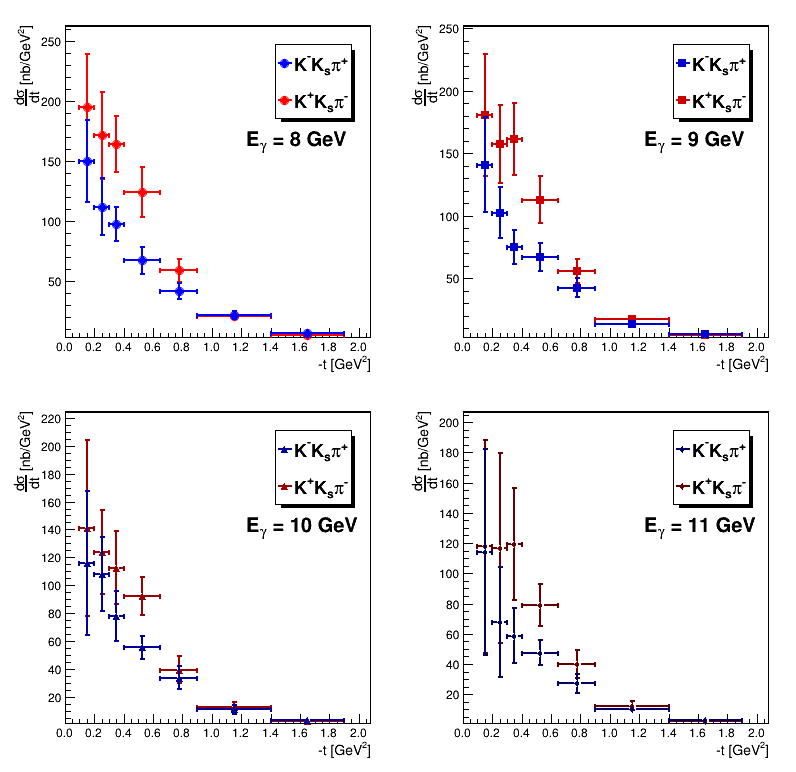

In [61]:
c.Clear()
c.Divide(2,2)

for i in range(4):
    c.cd(i+1)
    pad = c.GetPad(i+1)
    pad.SetLeftMargin(0.15)
    final_cs_graphs_pimkpks[i].Draw('AP')
    final_cs_graphs_pipkmks[i].Draw('P')

    all_four_energies_legends[i].Draw()
    cs_stat_err_latex = ROOT.TLatex()
    cs_stat_err_latex.SetTextSize(0.06)
    cs_stat_err_latex.DrawLatexNDC(0.625, 0.625, 'E_{#gamma} = ' + str(i+8) + ' GeV')
    
c.Draw()
    


## Comparison to theory

In [62]:
theory_markers = {
    8: ROOT.kFullDotLarge,
    9: ROOT.kFullDotLarge,
    10: ROOT.kOpenTriangleUp,
    11: ROOT.kOpenDiamond
}

In [63]:
theory_graphs = []

for beam in [8, 9, 10, 11]:
    theory_filename = '/work/halld/home/viducic/theory_predictions/t-slope-{}GeVnew.dat'
    theory_df = pd.read_csv(theory_filename.format(beam), delim_whitespace=True)
    theory_df.columns = ['t', 'diff_cs']
    theory_df = theory_df.loc[(theory_df['t'] > 0.35) & (theory_df['t'] < 1.9)]
    theory_graph = ROOT.TGraph(len(theory_df.t.to_numpy()), theory_df.t.to_numpy(), theory_df.diff_cs.to_numpy())
    theory_graph.SetName(f'theory_graph_{beam}')
    theory_graph.SetMarkerColor(pipkmks_colors[beam])
    theory_graph.SetLineColor(pipkmks_colors[beam])
    theory_graph.SetMarkerStyle(theory_markers[beam])
    theory_graph.SetMarkerSize(1.0)
    theory_graphs.append(theory_graph)

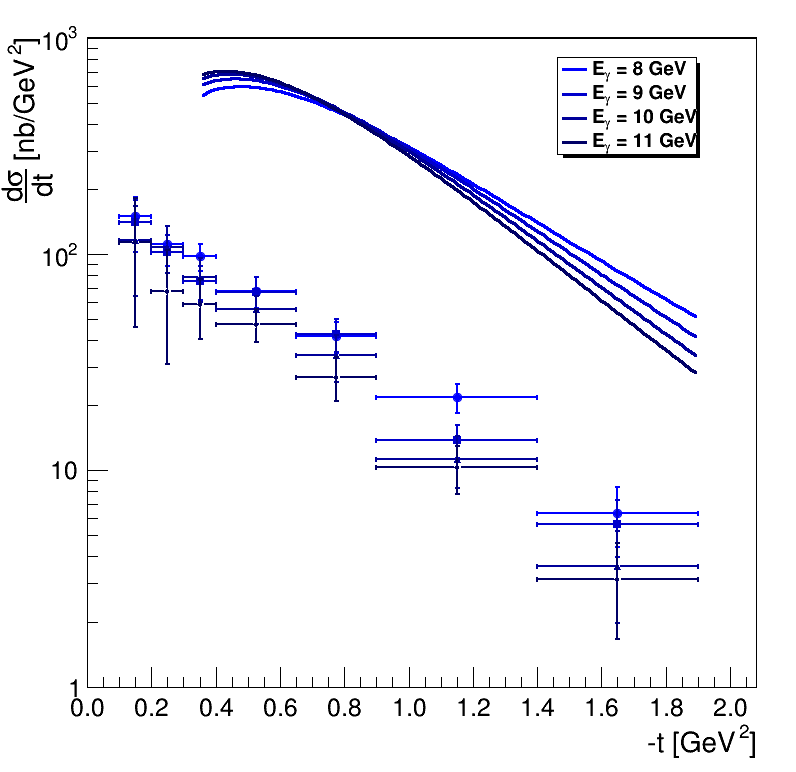

In [64]:
c.Clear()
c.SetLogy()

theory_compare_legend = ROOT.TLegend(0.7, 0.8, 0.875, 0.925)
theory_compare_legend.AddEntry(theory_graphs[0], 'E_{#gamma} = 8 GeV', 'l')
theory_compare_legend.AddEntry(theory_graphs[1], 'E_{#gamma} = 9 GeV', 'l')
theory_compare_legend.AddEntry(theory_graphs[2], 'E_{#gamma} = 10 GeV', 'l')
theory_compare_legend.AddEntry(theory_graphs[3], 'E_{#gamma} = 11 GeV', 'l')

final_cs_graphs_pipkmks[0].GetYaxis().SetRangeUser(1., 1000.)
final_cs_graphs_pipkmks[0].GetYaxis().SetTitleOffset(1.2)
final_cs_graphs_pipkmks[0].Draw('AP')
for i in range(4):
    theory_graphs[i].SetLineColor(pipkmks_colors[i+8])
    theory_graphs[i].SetLineWidth(3)
    final_cs_graphs_pipkmks[i].Draw("P")
    theory_graphs[i].Draw("L")

theory_compare_legend.Draw()
c.Draw()



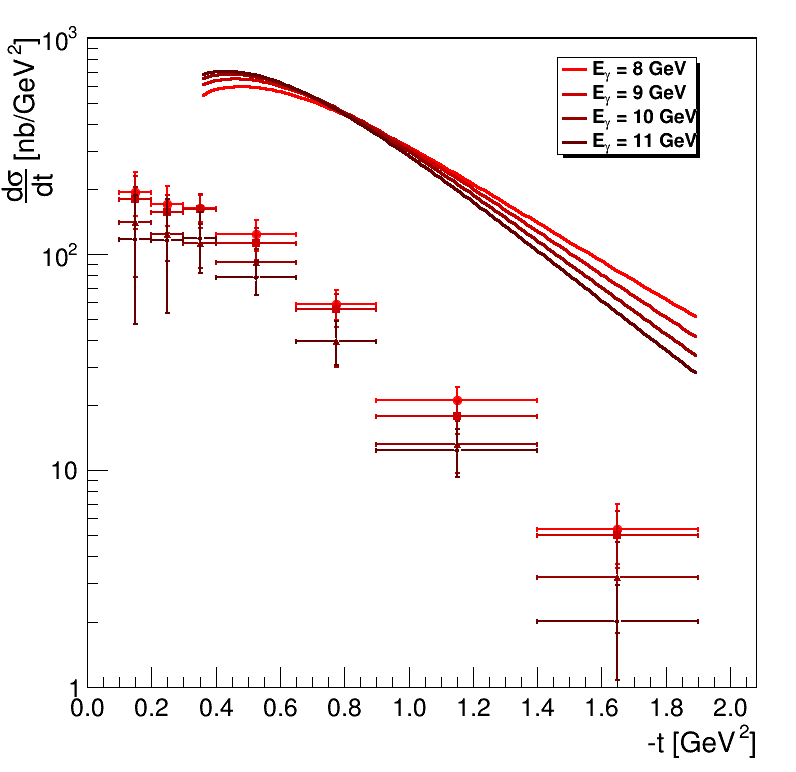

In [65]:
c.Clear()
c.SetLogy()

theory_compare_legend = ROOT.TLegend(0.7, 0.8, 0.875, 0.925)
theory_compare_legend.AddEntry(theory_graphs[0], 'E_{#gamma} = 8 GeV', 'l')
theory_compare_legend.AddEntry(theory_graphs[1], 'E_{#gamma} = 9 GeV', 'l')
theory_compare_legend.AddEntry(theory_graphs[2], 'E_{#gamma} = 10 GeV', 'l')
theory_compare_legend.AddEntry(theory_graphs[3], 'E_{#gamma} = 11 GeV', 'l')

final_cs_graphs_pimkpks[0].GetYaxis().SetRangeUser(1., 1000.)
final_cs_graphs_pimkpks[0].GetYaxis().SetTitleOffset(1.2)
final_cs_graphs_pimkpks[0].Draw('AP')
for i in range(4):
    theory_graphs[i].SetLineColor(pimkpks_colors[i+8])
    theory_graphs[i].SetLineWidth(3)
    final_cs_graphs_pimkpks[i].Draw("P")
    theory_graphs[i].Draw("L")

theory_compare_legend.Draw()
c.Draw()

## CLAS Comparison

In [66]:
clas_colors = {
    2.45: ROOT.kGreen+2,
    2.55: ROOT.kGreen+3,
    2.65: ROOT.kGreen-1,
    2.75: ROOT.kGreen-2
}

clas_markers = {
    2.45: ROOT.kOpenDiamond,
    2.55: ROOT.kOpenSquare,
    2.65: ROOT.kOpenTriangleUp,
    2.75: ROOT.kOpenCircle
}

clas_filename = '/work/halld/home/viducic/scripts/plotting/dnp_maui/clas_data.csv'
clas_df = pd.read_csv(clas_filename)
for complex_col in ["t", "dsigma_dt", "clas_error", "error_t"]:
    clas_df[complex_col] = clas_df[complex_col].apply(lambda x: x[1:-5])
for col in clas_df.columns:
    clas_df[col] = clas_df[col].astype('Float64')
# clas_df['error_t'] = clas_df['clas_error'].apply(lambda x: abs(x))
clas_df = clas_df[clas_df['t'] < 1.9]
clas_df = clas_df[clas_df['w'] >= 2.45]
clas_300 = clas_df[(clas_df['w'] == 2.55)]
clas_325 = clas_df[(clas_df['w'] == 2.65)]
clas_350 = clas_df[(clas_df['w'] == 2.75)]

clas_grouped = clas_df.groupby('w')
clas_graphs = []
for w, group in clas_grouped:
    clas_graph = ROOT.TGraphErrors(len(group.t.to_numpy()), group.t.to_numpy(), group.dsigma_dt.to_numpy(), np.zeros(len(group.t.to_numpy())), group.error_t.to_numpy())
    clas_graph.SetName(f'clas_graph_{w}')
    clas_graph.SetMarkerColor(clas_colors[w])
    clas_graph.SetMarkerStyle(clas_markers[w])
    clas_graph.SetLineColor(clas_colors[w])
    clas_graph.SetLineWidth(2)
    clas_graph.GetXaxis().SetTitle('-t [GeV^{2}]')
    clas_graph.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
    # clas_graph.GetYaxis().SetTitleSize(0.05)
    # clas_graph.GetXaxis().SetTitleSize(0.05)
    # clas_graph.GetYaxis().SetTitleOffset(0.9)
    # clas_graph.GetXaxis().SetTitleOffset(0.9)
    clas_graphs.append(clas_graph)

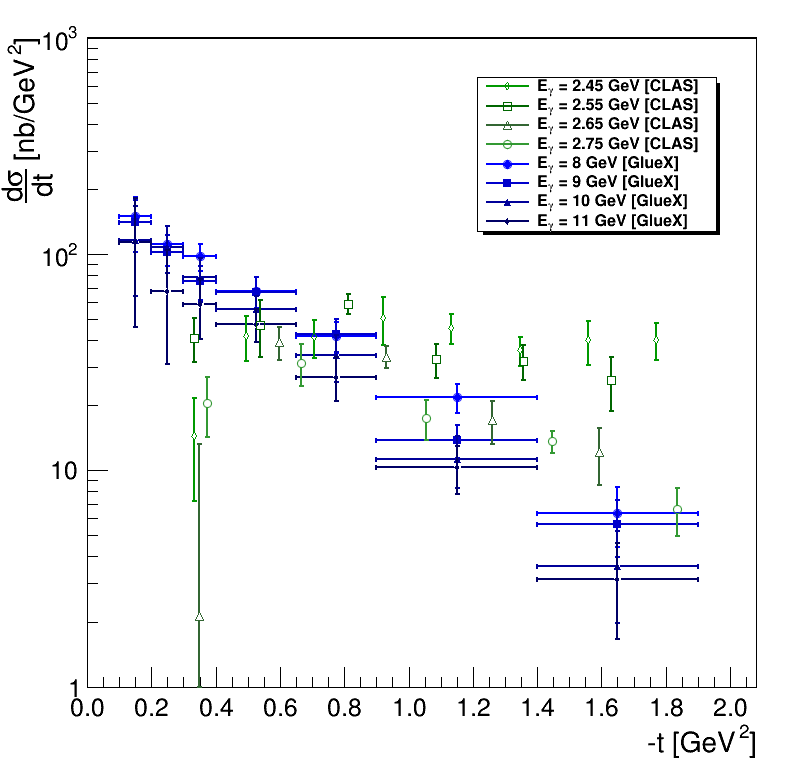

In [67]:
c.Clear()

clas_compare_legend = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
clas_compare_legend.AddEntry(clas_graphs[0], 'E_{#gamma} = 2.45 GeV [CLAS]', 'lfp')
clas_compare_legend.AddEntry(clas_graphs[1], 'E_{#gamma} = 2.55 GeV [CLAS]', 'lfp')
clas_compare_legend.AddEntry(clas_graphs[2], 'E_{#gamma} = 2.65 GeV [CLAS]', 'lfp')
clas_compare_legend.AddEntry(clas_graphs[3], 'E_{#gamma} = 2.75 GeV [CLAS]', 'lfp')
clas_compare_legend.AddEntry(final_cs_graphs_pipkmks[0], 'E_{#gamma} = 8 GeV [GlueX]', 'lfp')
clas_compare_legend.AddEntry(final_cs_graphs_pipkmks[1], 'E_{#gamma} = 9 GeV [GlueX]', 'lfp')
clas_compare_legend.AddEntry(final_cs_graphs_pipkmks[2], 'E_{#gamma} = 10 GeV [GlueX]', 'lfp')
clas_compare_legend.AddEntry(final_cs_graphs_pipkmks[3], 'E_{#gamma} = 11 GeV [GlueX]', 'lfp')

final_cs_graphs_pipkmks[0].SetTitle('CLAS/GlueX Comparison for K^{-}K_{s}#pi^{+}')
final_cs_graphs_pipkmks[0].Draw('AP')
final_cs_graphs_pipkmks[1].Draw('P')
final_cs_graphs_pipkmks[2].Draw('P')
final_cs_graphs_pipkmks[3].Draw('P')
clas_graphs[0].Draw('P')
clas_graphs[1].Draw('P')
clas_graphs[2].Draw('P')
clas_graphs[3].Draw('P')
clas_compare_legend.Draw()
c.Draw()

## CS Slopes

 FCN=0.169401 FROM MIGRAD    STATUS=CONVERGED      56 CALLS          57 TOTAL
                     EDM=8.31863e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.95532e+02   3.42581e+01   1.04944e-02  -2.04527e-06
   2  p1           2.00834e+00   3.25627e-01   9.97876e-05   1.84715e-04
 FCN=1.80431 FROM MIGRAD    STATUS=CONVERGED      43 CALLS          44 TOTAL
                     EDM=6.36866e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.29460e+02   5.91671e+01   2.82111e-02   2.14253e-05
   2  p1           2.28054e+00   3.83095e-01   1.82500e-04  -4.62114e-04
 FCN=1.12587 FROM MIGRAD    STATUS=CONVERGED      54 CALLS          55 TOTAL
                     EDM=2.9

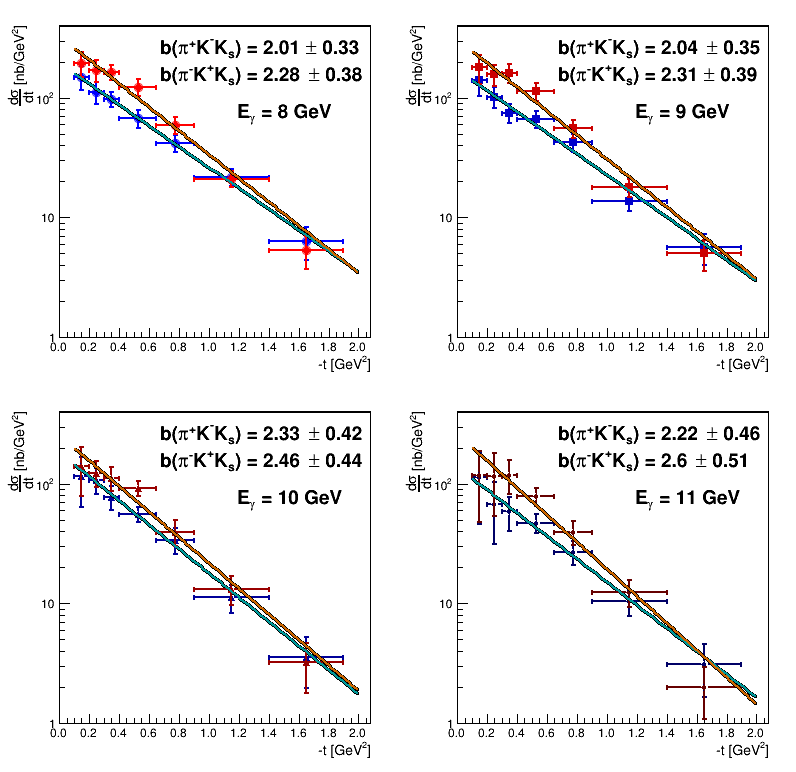

In [68]:
c.Clear()
c.Divide(2,2)

slopes = []
for i, graph in enumerate(final_cs_graphs_pipkmks):
    c.cd(i+1)
    pad = c.GetPad(i+1)
    pad.SetLogy()
    pad.SetLeftMargin(0.135)
    func_pip = ROOT.TF1('pipkmks_fit', '[0]*exp(-[1]*x)', 0.1, 2.0)
    func_pip.SetParameter(0, 400)
    func_pip.SetParameter(1, 2.0)
    func_pim = ROOT.TF1('pimkpks_fit', '[0]*exp(-[1]*x)', 0.1, 2.0)
    func_pim.SetParameter(0, 400)
    func_pim.SetParameter(1, 2.0)
    graph.Fit(func_pip, 'R')
    final_cs_graphs_pimkpks[i].Fit(func_pim, 'R')
    graph.GetYaxis().SetRangeUser(1.0, 400)
    graph.GetYaxis().SetTitleOffset(1.6)
    graph.Draw('AP')
    final_cs_graphs_pimkpks[i].Draw('P')
    func_pip.SetLineWidth(2)
    func_pip.SetLineColor(ROOT.kCyan+2)
    func_pim.SetLineWidth(2)
    func_pim.SetLineColor(ROOT.kOrange+2)
    func_pip.Draw('same')
    func_pim.Draw('same')
    # print(func.GetParameter(1))
    energy_latex = ROOT.TLatex()
    energy_latex.SetTextSize(0.055)
    energy_latex.DrawLatexNDC(0.6, 0.7, 'E_{#gamma} = ' + str(i+8) + ' GeV')
    # draw the slope for each cs on the plot
    fit_params = ROOT.TLatex()
    fit_params.SetTextSize(0.055)
    fit_params.DrawLatexNDC(0.4, 0.875, 'b(#pi^{+}K^{-}K_{s}) = ' + '{} #pm {}'.format(round(func_pip.GetParameter(1), 2), round(func_pip.GetParError(1), 2)))
    fit_params.DrawLatexNDC(0.4, 0.8, 'b(#pi^{-}K^{+}K_{s}) = ' + '{} #pm {}'.format(round(func_pim.GetParameter(1), 2), round(func_pim.GetParError(1), 2)))
    slopes.append(((func_pip.GetParameter(1), func_pip.GetParError(1)), ((func_pim.GetParameter(1), func_pim.GetParError(1)))))
    c.Update()
c.Draw()

## Slopes vs $\phi$

In [69]:
e_phi = [i/100 for i in range(165, 360, 10)]
e_phi = e_phi[9:]
b_phi = [3.1636, 3.1036, 2.8647, 3.8019, 3.5221, 3.1348, 2.8456, 2.2987, 2.2048, 2.6593, 3.0617, 3.1467, 3.4009, 3.2025, 3.8577, 3.1332, 3.1422, 3.2923, 3.3680, 2.8285 ]
b_phi = b_phi[9:]
err_phi = [(0.3334, 0.1249), (0.3358, 0.1742), (0.1548, 0.3436), (0.0964,0.2544), (0.1557, 0.4297), (0.0866, 0.2139), (0.1232, 0.1924), (0.1429, 0.2173), (0.0659, 0.1144), (0.1549, 0.1585), (0.3422, 0.1524), (0.2874, 0.1416), (0.2001, 0.1412), (0.2366, 0.1498), (0.3594, 0.1835), (0.2685, 0.1820), (0.3412, 0.1903), (0.5067, 0.4077), (0.4705, 0.3440), (0.3924, 0.4753)]
err_phi = err_phi[9:]
phi_dict = {
            'energy': e_phi,
            'b': b_phi,
            'stat_err': [err[0] for err in err_phi],
            'sys_err': [err[1] for err in err_phi],
            'total_err': [np.sqrt(err[0]**2 + err[1]**2) for err in err_phi]
            }
phi_graph = ROOT.TGraphErrors(len(e_phi), np.array(e_phi), np.array(b_phi), np.zeros(len(e_phi)), np.array(phi_dict['total_err']))


In [70]:
phi_graph.SetMarkerStyle(ROOT.kOpenCircle)
phi_graph.SetMarkerColor(ROOT.kBlack)

phi_func = ROOT.TF1('phi_func', '[0]', 2.5, 3.6)
phi_func.SetParameter(0, 3.0)
phi_func.SetLineStyle(2)
phi_graph.Fit(phi_func, 'RNS')


 FCN=9.55709 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=4.01168e-21    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.13417e+00   1.01645e-01   1.61260e-04  -8.81239e-10


In [71]:
graph_bs_pipkmks = ROOT.TGraphErrors(len(slopes), np.array([float(i+8) for i in range(4)]), np.array([slope[0][0] for slope in slopes]), np.zeros(4), np.array([slope[0][1] for slope in slopes]))
graph_bs_pimkpks = ROOT.TGraphErrors(len(slopes), np.array([float(i+8) for i in range(4)]), np.array([slope[1][0] for slope in slopes]), np.zeros(4), np.array([slope[1][1] for slope in slopes]))

graph_bs_pipkmks.SetMarkerStyle(ROOT.kFullCircle)
graph_bs_pipkmks.SetMarkerColor(ROOT.kBlue)
graph_bs_pimkpks.SetMarkerStyle(ROOT.kFullCircle)
graph_bs_pimkpks.SetMarkerColor(ROOT.kRed)

func_bs_pipkmks = ROOT.TF1('bs_fit_pip', '[0]', 7.5, 11.5)
func_bs_pipkmks.SetParameter(0, 2.1)
func_bs_pipkmks.SetLineColor(ROOT.kBlue)
func_bs_pipkmks.SetLineStyle(2)

func_bs_pimkpks = ROOT.TF1('bs_fit_pim', '[0]', 7.5, 11.5)
func_bs_pimkpks.SetParameter(0, 2.4)
func_bs_pimkpks.SetLineColor(ROOT.kRed)
func_bs_pimkpks.SetLineStyle(2)

graph_bs_pipkmks.Fit(func_bs_pipkmks, 'RN')
graph_bs_pimkpks.Fit(func_bs_pimkpks, 'RN')

graph_bs_pipkmks.SetLineColor(ROOT.kBlue)
graph_bs_pimkpks.SetLineColor(ROOT.kRed)


 FCN=0.465423 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=1.10247e-25    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.11679e+00   1.88812e-01   1.11604e-04   2.48697e-12
 FCN=0.321986 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=2.74971e-25    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.38627e+00   2.12222e-01   1.19145e-04   3.49436e-12


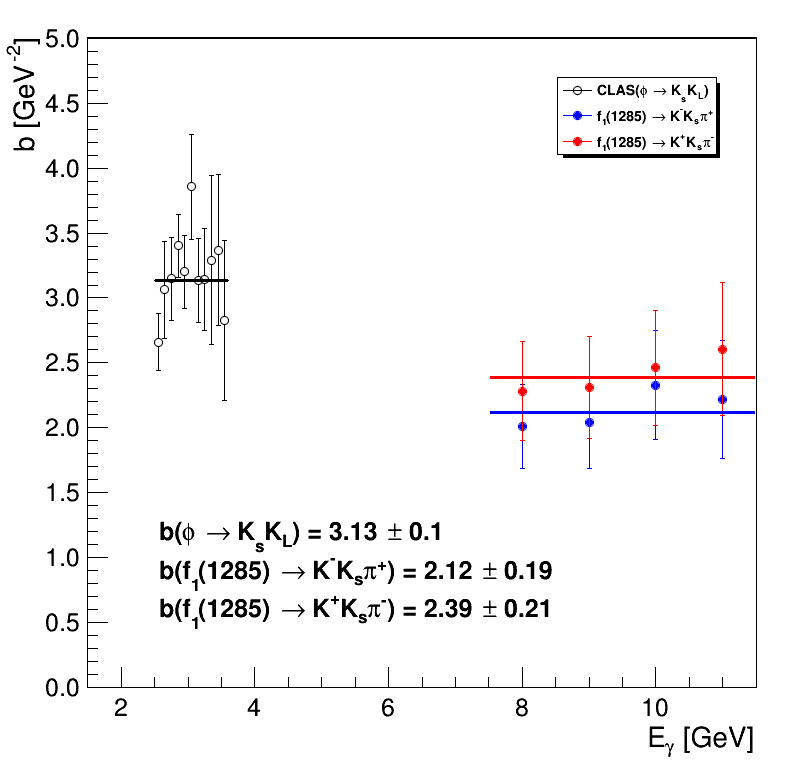

In [72]:
c.Clear()
c.SetLogy(0)

phi_graph.GetXaxis().SetLimits(1.5, 11.5)
phi_graph.GetYaxis().SetLimits(0.0, 5.0)
phi_graph.GetYaxis().SetTitle('b [GeV^{-2}]')
phi_graph.GetXaxis().SetTitle('E_{#gamma} [GeV]')

phi_hist_axis = ROOT.TH1I("pRangeUsers", "", 1000, 0., 11.5)
phi_hist_axis.GetXaxis().SetRangeUser(1.5, 11.5)
phi_hist_axis.GetYaxis().SetRangeUser(0.0, 5.0)
phi_hist_axis.GetYaxis().SetTitle('b [GeV^{-2}]')
phi_hist_axis.GetXaxis().SetTitle('E_{#gamma} [GeV]')
phi_hist_axis.SetLineColor(0)
func_bs_pipkmks.SetLineStyle(2)


b_legend = ROOT.TLegend(0.7, 0.8, 0.9, 0.9)
b_legend.AddEntry(phi_graph, 'CLAS(#phi #rightarrow K_{s}K_{L})', 'lp')
b_legend.AddEntry(graph_bs_pipkmks, 'f_{1}(1285) #rightarrow K^{-}K_{s}#pi^{+}', 'lp')
b_legend.AddEntry(graph_bs_pimkpks, 'f_{1}(1285) #rightarrow K^{+}K_{s}#pi^{-}', 'lp')

phi_hist_axis.Draw()
phi_graph.Draw('SAME P')
graph_bs_pipkmks.Draw('SAME P')
graph_bs_pimkpks.Draw('SAME P')
func_bs_pipkmks.Draw('SAME')
func_bs_pimkpks.Draw('SAME')
phi_func.Draw("SAME")
b_legend.Draw()

slope_latex = ROOT.TLatex()
slope_latex.SetTextSize(0.035)
slope_latex.DrawLatexNDC(0.2, 0.3, 'b(#phi #rightarrow K_{s}K_{L}) = ' + '{} #pm {}'.format(round(phi_func.GetParameter(0), 2), round(phi_func.GetParError(0), 2)))
slope_latex.DrawLatexNDC(0.2, 0.25, 'b(f_{1}(1285) #rightarrow K^{-}K_{s}#pi^{+}) = ' + '{} #pm {}'.format(round(func_bs_pipkmks.GetParameter(0), 2), round(func_bs_pipkmks.GetParError(0), 2)))
slope_latex.DrawLatexNDC(0.2, 0.2, 'b(f_{1}(1285) #rightarrow K^{+}K_{s}#pi^{-}) = ' + '{} #pm {}'.format(round(func_bs_pimkpks.GetParameter(0), 2), round(func_bs_pimkpks.GetParError(0), 2)))

                         

c.Draw()


## Acceptance Comparison

In [73]:
acceptance_arrays = []
acc_rows = {
    'e': [],
    't': [],
    'ratio': []
}
for e in range(8, 12):
    t_middle = []
    acceptance_pip = []
    acceptance_pim = []
    for t in range(1, 8):
        acceptance_pip.append(tools.get_binned_gluex1_signal_acceptance('pipkmks', e, t, error=False))
        acceptance_pim.append(tools.get_binned_gluex1_signal_acceptance('pimkpks', e, t, error=False))
        t_middle.append(constants.T_CUT_DICT[t][0] + constants.T_WIDTH_DICT[t] / 2)
        acc_rows['e'].append(e)
        acc_rows['t'].append(constants.T_CUT_DICT[t][0] + constants.T_WIDTH_DICT[t] / 2)
        acc_rows['ratio'].append(acceptance_pip[-1]/acceptance_pim[-1])
    acceptance_arrays.append((np.array(t_middle), np.array(acceptance_pip), np.array(acceptance_pim)))

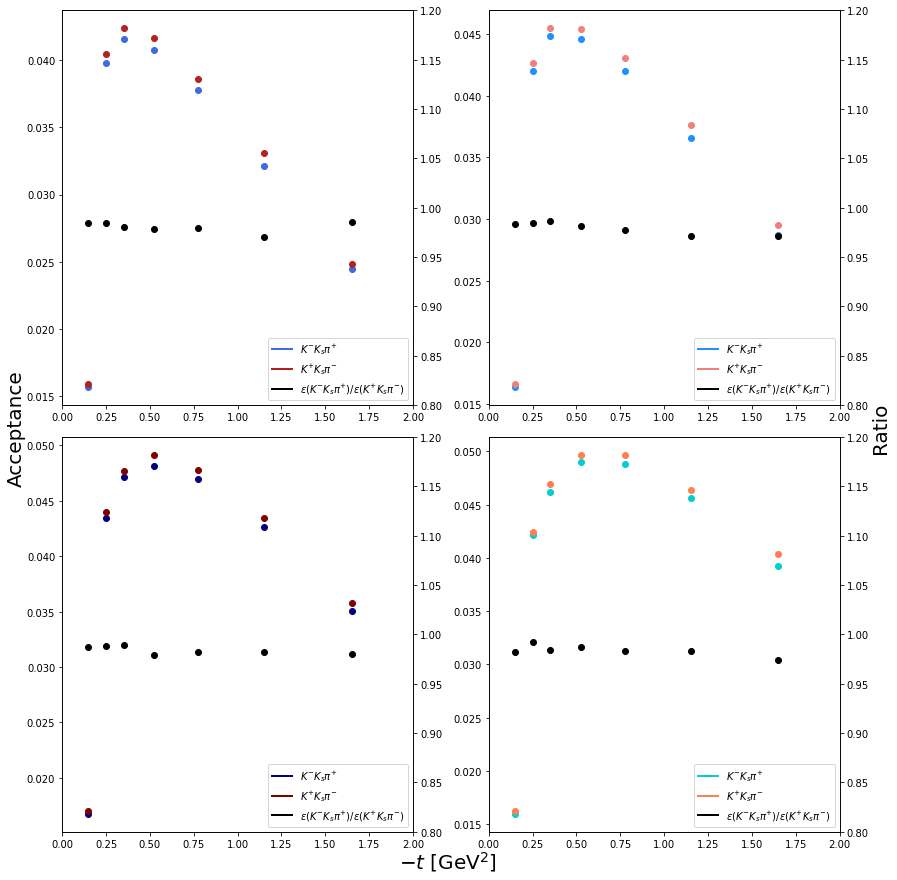

In [74]:
from matplotlib.lines import Line2D


energy_colors = {
    8: ('royalblue', 'firebrick'),
    9: ('dodgerblue', 'lightcoral'),
    10: ('navy', 'maroon'),
    11: ('darkturquoise', 'coral')
}

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.set_facecolor('white')
fig.text(0.5, -0.01, '$-t$ [GeV$^2$]', fontsize=20, ha='center')
fig.text(-0.01, 0.5, 'Acceptance', va='center', fontsize=20, rotation='vertical')
fig.text(0.99, 0.5, 'Ratio', va='center', fontsize=20, rotation='vertical')
fig.set_tight_layout(True)
fig.set_facecolor('white')
for i, (ax, (t, acc_pip, acc_pim)) in enumerate(zip(axs.flatten(), acceptance_arrays)):
    e = i+8
    ax.scatter(t, acc_pip, marker='o', c=energy_colors[e][0], label='$K^{-}K_{s}\pi^{+}$')
    ax.scatter(t, acc_pim, marker='o', c=energy_colors[e][1], label='$K^{+}K_{s}\pi^{-}$')
    ax.set_xlim(0.0, 2.0)
    # ax.set_ylim(0.005, 0.0375)
    # ax.legend()

    ax2 = ax.twinx()
    ax2.set_ylim(0.8,1.2)
    ax2.scatter(t, acc_pip/acc_pim, c='black', label='$\epsilon(K^{-}K_{s}\pi^{+})/\epsilon(K^{+}K_{s}\pi^{-})$')
    # ax2.legend()

    # make and draw the combined legend
    lines = [Line2D([0], [0], color=energy_colors[e][0], lw=2),
             Line2D([0], [0], color=energy_colors[e][1], lw=2),
             Line2D([0], [0], color='black', lw=2)]

    labels = ['$K^{-}K_{s}\pi^{+}$', '$K^{+}K_{s}\pi^{-}$', '$\epsilon(K^{-}K_{s}\pi^{+})/\epsilon(K^{+}K_{s}\pi^{-})$']
    ax.legend(lines, labels, loc='lower right')

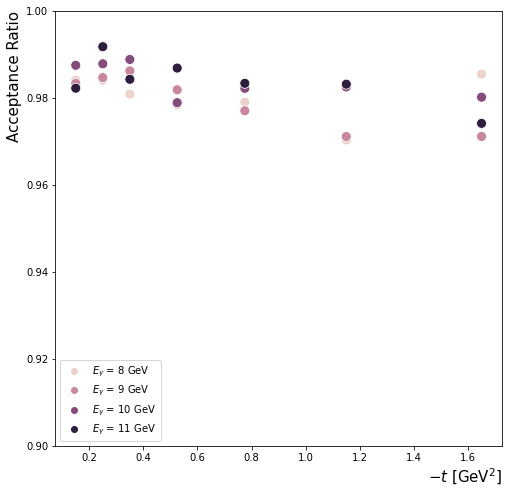

In [75]:
import seaborn as sns
acc_rat_df = pd.DataFrame(acc_rows)

fig, ax = plt.subplots(figsize=(8, 8))
fig.set_facecolor('white')
sns.scatterplot(x='t', y='ratio', data=acc_rat_df, hue='e', ax=ax, s=100)
ax.set_xlabel('$-t$ [GeV$^2$]', fontsize=15,loc='right')
ax.set_ylabel('Acceptance Ratio', fontsize=15, loc='top')
ax.set_ylim(0.9, 1.0)
handles, labels = ax.get_legend_handles_labels()
labels = ['$E_\gamma$ = 8 GeV', '$E_\gamma$ = 9 GeV', '$E_\gamma$ = 10 GeV', '$E_\gamma$ = 11 GeV']
ax.legend(handles, labels, title="")

## Acceptance Table

In [76]:
acc_table = '\\begin{table} \n \
\centering \n \
\\begin{tabular}{| c | c | c | c |} \n \
\hline						\n \
\\boldmath$E_\gamma ~[\\textbf{GeV}]$ & \\boldmath$-t ~[\\textbf{GeV}^2]$ & \\boldmath$\epsilon ~(K^-K_s\pi^+)$ & \\boldmath$\epsilon ~(K^+K_s\pi^-)$ \\\ \hline \n'
for i, (t, acc_pip, acc_pim) in enumerate(acceptance_arrays):
    for j in range(len(t)):
        acc_table+= f'{i+8} & {t[j]:.2f} & {acc_pip[j]:.4f} & {acc_pim[j]:.4f} \\\ \hline \n'
acc_table+='\end{tabular} \n\
 \caption{Detector efficiency from signal Monte Carlo for both $\pi^+K^-K_s$ and $\pi^-K^+K_s$ decay modes for all bins of $E_\gamma$ adn $-t$}\label{table:acceptances} \n\
 \end{table}'
print(acc_table)

\begin{table} 
 \centering 
 \begin{tabular}{| c | c | c | c |} 
 \hline						
 \boldmath$E_\gamma ~[\textbf{GeV}]$ & \boldmath$-t ~[\textbf{GeV}^2]$ & \boldmath$\epsilon ~(K^-K_s\pi^+)$ & \boldmath$\epsilon ~(K^+K_s\pi^-)$ \\ \hline 
8 & 0.15 & 0.0157 & 0.0159 \\ \hline 
8 & 0.25 & 0.0398 & 0.0404 \\ \hline 
8 & 0.35 & 0.0416 & 0.0424 \\ \hline 
8 & 0.53 & 0.0408 & 0.0417 \\ \hline 
8 & 0.78 & 0.0378 & 0.0386 \\ \hline 
8 & 1.15 & 0.0321 & 0.0331 \\ \hline 
8 & 1.65 & 0.0245 & 0.0248 \\ \hline 
9 & 0.15 & 0.0164 & 0.0166 \\ \hline 
9 & 0.25 & 0.0420 & 0.0427 \\ \hline 
9 & 0.35 & 0.0449 & 0.0455 \\ \hline 
9 & 0.53 & 0.0446 & 0.0454 \\ \hline 
9 & 0.78 & 0.0421 & 0.0430 \\ \hline 
9 & 1.15 & 0.0366 & 0.0377 \\ \hline 
9 & 1.65 & 0.0287 & 0.0295 \\ \hline 
10 & 0.15 & 0.0167 & 0.0170 \\ \hline 
10 & 0.25 & 0.0435 & 0.0440 \\ \hline 
10 & 0.35 & 0.0472 & 0.0477 \\ \hline 
10 & 0.53 & 0.0481 & 0.0492 \\ \hline 
10 & 0.78 & 0.0470 & 0.0478 \\ \hline 
10 & 1.15 & 0.0427 & 0.0434 \\ \hline 

## Asymmetry Sources

## Count Ratio

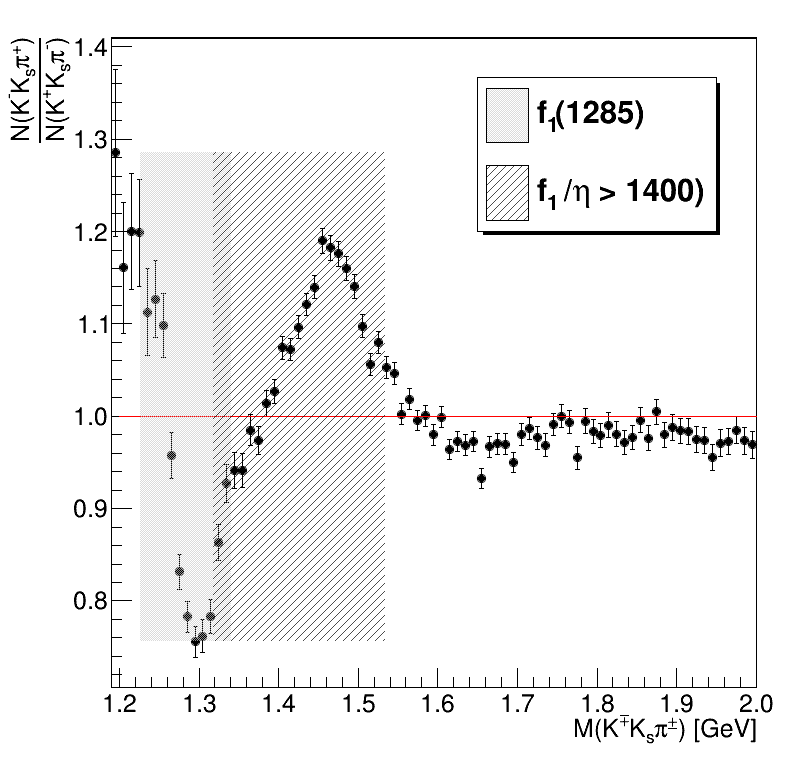

In [77]:
c.Clear()
c.SetLogy(0)
pad = c.cd()
pad.SetLeftMargin(0.14)
asymmetry_hists_file = ROOT.TFile.Open('/work/halld/home/viducic/charge_asymmetry_study/asym_hists.root')

hist_pipkmks_no_cut = asymmetry_hists_file.Get('pipkmks_no_cut')
hist_pimkpks_no_cut = asymmetry_hists_file.Get('pimkpks_no_cut')

hist_pipkmks_no_cut.Sumw2()
hist_pimkpks_no_cut.Sumw2()

pipkmks_pimkpks_ratio = hist_pipkmks_no_cut.Clone('pipkmks_pimkpks_ratio')
pipkmks_pimkpks_ratio.Divide(hist_pimkpks_no_cut)
pipkmks_pimkpks_ratio.GetXaxis().SetRangeUser(1.2, 2.0)
pipkmks_pimkpks_ratio.GetXaxis().SetTitle('M(K^{#mp}K_{s}#pi^{#pm}) [GeV]')
pipkmks_pimkpks_ratio.GetYaxis().SetTitle('#frac{N(K^{-}K_{s}#pi^{+})}{N(K^{+}K_{s}#pi^{-})}')
pipkmks_pimkpks_ratio.GetYaxis().SetTitleOffset(1.6)
pipkmks_pimkpks_ratio.SetLineColor(ROOT.kBlack)
pipkmks_pimkpks_ratio.SetMarkerStyle(20)

unity_line = ROOT.TLine(1.2, 1, 2.0, 1)
unity_line.SetLineColor(ROOT.kRed)

region_1280 = ROOT.TBox(constants.F1_PIMKPKS_VOIGHT_MEAN - 2 * constants.F1_PIPKMKS_VOIGHT_WIDTH, pipkmks_pimkpks_ratio.GetMinimum(), constants.F1_PIMKPKS_VOIGHT_MEAN + 2 * constants.F1_PIMKPKS_VOIGHT_WIDTH, pipkmks_pimkpks_ratio.GetMaximum())
region_1240 = ROOT.TBox(1.414 - 0.096, pipkmks_pimkpks_ratio.GetMinimum(), 1.426 + 0.108, pipkmks_pimkpks_ratio.GetMaximum())

region_1280.SetFillColorAlpha(ROOT.kGray, 0.7)
region_1240.SetFillColorAlpha(ROOT.kBlack, 0.7)
region_1280.SetFillStyle(3001)
region_1240.SetFillStyle(3004)

legend = ROOT.TLegend(0.6, 0.7, 0.9, 0.9)
legend.AddEntry(region_1280, 'f_{1}(1285)', 'f')
legend.AddEntry(region_1240, 'f_{1} /#eta > 1400)', 'f')

pipkmks_pimkpks_ratio.Draw("E1")
unity_line.Draw()
region_1280.Draw()
region_1240.Draw()
legend.Draw()
c.Draw()

# asymmetry_hists_file.Close()

## t-binned $M(pK^\mp)$

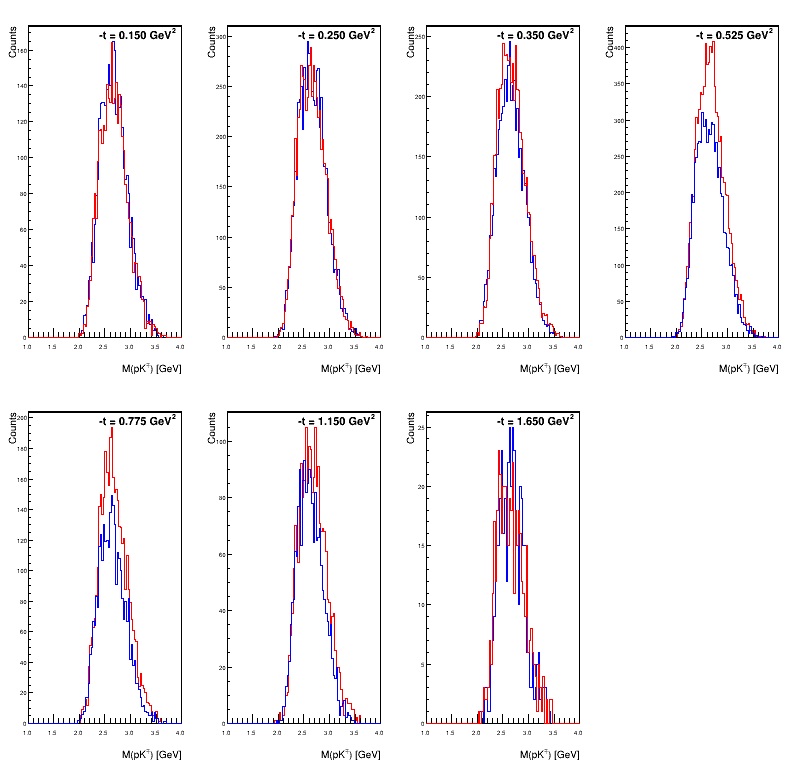

In [78]:
c.Clear()
c.Divide(4, 2)

asymmetry_hists_file.Close()
asymmetry_hists_file = ROOT.TFile.Open('/work/halld/home/viducic/charge_asymmetry_study/asym_hists.root')


hists_kp = []
for t in range(1, 8):
    pad = c.cd(t)
    # pad.SetBottomMargin(0.11)
    # pad.SetTopMargin(0.11)
    
    kp_pipkmks = asymmetry_hists_file.Get(f'pkm_f1_t{t}')
    kp_pimkpks = asymmetry_hists_file.Get(f'pkp_f1_t{t}')

    kp_pipkmks.Rebin(2)
    kp_pimkpks.Rebin(2)

    kp_pipkmks.SetLineColor(ROOT.kBlue)
    kp_pimkpks.SetLineColor(ROOT.kRed)
    kp_pimkpks.GetXaxis().SetTitle("M(pK^{#mp}) [GeV]")
    kp_pipkmks.GetXaxis().SetTitle("M(pK^{#mp}) [GeV]")
    kp_pimkpks.GetXaxis().SetTitleSize(0.06)
    kp_pipkmks.GetXaxis().SetTitleSize(0.06)
    kp_pimkpks.GetXaxis().SetTitleOffset(0.9)
    kp_pipkmks.GetXaxis().SetTitleOffset(0.9)

    kp_pimkpks.GetYaxis().SetTitle("Counts")
    kp_pipkmks.GetYaxis().SetTitle("Counts")
    kp_pimkpks.GetYaxis().SetTitleSize(0.06)
    kp_pipkmks.GetYaxis().SetTitleSize(0.06)
    kp_pimkpks.GetYaxis().SetTitleOffset(0.9)
    kp_pipkmks.GetYaxis().SetTitleOffset(0.9)

    hists_kp.append((kp_pipkmks, kp_pimkpks))

    sorted_hists = tools.sort_hists_by_max(list(hists_kp[t-1]))
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    
    t_label = ROOT.TLatex()
    t_label.SetTextSize(0.065)
    t_label.DrawLatexNDC(0.5, 0.915, f'-t = {constants.T_CUT_DICT[t][0] + constants.T_WIDTH_DICT[t]/2:0.3f} GeV' + '^{2}')

    c.Update()

c.Draw()

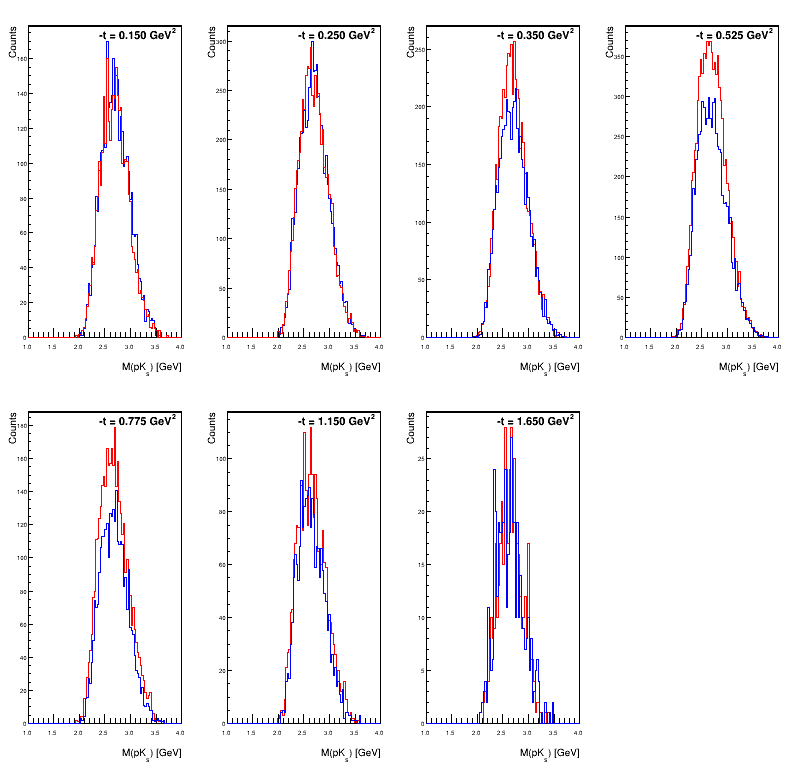

In [79]:
c.Clear()
c.Divide(4, 2)

asymmetry_hists_file.Close()
asymmetry_hists_file = ROOT.TFile.Open('/work/halld/home/viducic/charge_asymmetry_study/asym_hists.root')


hists_pks = []
for t in range(1, 8):
    pad = c.cd(t)
    # pad.SetBottomMargin(0.11)
    # pad.SetTopMargin(0.11)
    
    pks_pipkmks = asymmetry_hists_file.Get(f'pks_pipkmks_f1_{t}')
    pks_pimpksks = asymmetry_hists_file.Get(f'pks_pimkpks_f1_{t}')

    pks_pipkmks.Rebin(2)
    pks_pimpksks.Rebin(2)

    pks_pipkmks.SetLineColor(ROOT.kBlue)
    pks_pimpksks.SetLineColor(ROOT.kRed)
    pks_pimpksks.GetXaxis().SetTitle("M(pK_{s}) [GeV]")
    pks_pipkmks.GetXaxis().SetTitle("M(pK_{s}) [GeV]")
    pks_pimpksks.GetXaxis().SetTitleSize(0.06)
    pks_pipkmks.GetXaxis().SetTitleSize(0.06)
    pks_pimpksks.GetXaxis().SetTitleOffset(0.9)
    pks_pipkmks.GetXaxis().SetTitleOffset(0.9)

    pks_pimpksks.GetYaxis().SetTitle("Counts")
    pks_pipkmks.GetYaxis().SetTitle("Counts")
    pks_pimpksks.GetYaxis().SetTitleSize(0.06)
    pks_pipkmks.GetYaxis().SetTitleSize(0.06)
    pks_pimpksks.GetYaxis().SetTitleOffset(0.9)
    pks_pipkmks.GetYaxis().SetTitleOffset(0.9)

    hists_pks.append((pks_pipkmks, pks_pimpksks))

    sorted_hists = tools.sort_hists_by_max(list(hists_pks[t-1]))
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    
    t_label = ROOT.TLatex()
    t_label.SetTextSize(0.065)
    t_label.DrawLatexNDC(0.5, 0.915, f'-t = {constants.T_CUT_DICT[t][0] + constants.T_WIDTH_DICT[t]/2:0.3f} GeV' + '^{2}')

    c.Update()

c.Draw()

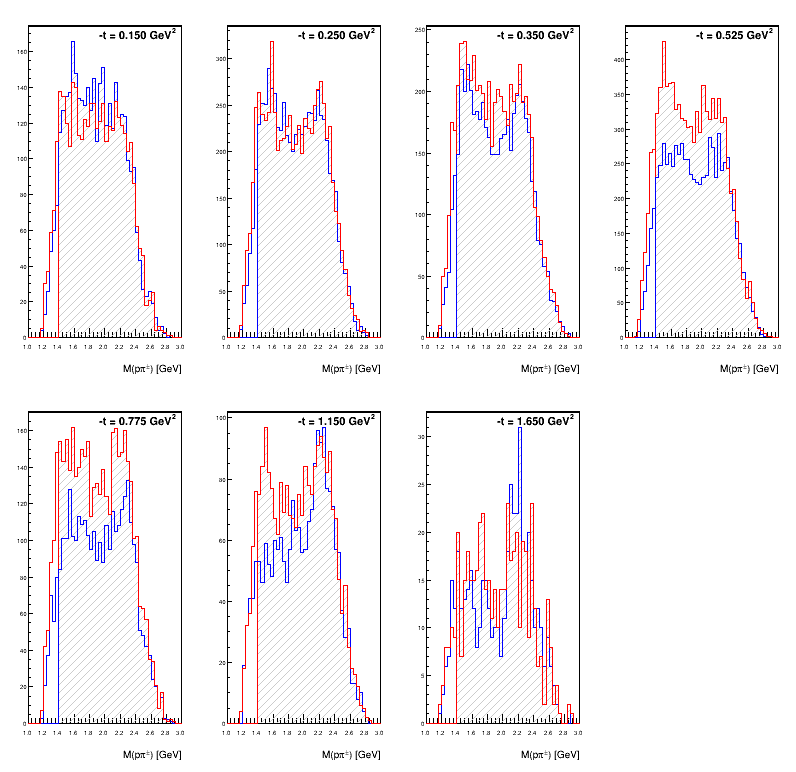

In [80]:
c.Clear()
c.Divide(4, 2)

asymmetry_hists_file.Close()
asymmetry_hists_file = ROOT.TFile.Open('/work/halld/home/viducic/charge_asymmetry_study/asym_hists.root')


hists_ppi = []
hists_ppi_shaded = []
for t in range(1, 8):
    pad = c.cd(t)
    # pad.SetBottomMargin(0.11)
    # pad.SetTopMargin(0.11)
    
    ppip = asymmetry_hists_file.Get(f'ppip_{t}_f1')
    ppip_shaded = asymmetry_hists_file.Get(f'ppip_{t}_f1_shaded')
    ppim = asymmetry_hists_file.Get(f'ppim_{t}_f1')
    ppim_shaded = asymmetry_hists_file.Get(f'ppim_{t}_f1_shaded')

    ppip.Rebin(2)
    ppip_shaded.Rebin(2)
    ppim.Rebin(2)
    ppim_shaded.Rebin(2)

    ppip.SetLineColor(ROOT.kBlue)
    ppip_shaded.SetLineColor(ROOT.kBlue)
    ppim.SetLineColor(ROOT.kRed)
    ppim_shaded.SetLineColor(ROOT.kRed)
    ppim_shaded.GetXaxis().SetTitle("M(p#pi^{#pm}) [GeV]")
    ppip_shaded.GetXaxis().SetTitle("M(p#pi^{#pm}) [GeV]")
    ppim_shaded.GetXaxis().SetTitleSize(0.06)
    ppip_shaded.GetXaxis().SetTitleSize(0.06)
    ppim_shaded.GetXaxis().SetTitleOffset(0.9)
    ppip_shaded.GetXaxis().SetTitleOffset(0.9)

    ppip_shaded.SetFillColor(ROOT.kGray)
    ppip_shaded.SetFillStyle(3004)
    ppim_shaded.SetFillColor(ROOT.kGray)
    ppim_shaded.SetFillStyle(3004)



    ppim.GetYaxis().SetTitle("Counts")
    ppip.GetYaxis().SetTitle("Counts")
    ppim.GetYaxis().SetTitleSize(0.06)
    ppip.GetYaxis().SetTitleSize(0.06)
    ppim.GetYaxis().SetTitleOffset(0.9)
    ppip.GetYaxis().SetTitleOffset(0.9)

    hists_ppi.append((ppip, ppim))
    hists_ppi_shaded.append((ppip_shaded, ppim_shaded))

    sorted_hists = tools.sort_hists_by_max(list(hists_ppi_shaded[t-1]))
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    hists_ppi[t-1][0].Draw('same')
    hists_ppi[t-1][1].Draw('same')
    
    t_label = ROOT.TLatex()
    t_label.SetTextSize(0.065)
    t_label.DrawLatexNDC(0.5, 0.915, f'-t = {constants.T_CUT_DICT[t][0] + constants.T_WIDTH_DICT[t]/2:0.3f} GeV' + '^{2}')

    c.Update()

c.Draw()

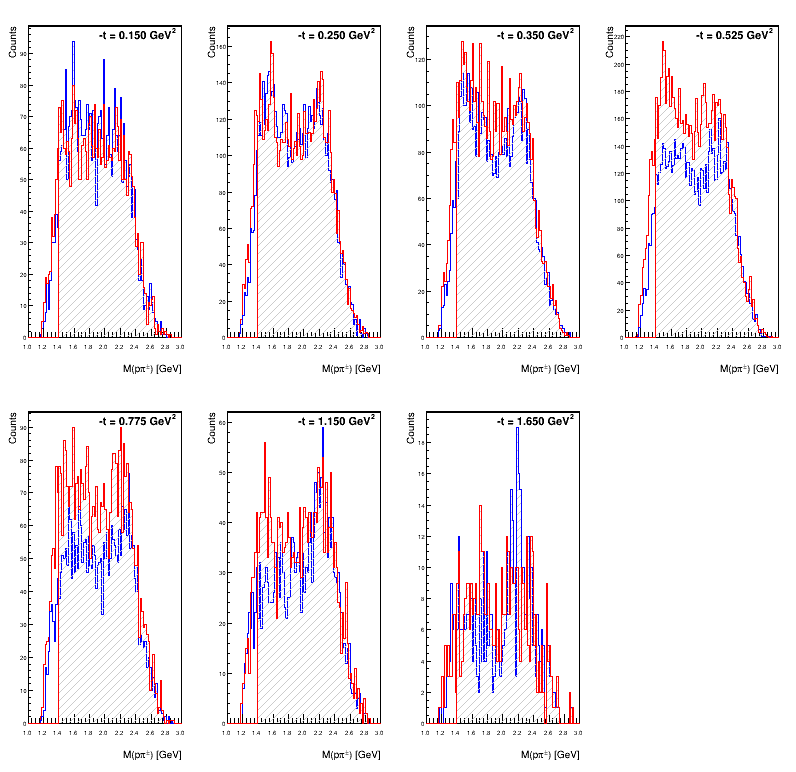

In [81]:
c.Clear()
c.Divide(4, 2)

asymmetry_hists_file.Close()
asymmetry_hists_file = ROOT.TFile.Open('/work/halld/home/viducic/charge_asymmetry_study/asym_hists.root')


hists_ppi = []
hists_ppi_shaded = []
for t in range(1, 8):
    pad = c.cd(t)
    # pad.SetBottomMargin(0.11)
    # pad.SetTopMargin(0.11)
    
    ppip = asymmetry_hists_file.Get(f'ppip_{t}')
    ppip_shaded = asymmetry_hists_file.Get(f'ppip_{t}_shaded')
    ppim = asymmetry_hists_file.Get(f'ppim_{t}')
    ppim_shaded = asymmetry_hists_file.Get(f'ppim_{t}_shaded')

    # ppip.Rebin(2)
    # ppip_shaded.Rebin(2)
    # ppim.Rebin(2)
    # ppim_shaded.Rebin(2)

    ppip.SetLineColor(ROOT.kBlue)
    ppip_shaded.SetLineColor(ROOT.kBlue)
    ppim.SetLineColor(ROOT.kRed)
    ppim_shaded.SetLineColor(ROOT.kRed)
    ppim.GetXaxis().SetTitle("M(p#pi^{#pm}) [GeV]")
    ppip.GetXaxis().SetTitle("M(p#pi^{#pm}) [GeV]")
    ppim.GetXaxis().SetTitleSize(0.06)
    ppip.GetXaxis().SetTitleSize(0.06)
    ppim.GetXaxis().SetTitleOffset(0.9)
    ppip.GetXaxis().SetTitleOffset(0.9)

    ppip_shaded.SetFillColor(ROOT.kGray)
    ppip_shaded.SetFillStyle(3004)
    ppim_shaded.SetFillColor(ROOT.kGray)
    ppim_shaded.SetFillStyle(3004)



    ppim.GetYaxis().SetTitle("Counts")
    ppip.GetYaxis().SetTitle("Counts")
    ppim.GetYaxis().SetTitleSize(0.06)
    ppip.GetYaxis().SetTitleSize(0.06)
    ppim.GetYaxis().SetTitleOffset(0.9)
    ppip.GetYaxis().SetTitleOffset(0.9)

    hists_ppi.append((ppip, ppim))
    hists_ppi_shaded.append((ppip_shaded, ppim_shaded))

    sorted_hists = tools.sort_hists_by_max(list(hists_ppi[t-1]))
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('same')
    hists_ppi_shaded[t-1][0].Draw('same')
    hists_ppi_shaded[t-1][1].Draw('same')
    
    t_label = ROOT.TLatex()
    t_label.SetTextSize(0.065)
    t_label.DrawLatexNDC(0.5, 0.915, f'-t = {constants.T_CUT_DICT[t][0] + constants.T_WIDTH_DICT[t]/2:0.3f} GeV' + '^{2}')

    c.Update()

c.Draw()

## Pion/Kaon $\theta$ Distributions 

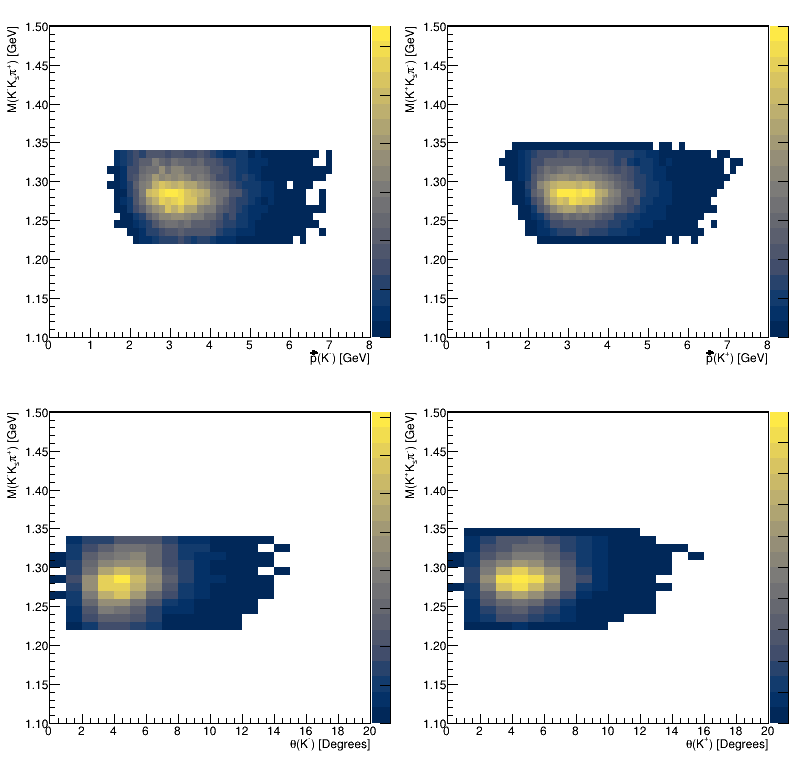

In [82]:
c.Clear()
c.Divide(2, 2)

asymmetry_hists_file.Close()
asymmetry_hists_file = ROOT.TFile.Open('/work/halld/home/viducic/charge_asymmetry_study/asym_hists.root')

hist_theta_km = asymmetry_hists_file.Get('km_theta_vs_pipkmks')
hist_theta_kp = asymmetry_hists_file.Get('kp_theta_vs_pimkpks')
hist_p_km = asymmetry_hists_file.Get('km_p_vs_pipkmks')
hist_p_kp = asymmetry_hists_file.Get('kp_p_vs_pimkpks')

hist_theta_km.GetXaxis().SetTitle('#theta(K^{-}) [Degrees]')
hist_p_km.GetXaxis().SetTitle('#vec{p}(K^{-}) [GeV]')
hist_theta_kp.GetXaxis().SetTitle('#theta(K^{+}) [Degrees]')
hist_p_kp.GetXaxis().SetTitle('#vec{p}(K^{+}) [GeV]')


hist_theta_km.GetYaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
hist_p_km.GetYaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
hist_theta_kp.GetYaxis().SetTitle('M(K^{+}K_{s}#pi^{-}) [GeV]')
hist_p_kp.GetYaxis().SetTitle('M(K^{+}K_{s}#pi^{-}) [GeV]')


particle_label = ROOT.TLatex()
particle_label.SetTextSize(0.1)
particle_label.SetTextColor(ROOT.kWhite)

c.cd(1)
hist_p_km.Draw('colz')
particle_label.DrawLatexNDC(0.55, 0.8, '#vec{p}(K^{-})')
c.cd(2)
hist_p_kp.Draw('colz')
particle_label.DrawLatexNDC(0.55, 0.8, '#vec{p}(K^{+})')
c.cd(3)
hist_theta_km.Draw('colz')
particle_label.DrawLatexNDC(0.55, 0.8, '#theta(K^{-})')
c.cd(4)
hist_theta_kp.Draw('colz')
particle_label.DrawLatexNDC(0.55, 0.8, '#theta(K^{+})')
c.Draw()





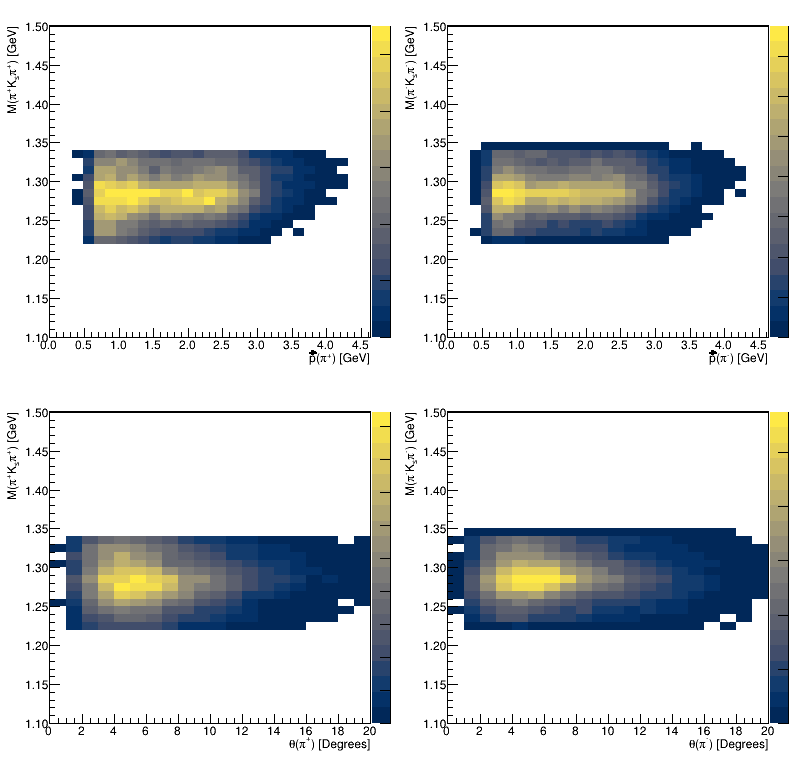

In [83]:
c.Clear()
c.Divide(2, 2)

asymmetry_hists_file.Close()
asymmetry_hists_file = ROOT.TFile.Open('/work/halld/home/viducic/charge_asymmetry_study/asym_hists.root')

hist_theta_pip = asymmetry_hists_file.Get('pip1_theta_vs_pipkmks')
hist_theta_pim = asymmetry_hists_file.Get('pim1_theta_vs_pimkpks')
hist_p_pip = asymmetry_hists_file.Get('pip1_p_vs_pipkmks')
hist_p_pim = asymmetry_hists_file.Get('pim1_p_vs_pimkpks')

hist_p_pip.GetXaxis().SetRangeUser(0, 4.5)
hist_p_pim.GetXaxis().SetRangeUser(0, 4.5)

hist_theta_pip.GetXaxis().SetTitle('#theta(#pi^{+}) [Degrees]')
hist_p_pip.GetXaxis().SetTitle('#vec{p}(#pi^{+}) [GeV]')
hist_theta_pim.GetXaxis().SetTitle('#theta(#pi^{-}) [Degrees]')
hist_p_pim.GetXaxis().SetTitle('#vec{p}(#pi^{-}) [GeV]')


hist_theta_pip.GetYaxis().SetTitle('M(#pi^{+}K_{s}#pi^{+}) [GeV]')
hist_p_pip.GetYaxis().SetTitle('M(#pi^{+}K_{s}#pi^{+}) [GeV]')
hist_theta_pim.GetYaxis().SetTitle('M(#pi^{-}K_{s}#pi^{-}) [GeV]')
hist_p_pim.GetYaxis().SetTitle('M(#pi^{-}K_{s}#pi^{-}) [GeV]')


particle_label = ROOT.TLatex()
particle_label.SetTextSize(0.1)
particle_label.SetTextColor(ROOT.kWhite)

c.cd(1)
hist_p_pip.Draw('colz')
particle_label.DrawLatexNDC(0.4, 0.8, '#vec{p}(#pi^{+})')
c.cd(2)
hist_p_pim.Draw('colz')
particle_label.DrawLatexNDC(0.4, 0.8, '#vec{p}(#pi^{-})')
c.cd(3)
hist_theta_pip.Draw('colz')
particle_label.DrawLatexNDC(0.4, 0.8, '#theta(#pi^{+})')
c.cd(4)
hist_theta_pim.Draw('colz')
particle_label.DrawLatexNDC(0.4, 0.8, '#theta(#pi^{-})')
c.Draw()

## dE/dx vs p

In [84]:
monitoring_mc_pipkmks = ROOT.TFile.Open('/work/halld/home/viducic/data/acceptance_study/pipkmks_s18_042050_042059_monitoring.root')
monitoring_mc_pimkpks = ROOT.TFile.Open('/work/halld/home/viducic/data/acceptance_study/pimkpks_s18_042050_042059_monitoring.root')
monitoring_data = ROOT.TFile.Open('/work/halld/home/viducic/data/acceptance_study/data_s18_042050_042059_monitoring.root')

dedx_hist_path = '/Independent/Hist_DetectorPID/CDC/dEdXVsP_Amp_q+'
cdc_dedx_mc_pipkmks = monitoring_mc_pipkmks.Get(dedx_hist_path)
cdc_dedx_mc_pimkpks = monitoring_mc_pimkpks.Get(dedx_hist_path)
cdc_dedx_data = monitoring_data.Get(dedx_hist_path)

cdc_dedx_mc_pipkmks.GetXaxis().SetRangeUser(0, 4)
cdc_dedx_mc_pipkmks.GetYaxis().SetTitle("CDC dE/dx [KeV/cm]")
# cdc_dedx_mc_pipkmks.GetYaxis().SetTitleSize(0.06)
# cdc_dedx_mc_pipkmks.GetXaxis().SetTitleSize(0.06)
# cdc_dedx_mc_pipkmks.GetXaxis().SetTitleOffset(0.75)
cdc_dedx_mc_pimkpks.GetXaxis().SetRangeUser(0, 4)
cdc_dedx_mc_pimkpks.GetYaxis().SetTitle("CDC dE/dx [KeV/cm]")
# cdc_dedx_mc_pimkpks.GetYaxis().SetTitleSize(0.06)
# cdc_dedx_mc_pimkpks.GetXaxis().SetTitleSize(0.06)
# cdc_dedx_mc_pimkpks.GetXaxis().SetTitleOffset(0.75)
cdc_dedx_data.GetXaxis().SetRangeUser(0, 4)
cdc_dedx_data.GetYaxis().SetTitle("CDC dE/dx [KeV/cm]")
# cdc_dedx_data.GetYaxis().SetTitleSize(0.06)
# cdc_dedx_data.GetXaxis().SetTitleSize(0.06)
# cdc_dedx_data.GetXaxis().SetTitleOffset(0.75)

# c.Clear()
# # change size of canvas to be shorter and fatter
# c.SetCanvasSize(1200, 600)
# c.Divide(3, 1)
# pad = c.cd(1)
# pad.SetLeftMargin(0.14)
# cdc_dedx_data.Draw('colz')
# pad = c.cd(2)
# pad.SetLeftMargin(0.14)
# cdc_dedx_mc_pimkpks.Draw('colz')
# pad = c.cd(3)
# pad.SetLeftMargin(0.14)
# cdc_dedx_mc_pipkmks.Draw('colz')
# c.Draw()

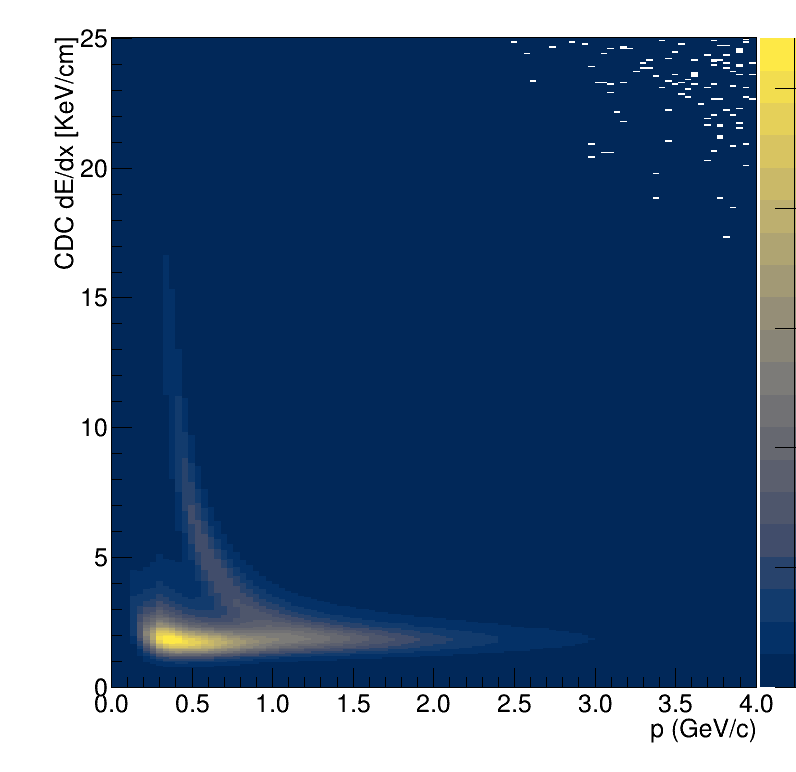

In [85]:
c.Clear()
c.SetLogy(0)
cdc_dedx_data.Draw("colz")
c.Draw()

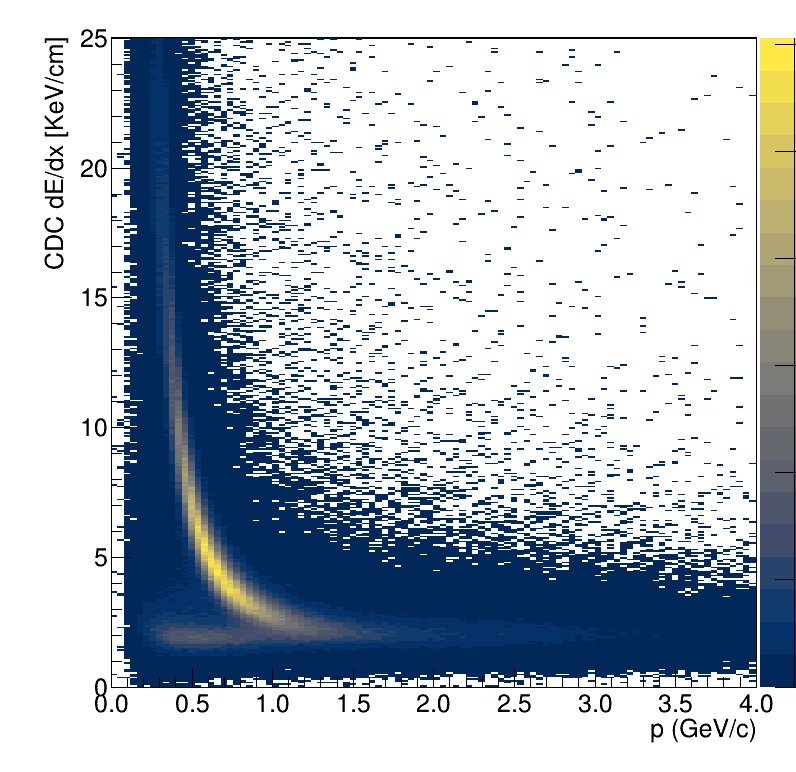

In [86]:
c.Clear()
cdc_dedx_mc_pimkpks.Draw("colz")
c.Draw()

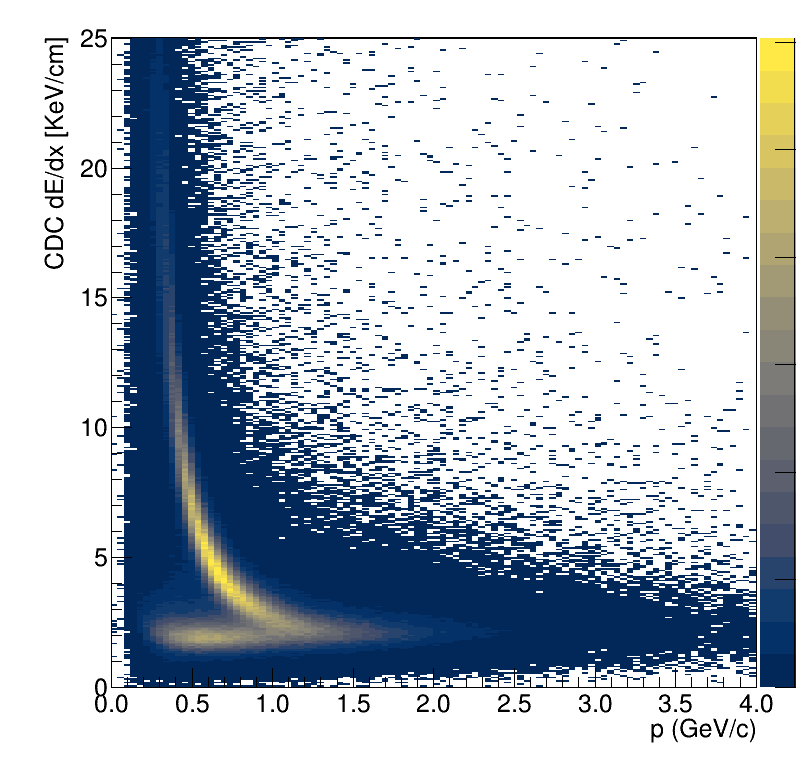

In [87]:
c.Clear()
cdc_dedx_mc_pipkmks.Draw("colz")
c.Draw()

## TOF $\beta$ vs p

In [88]:
monitoring_mc_pipkmks.Close()
monitoring_mc_pimkpks.Close()
monitoring_data.Close()

monitoring_mc_pipkmks = ROOT.TFile.Open('/work/halld/home/viducic/data/acceptance_study/pipkmks_s18_042050_042059_monitoring.root')
monitoring_mc_pimkpks = ROOT.TFile.Open('/work/halld/home/viducic/data/acceptance_study/pimkpks_s18_042050_042059_monitoring.root')
monitoring_data = ROOT.TFile.Open('/work/halld/home/viducic/data/acceptance_study/data_s18_042050_042059_monitoring.root')

beta_hist_path = '/Independent/Hist_DetectorPID/TOF/BetaVsP_q-'
tof_beta_mc_pipkmks = monitoring_mc_pipkmks.Get(beta_hist_path)
tof_beta_mc_pimkpks = monitoring_mc_pimkpks.Get(beta_hist_path)
tof_beta_data = monitoring_data.Get(beta_hist_path)

tof_beta_mc_pipkmks.GetYaxis().SetTitle("TOF #beta(q^{-})")
tof_beta_mc_pipkmks.GetYaxis().SetRangeUser(0.8, 1.02)
tof_beta_mc_pipkmks.GetXaxis().SetRangeUser(0, 4)
tof_beta_mc_pimkpks.GetYaxis().SetTitle("TOF #beta(q^{-})")
tof_beta_mc_pimkpks.GetYaxis().SetRangeUser(0.8, 1.02)
tof_beta_mc_pimkpks.GetXaxis().SetRangeUser(0, 4)
tof_beta_data.GetYaxis().SetTitle("TOF #beta(q^{-})")
tof_beta_data.GetYaxis().SetTitleOffset(1.6)
tof_beta_data.GetYaxis().SetRangeUser(0.8, 1.02)
tof_beta_data.GetXaxis().SetRangeUser(0, 4)

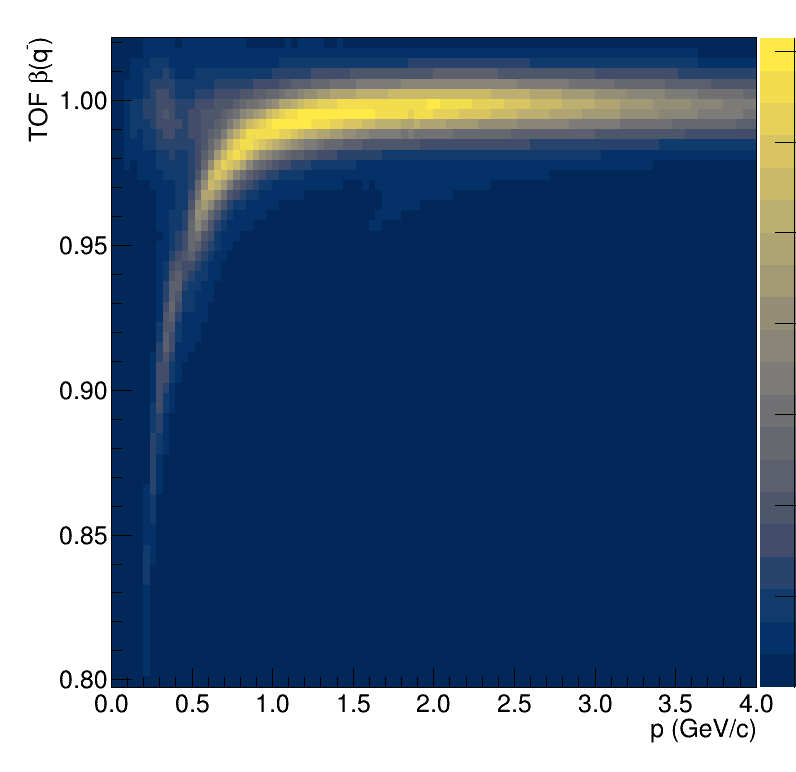

In [89]:
c.Clear()
c.SetLogz(0)
tof_beta_data.Draw("colz")
c.Draw()

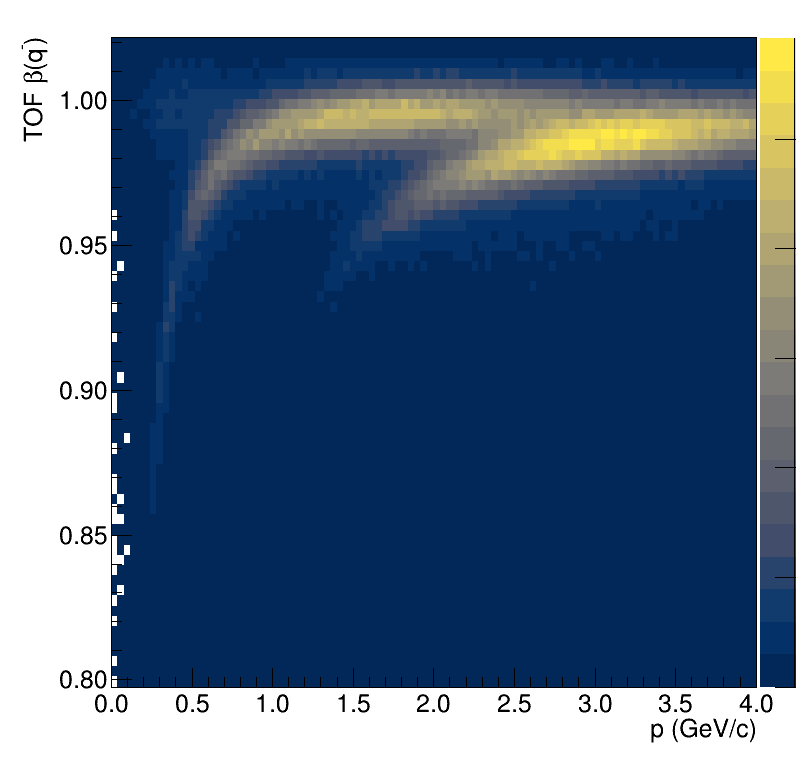

In [90]:
c.Clear()
tof_beta_mc_pipkmks.Draw("colz")
c.Draw()

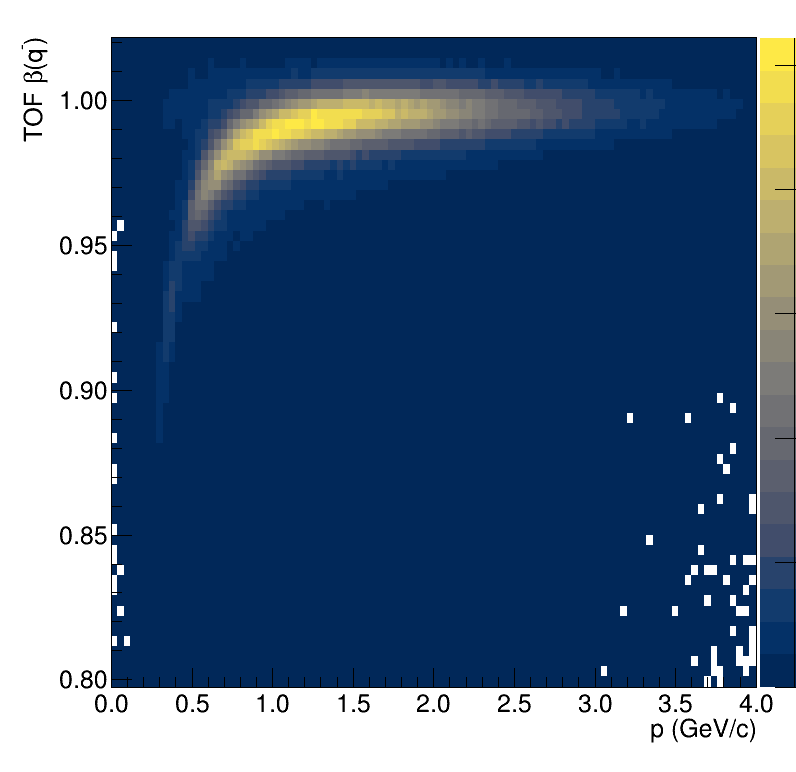

In [91]:
c.Clear()
tof_beta_mc_pimkpks.Draw("colz")
c.Draw()